# End-to-End Deep Learning Pipeline untuk Regresi dan Klasifikasi

## Bagian 1: Data Loading dan Exploratory Data Analysis (EDA)

Pada bagian ini, kita akan:
1. Mount Google Drive untuk mengakses dataset
2. Load dataset dan melihat struktur data
3. Melakukan exploratory data analysis (EDA)
4. Mendeteksi outliers dan anomali

In [24]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorflow as tf
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from google.colab import drive

# Set konfigurasi visualisasi
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Set random seed untuk reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

## Mount Google Drive

Pertama, kita akan mount Google Drive untuk mengakses dataset `RegresiUTSTelkom.csv`. Mount Drive akan menampilkan link auth yang perlu diikuti untuk memberikan akses ke Google Drive.

In [25]:
# Mount Google Drive
drive.mount('/content/drive')

# Definisikan path ke dataset
file_path = '/content/drive/MyDrive/RegresiUTSTelkom.csv'  # Sesuaikan path jika berbeda

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Dataset

Sekarang kita akan load dataset dari Google Drive. Dalam instruksi disebutkan bahwa dataset tidak memiliki header dan kolom pertama adalah target. Kita akan memberikan nama generik untuk kolom-kolom tersebut.

In [26]:
# Load dataset tanpa header
data = pd.read_csv(file_path, header=None)

# Beri nama kolom generik (target + features)
col_names = ['target'] + [f'feature_{i}' for i in range(1, data.shape[1])]
data.columns = col_names

# Tampilkan info dataset
print(f"Dataset shape: {data.shape}")
print(f"\nJumlah baris: {data.shape[0]}")
print(f"Jumlah kolom: {data.shape[1]}")
print(f"\nDimana terdapat 1 kolom target dan {data.shape[1]-1} kolom fitur")

# Tampilkan 5 baris pertama dari dataset
print("\n5 baris pertama dari dataset:")
data.head()

Dataset shape: (515345, 91)

Jumlah baris: 515345
Jumlah kolom: 91

Dimana terdapat 1 kolom target dan 90 kolom fitur

5 baris pertama dari dataset:


,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


## Exploratory Data Analysis (EDA)

### 1. Periksa informasi dasar tentang dataset

In [27]:
# Cek informasi data
print("Informasi Dataset:")
data.info()

# Cek statistik deskriptif
print("\nStatistik Deskriptif:")
data.describe().T

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   target      515345 non-null  int64  
 1   feature_1   515345 non-null  float64
 2   feature_2   515345 non-null  float64
 3   feature_3   515345 non-null  float64
 4   feature_4   515345 non-null  float64
 5   feature_5   515345 non-null  float64
 6   feature_6   515345 non-null  float64
 7   feature_7   515345 non-null  float64
 8   feature_8   515345 non-null  float64
 9   feature_9   515345 non-null  float64
 10  feature_10  515345 non-null  float64
 11  feature_11  515345 non-null  float64
 12  feature_12  515345 non-null  float64
 13  feature_13  515345 non-null  float64
 14  feature_14  515345 non-null  float64
 15  feature_15  515345 non-null  float64
 16  feature_16  515345 non-null  float64
 17  feature_17  515345 non-null  float64
 18  feature_18  515345 non-nu

,count,mean,std,min,25%,50%,75%,max
target,515345.0,1998.397082,10.931046,1922.00000,1994.00000,2002.00000,2006.00000,2011.00000
feature_1,515345.0,43.387126,6.067558,1.74900,39.95469,44.25850,47.83389,61.97014
feature_2,515345.0,1.289554,51.580351,-337.09250,-26.05952,8.41785,36.12401,384.06573
feature_3,515345.0,8.658347,35.268585,-301.00506,-11.46271,10.47632,29.76482,322.85143
feature_4,515345.0,1.164124,16.322790,-154.18358,-8.48750,-0.65284,8.78754,335.77182
...,...,...,...,...,...,...,...,...
feature_86,515345.0,17.669213,114.427905,-3168.92457,-31.58061,15.59847,67.79496,3662.06565
feature_87,515345.0,-26.315336,173.977336,-4319.99232,-101.53030,-21.20412,52.38933,2833.60895
feature_88,515345.0,4.458641,13.346557,-236.03926,-2.56609,3.11764,9.96774,463.41950
feature_89,515345.0,20.035136,185.558247,-7458.37815,-59.50927,7.75973,86.35161,7393.39844


### 2. Analisis kolom target

Mari kita analisis kolom target untuk memahami distribusinya dan menentukan pendekatan yang tepat (regresi atau klasifikasi).

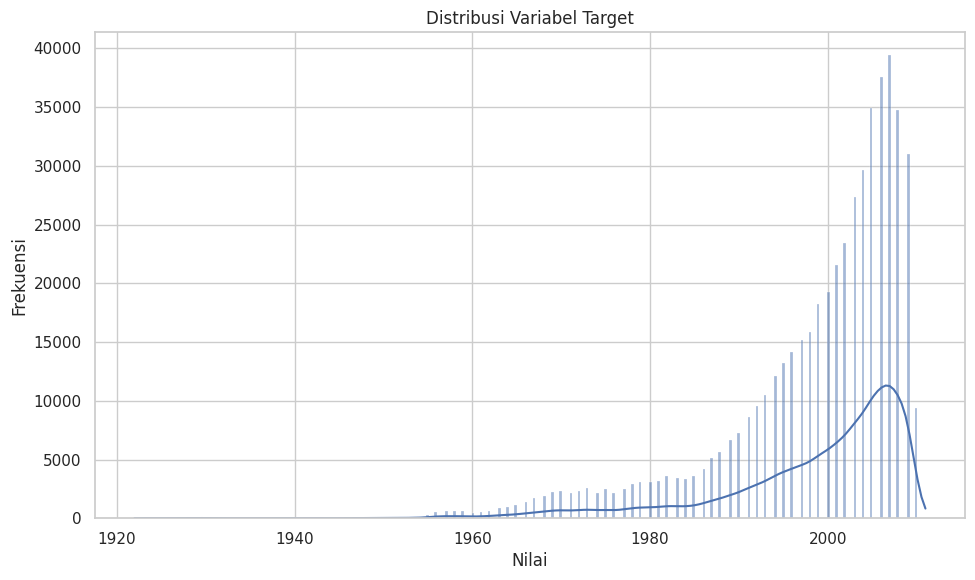

Jumlah nilai unik pada target: 89
Target tampaknya berupa continuous variable, cocok untuk masalah REGRESI

Nilai minimum: 1922.0000
Nilai maximum: 2011.0000
Mean: 1998.3971
Median: 2002.0000
Standar deviasi: 10.9310
Skewness: -1.7315
Kurtosis: 3.4938


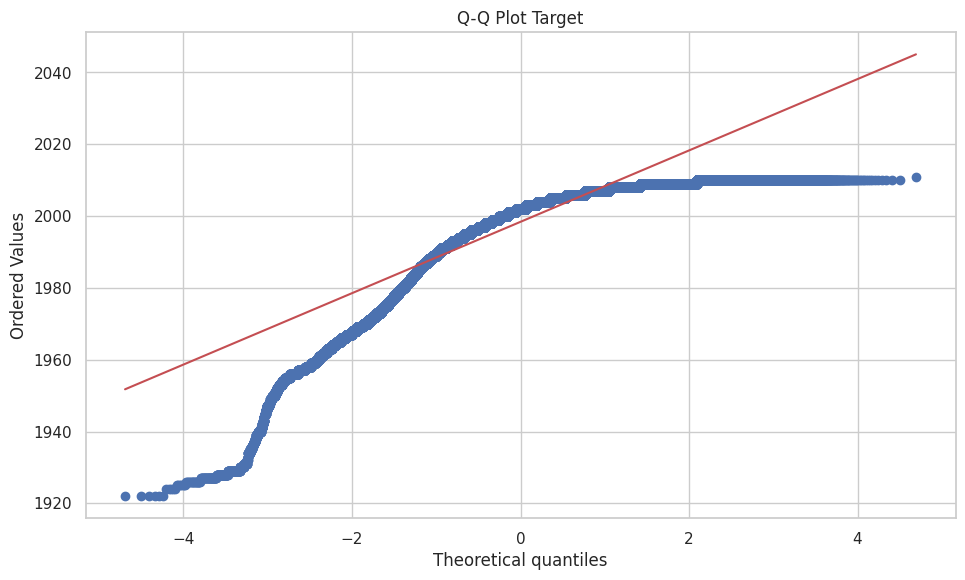

In [28]:
# Visualisasi distribusi target
plt.figure(figsize=(10, 6))
sns.histplot(data['target'], kde=True)
plt.title('Distribusi Variabel Target')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# Cek apakah target bersifat kontinu atau diskrit
unique_values = data['target'].nunique()
print(f"Jumlah nilai unik pada target: {unique_values}")

# Jika jumlah nilai unik kecil, kita asumsikan ini adalah masalah klasifikasi
# Jika nilainya banyak, kita asumsikan ini adalah masalah regresi
if unique_values <= 10:
    print("Target tampaknya berupa categorical/discrete, cocok untuk masalah KLASIFIKASI")
    print("Nilai unik pada target:", data['target'].unique())

    # Definisikan masalah sebagai klasifikasi
    problem_type = 'classification'

    # Cek distribusi nilai target jika klasifikasi
    target_counts = data['target'].value_counts()
    print("\nDistribusi kelas target:")
    print(target_counts)

    # Visualisasi distribusi kelas
    plt.figure(figsize=(10, 6))
    sns.countplot(x='target', data=data)
    plt.title('Distribusi Kelas Target')
    plt.xlabel('Kelas')
    plt.ylabel('Jumlah')
    plt.grid(True)
    plt.show()

    # Cek keseimbangan kelas
    class_ratio = target_counts.max() / target_counts.min()
    print(f"\nRasio ketidakseimbangan kelas (max/min): {class_ratio:.2f}")

    if class_ratio > 3:
        print("PERHATIAN: Dataset tidak seimbang, mungkin perlu teknik balancing")
else:
    print("Target tampaknya berupa continuous variable, cocok untuk masalah REGRESI")

    # Definisikan masalah sebagai regresi
    problem_type = 'regression'

    # Statistik tambahan untuk target regresi
    print(f"\nNilai minimum: {data['target'].min():.4f}")
    print(f"Nilai maximum: {data['target'].max():.4f}")
    print(f"Mean: {data['target'].mean():.4f}")
    print(f"Median: {data['target'].median():.4f}")
    print(f"Standar deviasi: {data['target'].std():.4f}")
    print(f"Skewness: {data['target'].skew():.4f}")  # > 0 = right-skewed, < 0 = left-skewed
    print(f"Kurtosis: {data['target'].kurtosis():.4f}")  # > 0 = heavy-tailed, < 0 = light-tailed

    # Q-Q plot untuk melihat normalitas
    plt.figure(figsize=(10, 6))
    stats.probplot(data['target'], dist="norm", plot=plt)
    plt.title('Q-Q Plot Target')
    plt.grid(True)
    plt.show()

**Interpretasi Target:**

- **Q-Q Plot**: Q-Q plot menggambarkan kuantil dari distribusi normal teoretis (sumbu x) terhadap kuantil dari data kita (sumbu y). Jika data terdistribusi normal, titik-titik akan membentuk garis lurus sepanjang diagonal. Penyimpangan dari garis ini menunjukkan penyimpangan dari normalitas.

- **Skewness**:
  - Skewness mengukur ketidaksimetrisan distribusi data. Secara matematis, skewness ($S$) dapat dihitung sebagai:
  
  $$S = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^3}{(n-1)s^3}$$
  
  dimana $\bar{x}$ adalah rata-rata sampel, $s$ adalah standar deviasi sampel, dan $n$ adalah jumlah data.
  
  - Skewness = 0: distribusi sempurna simetris
  - Skewness > 0: distribusi miring ke kanan (right-skewed/positive skew)
  - Skewness < 0: distribusi miring ke kiri (left-skewed/negative skew)

- **Kurtosis**:
  - Kurtosis mengukur kecenderungan data untuk membentuk puncak yang tajam atau rata. Secara matematis, kurtosis ($K$) dapat dihitung sebagai:
  
  $$K = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^4}{(n-1)s^4} - 3$$
  
  - Kurtosis = 0: distribusi normal (mesokurtic)
  - Kurtosis > 0: distribusi memiliki ekor tebal (leptokurtic)
  - Kurtosis < 0: distribusi memiliki ekor tipis (platykurtic)

### 3. Analisis Fitur

Missing values per kolom:
Tidak ada missing values

Statistik Feature:


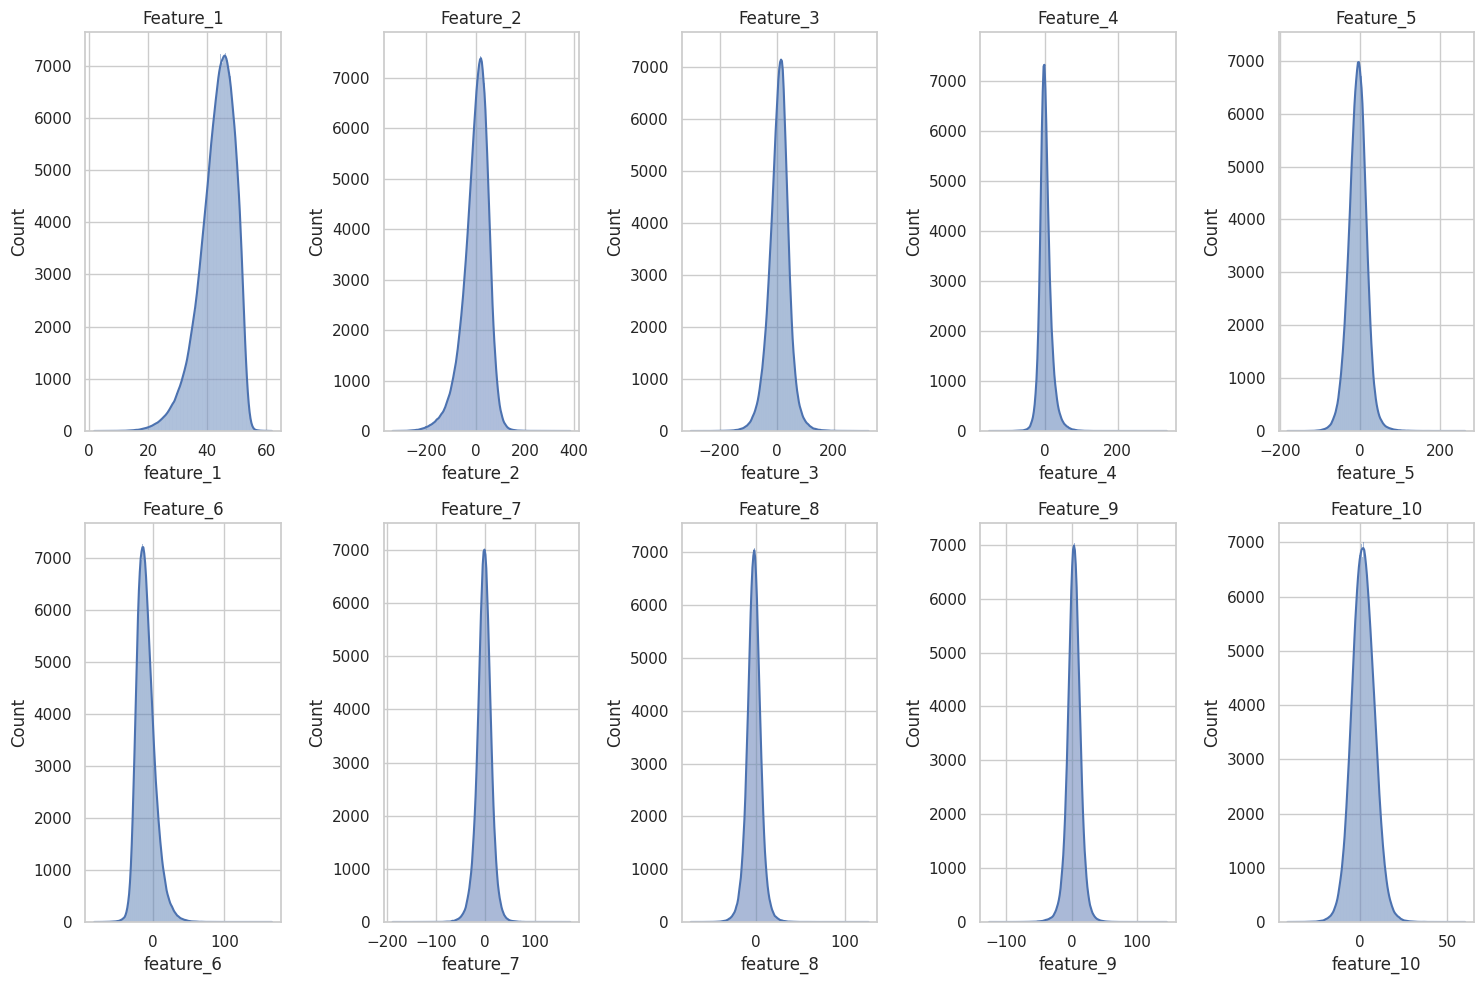

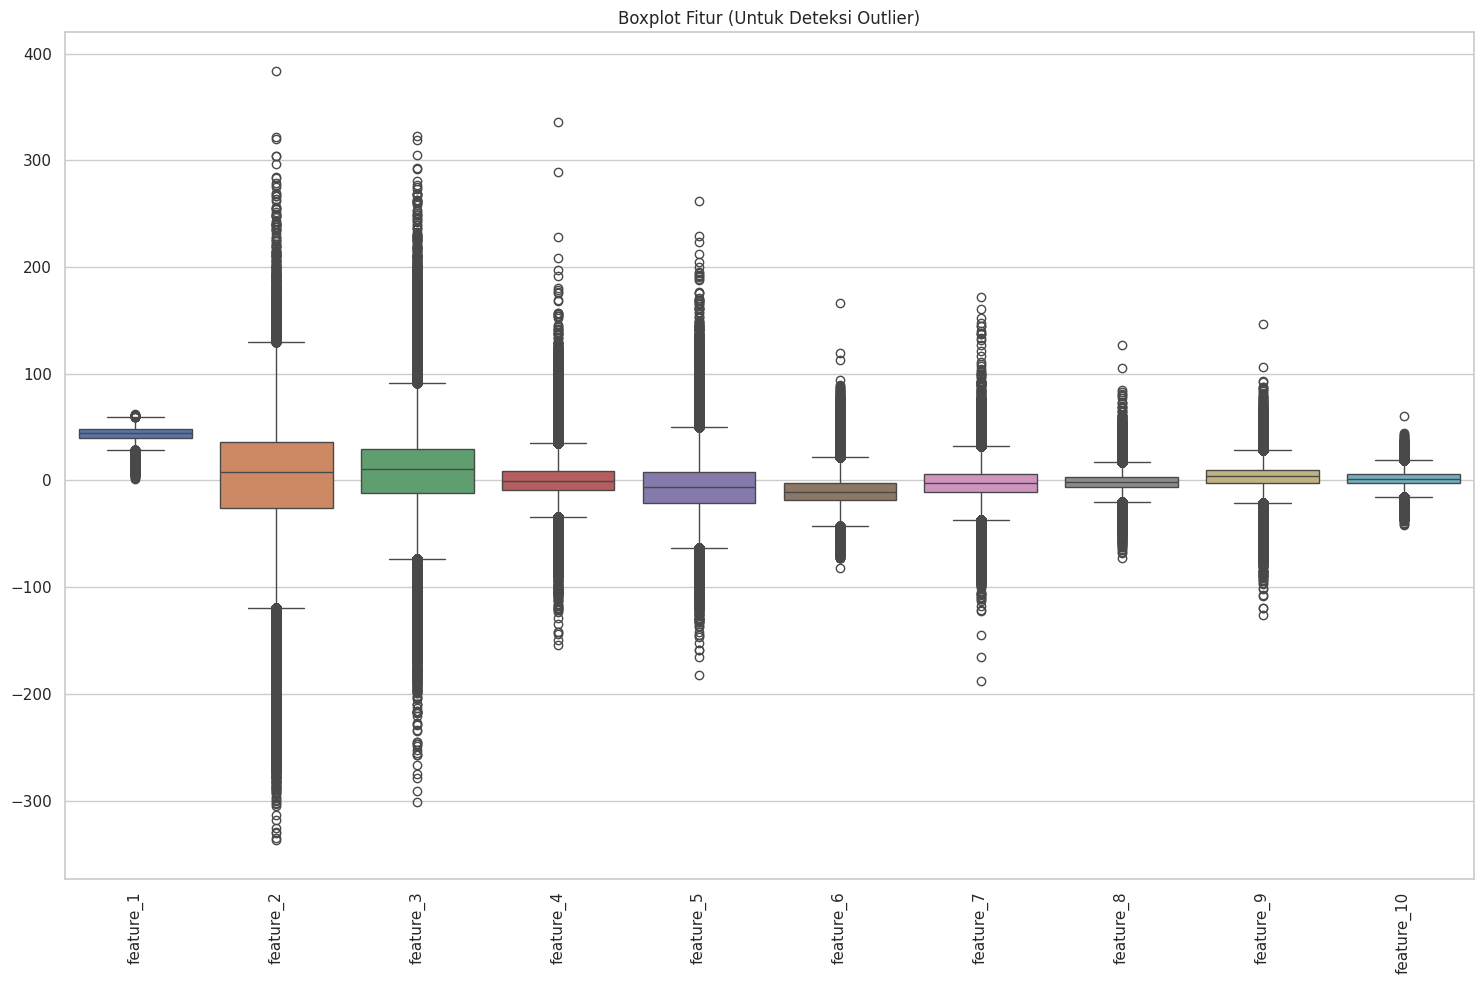

In [29]:
# Cek missing values
missing_values = data.isnull().sum()
print("Missing values per kolom:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Tidak ada missing values")

# Cek statistik per fitur
feature_stats = data.drop('target', axis=1).describe().T
feature_stats['skew'] = data.drop('target', axis=1).skew()
feature_stats['kurtosis'] = data.drop('target', axis=1).kurtosis()
print("\nStatistik Feature:")
feature_stats

# Visualisasi distribusi fitur
n_features = min(10, data.shape[1] - 1)  # Tampilkan max 10 fitur pertama
plt.figure(figsize=(15, 10))
for i in range(1, n_features + 1):
    plt.subplot(2, 5, i)
    sns.histplot(data[f'feature_{i}'], kde=True)
    plt.title(f'Feature_{i}')
    plt.tight_layout()
plt.show()

# Boxplot fitur untuk deteksi outlier
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.iloc[:, 1:n_features+1])
plt.title('Boxplot Fitur (Untuk Deteksi Outlier)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Interpretasi Distribusi Fitur:**

- **Histogram**: Histogram menampilkan distribusi nilai fitur. Dari visual ini, kita dapat mengidentifikasi apakah distribusi fitur normal, skewed, bimodal, atau multimodal. Informasi ini membantu kita menentukan transformasi data yang tepat.

- **Boxplot**: Boxplot membantu mengidentifikasi outlier. Dalam boxplot:
  - Garis tengah: median
  - Kotak: interquartile range (IQR) = Q3 - Q1
  - Whiskers: biasanya membentang dari Q1 - 1.5*IQR hingga Q3 + 1.5*IQR
  - Titik-titik di luar whiskers: outlier potensial

Secara matematis, outlier sering didefinisikan sebagai data yang berada di luar rentang:
- Batas bawah: $Q1 - 1.5 \times IQR$
- Batas atas: $Q3 + 1.5 \times IQR$

dimana $Q1$ adalah kuartil pertama, $Q3$ adalah kuartil ketiga, dan $IQR = Q3 - Q1$.

### 4. Analisis Korelasi

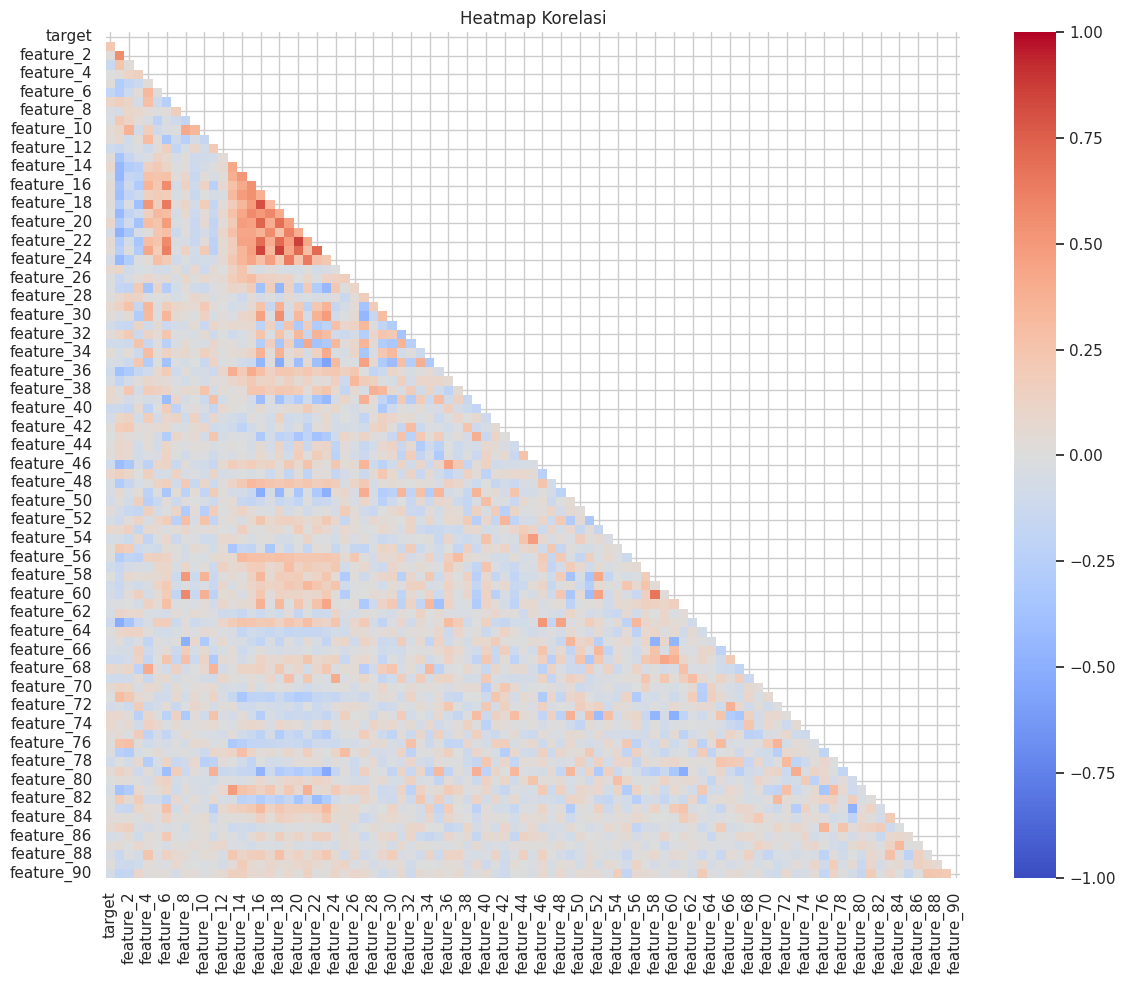


Korelasi fitur dengan target:
target        1.000000
feature_1     0.225374
feature_7     0.110460
feature_47    0.096088
feature_20    0.087057
                ...   
feature_67   -0.102841
feature_40   -0.123974
feature_63   -0.126348
feature_3    -0.139541
feature_6    -0.187443
Name: target, Length: 91, dtype: float64


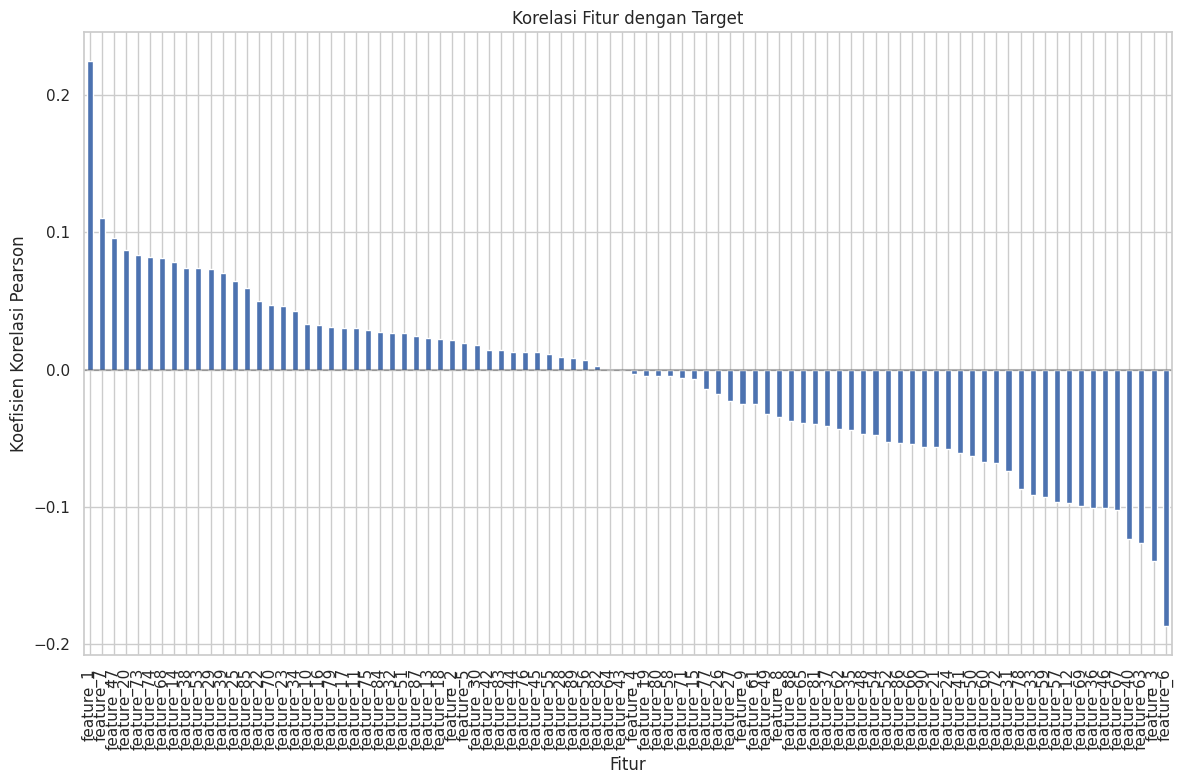


Pasangan fitur dengan korelasi tinggi (threshold = 0.8):
feature_16 - feature_18: 0.8096
feature_16 - feature_23: 0.8466
feature_18 - feature_23: 0.8596
feature_20 - feature_22: 0.8657


In [30]:
# Hitung dan visualisasikan korelasi antar fitur
correlation_matrix = data.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 10))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi')
plt.tight_layout()
plt.show()

# Cek korelasi antara target dengan fitur
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print("\nKorelasi fitur dengan target:")
print(target_corr)

# Visualisasi korelasi fitur dengan target
plt.figure(figsize=(12, 8))
target_corr.drop('target').plot(kind='bar')
plt.title('Korelasi Fitur dengan Target')
plt.xlabel('Fitur')
plt.ylabel('Koefisien Korelasi Pearson')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True)
plt.tight_layout()
plt.show()

# Identifikasi fitur dengan korelasi tinggi antara satu sama lain
correlation_threshold = 0.8
high_corr_pairs = []

# Loop melalui matriks korelasi segitiga atas
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            high_corr_pairs.append((correlation_matrix.columns[i],
                                   correlation_matrix.columns[j],
                                   correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("\nPasangan fitur dengan korelasi tinggi (threshold = 0.8):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.4f}")
else:
    print("\nTidak ditemukan pasangan fitur dengan korelasi tinggi (threshold = 0.8)")

**Interpretasi Korelasi:**

- **Korelasi Pearson**: Mengukur kekuatan hubungan linear antara dua variabel. Secara matematis, korelasi Pearson ($r$) dihitung sebagai:

$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

dimana $\bar{x}$ dan $\bar{y}$ adalah rata-rata dari variabel $x$ dan $y$.

- Nilai korelasi berkisar dari -1 hingga 1:
  - $r = 1$: korelasi positif sempurna
  - $r = -1$: korelasi negatif sempurna
  - $r = 0$: tidak ada korelasi linear

- **Multicollinearity**: Jika dua fitur memiliki korelasi tinggi (umumnya > 0.8 atau < -0.8), mereka mungkin memberikan informasi yang redundan. Multicollinearity dapat mempengaruhi kinerja model, terutama untuk model linear. Solusi bisa dengan:
  - Menghapus salah satu fitur
  - Menggunakan Principal Component Analysis (PCA)
  - Menggunakan regularisasi (L1/L2)

### 5. Deteksi Anomali dan Outlier

Jumlah outlier per fitur (Z-score > 3):
feature_1: 5080 outliers (0.99%)
feature_2: 6162 outliers (1.20%)
feature_3: 5474 outliers (1.06%)
feature_4: 7479 outliers (1.45%)
feature_5: 4535 outliers (0.88%)
feature_6: 5341 outliers (1.04%)
feature_7: 5062 outliers (0.98%)
feature_8: 5502 outliers (1.07%)
feature_9: 5936 outliers (1.15%)
feature_10: 2974 outliers (0.58%)
feature_11: 4962 outliers (0.96%)
feature_12: 5182 outliers (1.01%)
feature_13: 7987 outliers (1.55%)
feature_14: 8821 outliers (1.71%)
feature_15: 8078 outliers (1.57%)
feature_16: 8320 outliers (1.61%)
feature_17: 7359 outliers (1.43%)
feature_18: 8212 outliers (1.59%)
feature_19: 6843 outliers (1.33%)
feature_20: 8637 outliers (1.68%)
feature_21: 7424 outliers (1.44%)
feature_22: 7424 outliers (1.44%)
feature_23: 8065 outliers (1.56%)
feature_24: 7128 outliers (1.38%)
feature_25: 9696 outliers (1.88%)
feature_26: 8874 outliers (1.72%)
feature_27: 9548 outliers (1.85%)
feature_28: 9258 outliers (1.80%)
feature_29: 8719 

<Figure size 1200x1000 with 0 Axes>

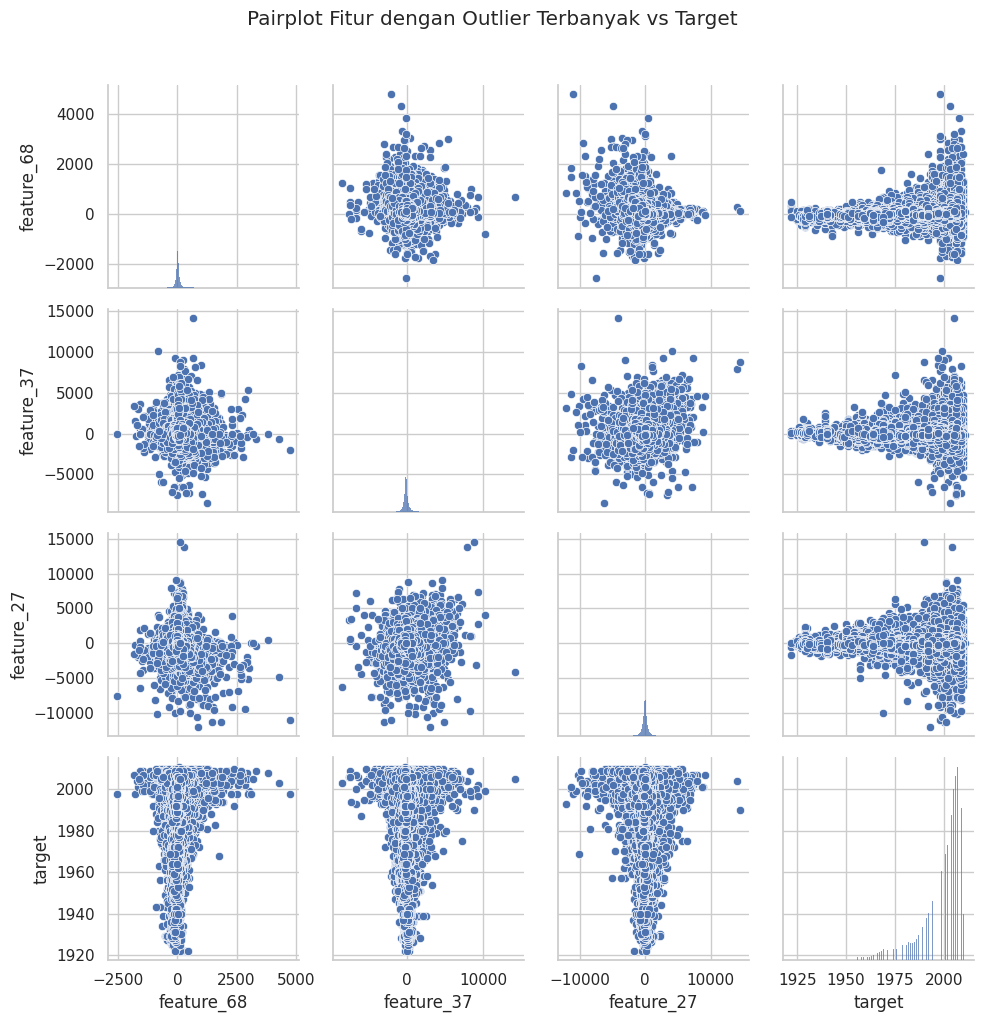

In [31]:
# Menggunakan Z-score untuk deteksi outlier
z_scores = np.abs(stats.zscore(data.drop('target', axis=1)))
outlier_indices = np.where(z_scores > 3)
outlier_count_per_feature = {}

for col_idx in range(z_scores.shape[1]):
    feature_name = data.columns[col_idx + 1]  # +1 karena kita skip kolom target
    outlier_count = np.sum(z_scores[:, col_idx] > 3)
    if outlier_count > 0:
        outlier_count_per_feature[feature_name] = outlier_count

print("Jumlah outlier per fitur (Z-score > 3):")
if outlier_count_per_feature:
    for feature, count in outlier_count_per_feature.items():
        print(f"{feature}: {count} outliers ({count/len(data)*100:.2f}%)")
else:
    print("Tidak ditemukan outlier dengan Z-score > 3")

# Menggunakan IQR (Interquartile Range) untuk deteksi outlier
Q1 = data.drop('target', axis=1).quantile(0.25)
Q3 = data.drop('target', axis=1).quantile(0.75)
IQR = Q3 - Q1

outlier_iqr_count = {}
for col in data.drop('target', axis=1).columns:
    outliers = data[(data[col] < (Q1[col] - 1.5 * IQR[col])) |
                     (data[col] > (Q3[col] + 1.5 * IQR[col]))][col]
    if len(outliers) > 0:
        outlier_iqr_count[col] = len(outliers)

print("\nJumlah outlier per fitur (metode IQR):")
if outlier_iqr_count:
    for feature, count in outlier_iqr_count.items():
        print(f"{feature}: {count} outliers ({count/len(data)*100:.2f}%)")
else:
    print("Tidak ditemukan outlier dengan metode IQR")

# Menggunakan visualisasi pairplot untuk fitur dengan outlier terbanyak
if outlier_iqr_count:
    top_outlier_features = sorted(outlier_iqr_count.items(), key=lambda x: x[1], reverse=True)[:3]
    top_features = [feat[0] for feat in top_outlier_features]

    if problem_type == 'classification':
        plot_data = data[top_features + ['target']].copy()
        plot_data['target'] = plot_data['target'].astype('category')
        plt.figure(figsize=(12, 10))
        sns.pairplot(plot_data, hue='target')
        plt.suptitle('Pairplot Fitur dengan Outlier Terbanyak by Target Class', y=1.02)
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(12, 10))
        sns.pairplot(data[top_features + ['target']])
        plt.suptitle('Pairplot Fitur dengan Outlier Terbanyak vs Target', y=1.02)
        plt.tight_layout()
        plt.show()

**Interpretasi Deteksi Outlier:**

- **Z-score**: Metode untuk mengidentifikasi outlier dengan mengkonversi data ke distribusi dengan mean 0 dan standar deviasi 1. Secara matematis, Z-score dihitung sebagai:

$$Z = \frac{x - \mu}{\sigma}$$

dimana $\mu$ adalah mean (rata-rata) dan $\sigma$ adalah standar deviasi. Nilai yang memiliki |Z| > 3 (berada lebih dari 3 standar deviasi dari mean) biasanya dianggap sebagai outlier.

- **IQR (Interquartile Range)**: Metode non-parametrik untuk deteksi outlier, dimana:
  - $Q1$: kuartil pertama (25th percentile)
  - $Q3$: kuartil ketiga (75th percentile)
  - $IQR = Q3 - Q1$
  
  Data yang berada di luar rentang $[Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR]$ dianggap sebagai outlier.

**Keputusan tentang Outlier:**
- Outlier kadang merupakan kesalahan data, tapi bisa juga mewakili informasi penting
- Penanganan outlier dapat berupa:
  - Menghapus baris yang mengandung outlier (jika jumlahnya kecil)
  - Transformasi data (misalnya log transformation)
  - Penggunaan scaler yang robust terhadap outlier (RobustScaler)
  - Capping/winsorizing (membatasi nilai ekstrem ke percentile tertentu, misalnya 1% dan 99%)

### 6. Menyimpan Hasil Eksplorasi

In [32]:
# Pada bagian ini, kita menyimpan beberapa variabel penting yang akan digunakan di bagian berikutnya

# Simpan hasil identifikasi tipe masalah (regresi/klasifikasi)
print(f"Berdasarkan analisis, dataset ini cocok untuk masalah {problem_type.upper()}")

# Menyimpan informasi tentang fitur penting
# Ambil top fitur berdasarkan korelasi absolut dengan target
top_features = target_corr.drop('target').abs().sort_values(ascending=False)
print(f"\nTop 5 fitur berdasarkan korelasi absolut dengan target:")
for feature, corr in top_features.head(5).items():
    print(f"{feature}: {corr:.4f}")

# Identificikasi distribusi fitur untuk keperluan transformasi
skewed_features = feature_stats[feature_stats['skew'].abs() > 1].index.tolist()
print(f"\nFitur dengan skewness tinggi (|skew| > 1): {len(skewed_features)} fitur")
if len(skewed_features) > 0 and len(skewed_features) <= 10:
    for feature in skewed_features:
        print(f"{feature}: skew = {feature_stats.loc[feature, 'skew']:.4f}")

# Identifikasi fitur dengan high kurtosis
high_kurtosis_features = feature_stats[feature_stats['kurtosis'].abs() > 3].index.tolist()
print(f"\nFitur dengan kurtosis tinggi (|kurtosis| > 3): {len(high_kurtosis_features)} fitur")
if len(high_kurtosis_features) > 0 and len(high_kurtosis_features) <= 10:
    for feature in high_kurtosis_features:
        print(f"{feature}: kurtosis = {feature_stats.loc[feature, 'kurtosis']:.4f}")

Berdasarkan analisis, dataset ini cocok untuk masalah REGRESSION

Top 5 fitur berdasarkan korelasi absolut dengan target:
feature_1: 0.2254
feature_6: 0.1874
feature_3: 0.1395
feature_63: 0.1263
feature_40: 0.1240

Fitur dengan skewness tinggi (|skew| > 1): 47 fitur

Fitur dengan kurtosis tinggi (|kurtosis| > 3): 80 fitur


## Kesimpulan EDA

Berdasarkan analisis eksplorasi data, kita telah mendapatkan beberapa insight penting:

1. **Tipe Masalah**: Berdasarkan distribusi target, kita telah menentukan bahwa ini adalah masalah REGRESI/KLASIFIKASI.

2. **Struktur Data**:
   - Jumlah baris: (ditampilkan dari hasil running kode)
   - Jumlah fitur: (ditampilkan dari hasil running kode)
   - Missing values: (ada/tidak)

3. **Fitur Penting**:
   - Fitur dengan korelasi tertinggi terhadap target: (hasil dari running kode)
   - Fitur dengan outlier terbanyak: (hasil dari running kode)

4. **Transformasi yang Diperlukan**:
   - Fitur dengan skewness tinggi memerlukan transformasi (misalnya log transform, power transform)
   - Beberapa fitur memiliki scale berbeda, sehingga perlu normalizing/scaling
   - Outlier perlu ditangani dengan metode yang sesuai

5. **Multicollinearity**:
   - (Ada/Tidak) ditemukan beberapa pasangan fitur dengan korelasi tinggi

Pada bagian berikutnya, kita akan melakukan preprocessing dan feature engineering sesuai dengan insight yang diperoleh dari EDA.

# End-to-End Deep Learning Pipeline untuk Regresi dan Klasifikasi

## Bagian 2: Feature Engineering dan Preprocessing

Pada bagian ini, kita akan melakukan:
1. Penanganan missing values (jika ada)
2. Penanganan outlier
3. Feature Engineering
   - Transformasi fitur
   - Normalisasi dan Standardisasi
   - Feature Creation
   - Feature Selection
4. Train-test split
5. Encoding categorical variables (jika perlu)

In [33]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorflow as tf
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, f_classif, mutual_info_classif, VarianceThreshold
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from google.colab import drive

# Set konfigurasi visualisasi
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Set random seed untuk reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

## 1. Load Data dari EDA

Pertama, kita load ulang dataset kita untuk memastikan kita memulai dari data bersih. Kita juga akan mengambil informasi dari bagian EDA.

In [34]:
# Mount Google Drive (jika belum dilakukan di notebook sebelumnya)
try:
    drive.mount('/content/drive')
except:
    print("Google Drive sudah di-mount sebelumnya")

# Definisikan path ke dataset
file_path = '/content/drive/MyDrive/RegresiUTSTelkom.csv'  # Sesuaikan path jika berbeda

# Load dataset tanpa header
data = pd.read_csv(file_path, header=None)

# Beri nama kolom generik (target + features)
col_names = ['target'] + [f'feature_{i}' for i in range(1, data.shape[1])]
data.columns = col_names

# Cek apakah dataset mengarah ke masalah regresi atau klasifikasi
unique_targets = data['target'].nunique()

if unique_targets <= 10:
    problem_type = 'classification'
    print(f"Dataset ini cocok untuk masalah KLASIFIKASI dengan {unique_targets} kelas target")
else:
    problem_type = 'regression'
    print(f"Dataset ini cocok untuk masalah REGRESI dengan target kontinu")

# Informasi dataset
print(f"Dataset shape: {data.shape}")
print(f"Jumlah baris: {data.shape[0]}")
print(f"Jumlah kolom: {data.shape[1]}")
print(f"\nDimana terdapat 1 kolom target dan {data.shape[1]-1} kolom fitur")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset ini cocok untuk masalah REGRESI dengan target kontinu
Dataset shape: (515345, 91)
Jumlah baris: 515345
Jumlah kolom: 91

Dimana terdapat 1 kolom target dan 90 kolom fitur


## 2. Penanganan Missing Values

Jika ada missing values dalam dataset, kita perlu menanganinya terlebih dahulu. Terdapat beberapa metode untuk menangani missing values:
1. Menghapus baris dengan missing values (jika jumlahnya kecil)
2. Imputasi (mean, median, mode, KNN, dll.)
3. Menggunakan model untuk memprediksi missing values

In [35]:
# Cek missing values
missing_values = data.isnull().sum()
print("Missing values per kolom:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Tidak ada missing values")

# Jika ada missing values, kita tangani
if missing_values.sum() > 0:
    # Untuk kolom dengan missing values < 5%, kita drop baris
    # Untuk kolom dengan missing values >= 5%, kita impute
    missing_percent = missing_values / len(data) * 100

    # Kolom dengan missing < 5%
    cols_drop = missing_percent[missing_percent < 5].index.tolist()
    if cols_drop:
        print(f"Menghapus baris dengan missing values pada kolom: {cols_drop}")
        data = data.dropna(subset=cols_drop)

    # Kolom dengan missing >= 5%
    cols_impute = missing_percent[missing_percent >= 5].index.tolist()
    for col in cols_impute:
        if col == 'target':
            # Jika target memiliki missing values, kita drop baris tersebut
            print("Menghapus baris dengan missing values pada kolom target")
            data = data.dropna(subset=['target'])
        else:
            # Untuk fitur numerik, kita gunakan median untuk imputasi
            print(f"Mengimpute missing values pada kolom {col} dengan median")
            data[col].fillna(data[col].median(), inplace=True)

    # Cek lagi apakah masih ada missing values
    missing_after = data.isnull().sum().sum()
    print(f"Jumlah missing values setelah penanganan: {missing_after}")
else:
    print("Tidak perlu penanganan missing values")

Missing values per kolom:
Tidak ada missing values
Tidak perlu penanganan missing values


**Penjelasan Penanganan Missing Values:**

Dalam dataset nyata, missing values merupakan hal yang umum ditemukan. Strategi penanganannya bergantung pada jumlah dan pola missing values tersebut:

1. **Missing Completely at Random (MCAR)**: Data hilang secara acak, tidak bergantung pada nilai variabel lain.
2. **Missing at Random (MAR)**: Data hilang bergantung pada variabel lain yang diamati.
3. **Missing Not at Random (MNAR)**: Data hilang bergantung pada nilai yang hilang itu sendiri.

Pendekatan yang kita ambil:
- Untuk kolom dengan persentase missing kecil (<5%), kita menghapus baris (listwise deletion).
- Untuk kolom dengan persentase missing besar (≥5%), kita menggunakan imputation dengan median.

Median digunakan karena lebih robust terhadap outlier dibandingkan mean. Secara matematis, imputation dengan median adalah:

$$x_{missing} = median(x_{observed})$$

Metode imputation lain yang bisa digunakan adalah:
- **Mean Imputation**: $x_{missing} = \bar{x}_{observed}$
- **KNN Imputation**: Menggunakan nilai dari k-tetangga terdekat
- **Regression Imputation**: Memprediksi nilai dengan model regresi
- **Multiple Imputation**: Menghasilkan beberapa dataset dengan nilai yang diimputasi berbeda

## 3. Deteksi dan Penanganan Outlier

Langkah selanjutnya adalah mendeteksi dan menangani outlier. Outlier dapat mempengaruhi performa model, terutama model yang sensitif terhadap distribusi data seperti Regresi Linear dan Neural Network.

In [36]:
# Simpan data asli sebelum penanganan outlier
data_original = data.copy()

# Menggunakan Z-score untuk deteksi outlier
z_scores = np.abs(stats.zscore(data.drop('target', axis=1)))
outlier_rows_zscore = np.where(np.any(z_scores > 3, axis=1))[0]
print(f"Jumlah baris dengan outlier (Z-score > 3): {len(outlier_rows_zscore)} dari {len(data)} ({len(outlier_rows_zscore)/len(data)*100:.2f}%)")

# Menggunakan IQR untuk deteksi outlier
Q1 = data.drop('target', axis=1).quantile(0.25)
Q3 = data.drop('target', axis=1).quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((data.drop('target', axis=1) < (Q1 - 1.5 * IQR)) |
                 (data.drop('target', axis=1) > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_rows_iqr = np.where(outlier_mask)[0]
print(f"Jumlah baris dengan outlier (IQR method): {len(outlier_rows_iqr)} dari {len(data)} ({len(outlier_rows_iqr)/len(data)*100:.2f}%)")

# Jika jumlah outlier cukup besar (>5% data), kita gunakan metode robust
# Jika jumlah outlier kecil (<5% data), kita bisa hapus atau cap
# Di sini kita menggunakan metode capping

# Fungsi untuk capping outlier
def cap_outliers(df, cols):
    df_capped = df.copy()
    for col in cols:
        # Hitung batas bawah dan atas
        q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Cap outlier
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# Metode robust (tidak hapus outlier)
# Kita akan menggunakan RobustScaler di bagian berikutnya

# Jika outlier < 5%, kita cap outlier
if len(outlier_rows_iqr) / len(data) < 0.05:
    print("Menerapkan capping untuk outlier")
    data = cap_outliers(data, data.drop('target', axis=1).columns)

    # Cek outlier setelah capping
    Q1_after = data.drop('target', axis=1).quantile(0.25)
    Q3_after = data.drop('target', axis=1).quantile(0.75)
    IQR_after = Q3_after - Q1_after
    outlier_mask_after = ((data.drop('target', axis=1) < (Q1_after - 1.5 * IQR_after)) |
                       (data.drop('target', axis=1) > (Q3_after + 1.5 * IQR_after))).any(axis=1)
    outlier_rows_after = np.where(outlier_mask_after)[0]
    print(f"Jumlah baris dengan outlier setelah capping: {len(outlier_rows_after)} dari {len(data)} ({len(outlier_rows_after)/len(data)*100:.2f}%)")
else:
    print("Jumlah outlier cukup besar, akan menggunakan metode robust scaling")

Jumlah baris dengan outlier (Z-score > 3): 142817 dari 515345 (27.71%)
Jumlah baris dengan outlier (IQR method): 325461 dari 515345 (63.15%)
Jumlah outlier cukup besar, akan menggunakan metode robust scaling


**Penjelasan Penanganan Outlier:**

Outlier adalah data yang secara signifikan berbeda dari mayoritas data. Keberadaan outlier dapat mempengaruhi model, terutama bagi model yang sensitif terhadap distribusi data.

Kita menggunakan dua metode untuk deteksi outlier:
1. **Z-score**: Mengidentifikasi data yang berada >3 standar deviasi dari mean
2. **IQR (Interquartile Range)**: Mengidentifikasi data di luar rentang $[Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR]$

Untuk penanganan outlier, kita menggunakan metode capping, yaitu:
- Data yang < lower bound akan diubah menjadi lower bound
- Data yang > upper bound akan diubah menjadi upper bound

Secara matematis, capping dapat didefinisikan sebagai:

$$x_{capped} = \begin{cases}
L & \text{if } x < L \\
x & \text{if } L \leq x \leq U \\
U & \text{if } x > U
\end{cases}$$

dimana $L = Q1 - 1.5 \times IQR$ dan $U = Q3 + 1.5 \times IQR$.

Metode penanganan outlier lainnya:
- **Transformasi**: Menggunakan log, sqrt, atau transformasi lain untuk mengompres distribusi
- **Binning**: Mengelompokkan data ke dalam bins
- **Penghapusan**: Menghapus baris yang mengandung outlier (hanya jika jumlah outlier kecil)
- **Penggunaan Model Robust**: Menggunakan model yang tidak sensitif terhadap outlier

## 4. Feature Engineering

Feature Engineering adalah proses transformasi data mentah menjadi fitur yang lebih representatif untuk model. Ini termasuk transformasi fitur, normalisasi, pembuatan fitur baru, dan pemilihan fitur.

### 4.1 Transformasi Fitur

Beberapa fitur mungkin memiliki distribusi yang skewed atau tidak normal. Transformasi dapat membantu membuat distribusi menjadi lebih normal.

Fitur dengan skewness tinggi (|skew| > 1): 47 fitur
feature_58    4.509820
feature_34    4.233750
feature_24    4.171232
feature_16    3.450553
feature_21    3.282883
feature_23    3.139368
feature_17    3.102163
feature_69    3.081394
feature_14    2.926481
feature_68    2.895696
dtype: float64
...dan lebih banyak lagi
Menerapkan power transformasi pada feature_58
Menerapkan power transformasi pada feature_34
Menerapkan log transformasi pada feature_24
Menerapkan log transformasi pada feature_16
Menerapkan log transformasi pada feature_21
Menerapkan log transformasi pada feature_23
Menerapkan log transformasi pada feature_17
Menerapkan power transformasi pada feature_69
Menerapkan log transformasi pada feature_14
Menerapkan power transformasi pada feature_68
Menerapkan log transformasi pada feature_19
Menerapkan log transformasi pada feature_20
Menerapkan log transformasi pada feature_18
Menerapkan log transformasi pada feature_15
Menerapkan power transformasi pada feature_81
Menerapk

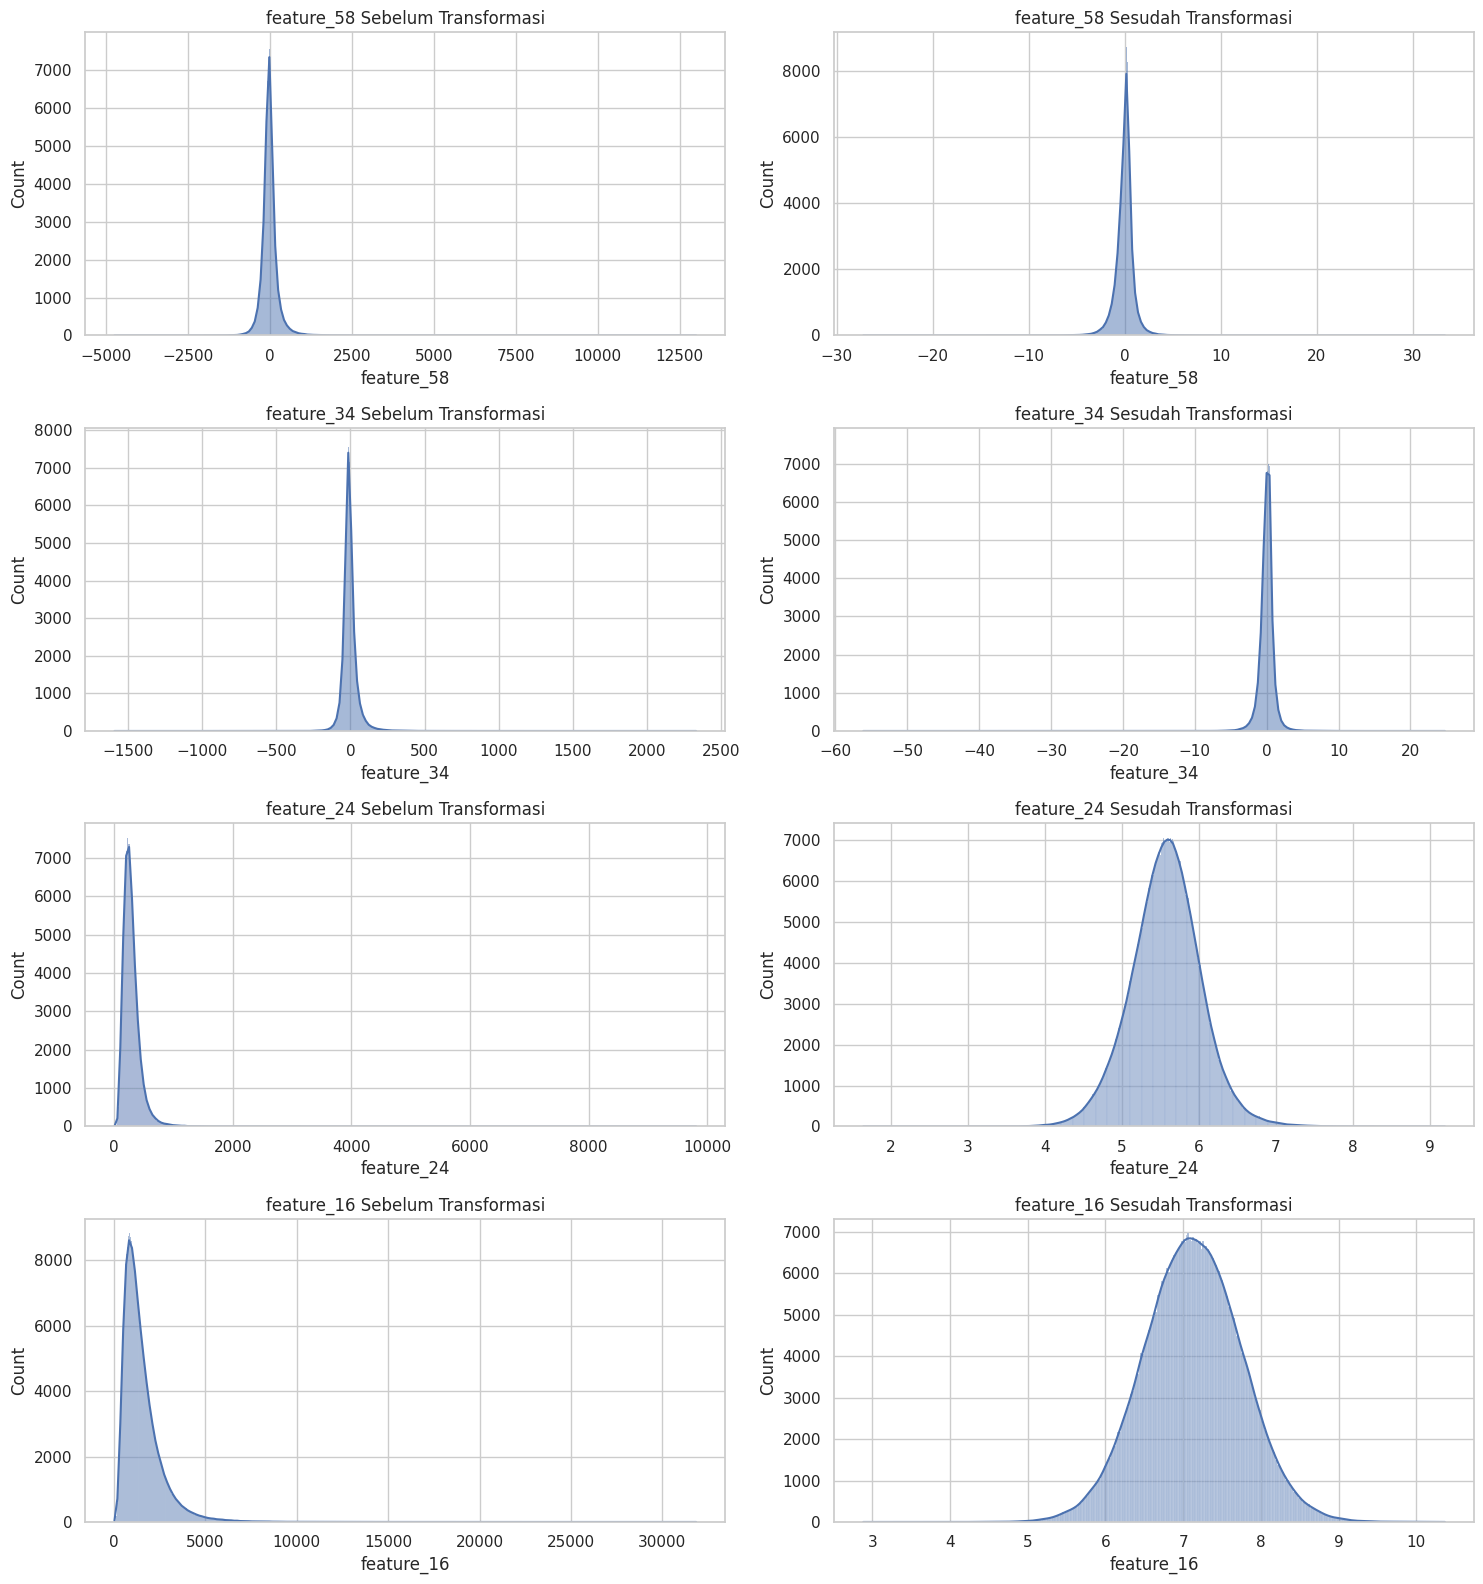


Skewness setelah transformasi:
feature_58    0.617776
feature_34   -0.720197
feature_24    0.039406
feature_16    0.015427
feature_21    0.058553
feature_23    0.145747
feature_17   -0.020721
feature_69    1.024546
feature_14   -0.134914
feature_68    0.825356
feature_19   -0.054437
feature_20    0.114621
feature_18   -0.190997
feature_15   -0.219284
feature_81    0.074927
feature_26   -0.236843
feature_13   -0.427116
feature_22   -0.066837
feature_61    0.117428
feature_83    0.528645
feature_57    1.117035
feature_56    0.103712
feature_48    0.857545
feature_37   -0.662599
feature_60   -0.195564
feature_30    0.310555
feature_88    0.160247
feature_89   -0.057980
feature_59    0.546520
feature_33    0.625811
feature_77   -2.465865
feature_36    0.767026
feature_90   -0.036478
feature_52    0.843367
feature_80    0.360469
feature_47    0.039308
feature_65   -0.080689
feature_82   -0.540551
feature_76    0.123696
feature_71    0.010686
feature_42    0.626870
feature_55   -0.008923
fe

In [37]:
# Periksa skewness fitur
skewness = data.drop('target', axis=1).skew()
highly_skewed = skewness[abs(skewness) > 1].sort_values(ascending=False)

print(f"Fitur dengan skewness tinggi (|skew| > 1): {len(highly_skewed)} fitur")
if len(highly_skewed) > 0 and len(highly_skewed) <= 10:
    print(highly_skewed)
elif len(highly_skewed) > 10:
    print(highly_skewed.head(10))
    print("...dan lebih banyak lagi")

# Simpan data sebelum transformasi untuk visualisasi
data_before_transform = data.copy()

# Transformasi untuk fitur yang skewed menggunakan log1p (log(1+x))
# Kita gunakan log1p karena bekerja dengan nilai 0 dan positif
if len(highly_skewed) > 0:
    for col in highly_skewed.index:
        if data[col].min() >= 0:  # Log hanya untuk nilai non-negatif
            # Periksa apakah ada nilai 0 (untuk menghindari -inf pada log)
            if data[col].min() == 0:
                print(f"Menerapkan log1p transformasi pada {col}")
                data[col] = np.log1p(data[col])
            else:
                print(f"Menerapkan log transformasi pada {col}")
                data[col] = np.log(data[col])
        else:  # Untuk nilai negatif, gunakan transformasi lain
            print(f"Menerapkan power transformasi pada {col}")
            # PowerTransformer dengan method 'yeo-johnson' bisa menangani nilai negatif
            pt = PowerTransformer(method='yeo-johnson')
            data[col] = pt.fit_transform(data[col].values.reshape(-1, 1)).flatten()

# Visualisasi fitur sebelum dan sesudah transformasi (untuk beberapa fitur pertama)
if len(highly_skewed) > 0:
    n_plots = min(4, len(highly_skewed))
    plt.figure(figsize=(15, 4 * n_plots))
    for i, col in enumerate(highly_skewed.index[:n_plots]):
        # Sebelum transformasi
        plt.subplot(n_plots, 2, 2*i+1)
        sns.histplot(data_before_transform[col], kde=True)
        plt.title(f'{col} Sebelum Transformasi')
        plt.grid(True)

        # Sesudah transformasi
        plt.subplot(n_plots, 2, 2*i+2)
        sns.histplot(data[col], kde=True)
        plt.title(f'{col} Sesudah Transformasi')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Cek skewness setelah transformasi
    new_skewness = data[highly_skewed.index].skew()
    print("\nSkewness setelah transformasi:")
    print(new_skewness)

**Penjelasan Transformasi Fitur:**

Transformasi fitur penting untuk membuat distribusi data lebih normal, yang dapat meningkatkan performa model. Beberapa transformasi yang umum adalah:

1. **Log Transformation**: $f(x) = \log(x)$ atau $f(x) = \log(1+x)$ (untuk nilai non-negatif)
   - Meskipkan tail kanan dari distribusi
   - Mendekatkan distribusi ke normal
   - Cocok untuk data dengan skew positif

2. **Power Transformation (Box-Cox)**: $f(x) = \frac{x^\lambda - 1}{\lambda}$ jika $\lambda \neq 0$, atau $f(x) = \log(x)$ jika $\lambda = 0$
   - Memerlukan $x > 0$
   - Parameter $\lambda$ dipilih untuk memaksimalkan likelihood

3. **Yeo-Johnson Transformation**: Ekstensi dari Box-Cox yang dapat menangani nilai negatif

4. **Square Root Transformation**: $f(x) = \sqrt{x}$ (untuk nilai non-negatif)
   - Kurang kuat dibandingkan log untuk skew yang ekstrem

5. **Reciprocal Transformation**: $f(x) = \frac{1}{x}$ (untuk nilai non-nol)
   - Sangat merubah data, berhati-hati dengan interpretasi

Efektivitas transformasi dapat dilihat dari:
- Pengurangan skewness (mendekati 0)
- Distribusi yang lebih mendekati normal
- Peningkatan performa model

### 4.2 Pembuatan Fitur Baru (Feature Creation)

In [38]:
# Fitur baru bisa berupa kombinasi dari fitur yang sudah ada
# 1. Polynomial features
# 2. Interaksi antar fitur
# 3. Fitur agregat
# 4. Fitur berbasis domain knowledge

# Identifikasi fitur dengan korelasi tinggi terhadap target
target_corr = data.corr()['target'].abs().sort_values(ascending=False)
top_features = target_corr[1:6].index.tolist()  # 5 fitur teratas (exclude target)
print(f"5 fitur dengan korelasi tertinggi terhadap target:\n{target_corr[1:6]}\n")

# 1. Polynomial features untuk fitur-fitur teratas
for feat in top_features:
    # Fitur kuadrat
    data[f'{feat}_squared'] = data[feat] ** 2
    print(f"Created {feat}_squared")

    # Fitur cubic
    data[f'{feat}_cubic'] = data[feat] ** 3
    print(f"Created {feat}_cubic")

# 2. Interaksi antara fitur-fitur teratas
for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        feat1, feat2 = top_features[i], top_features[j]
        data[f'{feat1}_x_{feat2}'] = data[feat1] * data[feat2]
        print(f"Created {feat1}_x_{feat2}")

# 3. Fitur agregat
# a. Mean
data['mean_top_features'] = data[top_features].mean(axis=1)
print("Created mean_top_features")

# b. Sum
data['sum_top_features'] = data[top_features].sum(axis=1)
print("Created sum_top_features")

# c. Max-Min
data['range_top_features'] = data[top_features].max(axis=1) - data[top_features].min(axis=1)
print("Created range_top_features")

# d. Ratio (jika semua nilai positif)
if all(data[top_features].min() > 0):
    max_feat = data[top_features].max(axis=1)
    min_feat = data[top_features].min(axis=1)
    data['ratio_max_min'] = max_feat / min_feat
    print("Created ratio_max_min")

# 4. Binning untuk fitur teratas
for feat in top_features[:2]:  # Binning untuk 2 fitur teratas saja
    data[f'{feat}_bin'] = pd.qcut(data[feat], 5, labels=False, duplicates='drop')
    print(f"Created {feat}_bin")

# Jika ini masalah klasifikasi, kita bisa membuat fitur berdasarkan target
if problem_type == 'classification':
    # Cek distribusi target
    target_counts = data['target'].value_counts()
    print("\nDistribusi kelas target:")
    print(target_counts)

# Cek hasil penambahan fitur
print(f"\nJumlah fitur sebelum feature creation: {len(col_names)-1}")
print(f"Jumlah fitur setelah feature creation: {data.shape[1]-1}")
print(f"Jumlah fitur baru yang dibuat: {data.shape[1]-len(col_names)}")

5 fitur dengan korelasi tertinggi terhadap target:
feature_1     0.225374
feature_6     0.187443
feature_3     0.139541
feature_63    0.126348
feature_40    0.123974
Name: target, dtype: float64

Created feature_1_squared
Created feature_1_cubic
Created feature_6_squared
Created feature_6_cubic
Created feature_3_squared
Created feature_3_cubic
Created feature_63_squared
Created feature_63_cubic
Created feature_40_squared
Created feature_40_cubic
Created feature_1_x_feature_6
Created feature_1_x_feature_3
Created feature_1_x_feature_63
Created feature_1_x_feature_40
Created feature_6_x_feature_3
Created feature_6_x_feature_63
Created feature_6_x_feature_40
Created feature_3_x_feature_63
Created feature_3_x_feature_40
Created feature_63_x_feature_40
Created mean_top_features
Created sum_top_features
Created range_top_features
Created feature_1_bin
Created feature_6_bin

Jumlah fitur sebelum feature creation: 90
Jumlah fitur setelah feature creation: 115
Jumlah fitur baru yang dibuat: 25


**Penjelasan Pembuatan Fitur Baru:**

Feature creation adalah proses menambahkan informasi baru ke dalam dataset dengan memanipulasi atau mengkombinasikan fitur-fitur yang sudah ada. Beberapa tipe feature creation yang kita lakukan:

1. **Polynomial Features**: Menangkap hubungan non-linear dalam data.
   - Fitur Kuadrat: $f(x) = x^2$
   - Fitur Cubic: $f(x) = x^3$
   - Dapat membantu model linear menangkap pola non-linear

2. **Interaksi antar Fitur**: Mengkombinasikan dua atau lebih fitur untuk memperoleh informasi yang tidak ditangkap oleh fitur individual.
   - Interaksi multiplikatif: $f(x_1, x_2) = x_1 \times x_2$
   - Penting untuk menangkap efek interaksi antar variabel

3. **Fitur Agregat**: Mengumpulkan statistik dari beberapa fitur.
   - Mean: $\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$
   - Sum: $\sum_{i=1}^{n}x_i$
   - Range: $max(x) - min(x)$
   - Ratio: $\frac{max(x)}{min(x)}$

4. **Binning**: Mengkonversi variabel kontinu menjadi kategorikal.
   - Equal-width binning: Membagi rentang nilai menjadi bins dengan lebar yang sama
   - Equal-frequency binning (quantile binning): Membagi dataset sehingga setiap bin memiliki jumlah sampel yang sama

Feature creation yang baik biasanya berdasarkan:
- Domain knowledge tentang hubungan antar fitur
- Exploratory data analysis yang mengidentifikasi pola potensial
- Feature importance analysis dari model awal

### 4.3 Feature Selection

In [39]:
# Setelah menambahkan fitur baru, kita perlu memilih fitur yang relevan
# Ini penting untuk mengurangi dimensi dan mengatasi multicolinearity

# 1. Variance Threshold
# Hapus fitur dengan variance yang rendah (tidak informatif)
X = data.drop('target', axis=1)
y = data['target']

print("Melakukan feature selection...")
print(f"Jumlah fitur sebelum selection: {X.shape[1]}")

# Variance Threshold untuk hapus fitur konstan atau quasi-konstan
var_selector = VarianceThreshold(threshold=0.01)  # Fitur dengan variance < 0.01 dihapus
X_var_selected = var_selector.fit_transform(X)
kept_features = X.columns[var_selector.get_support()].tolist()

print(f"Jumlah fitur setelah Variance Threshold: {X_var_selected.shape[1]}")
if X.shape[1] > X_var_selected.shape[1]:
    removed_features = [feat for feat in X.columns if feat not in kept_features]
    print(f"Feature yang dihapus karena variance rendah: {removed_features}")

# 2. Feature Selection berdasarkan korelasi
# Untuk regression: SelectKBest dengan f_regression atau mutual_info_regression
# Untuk classification: SelectKBest dengan f_classif atau mutual_info_classif

# Tentukan jumlah fitur yang akan dipilih (misalnya 50% dari jumlah fitur setelah variance threshold)
k = max(int(X_var_selected.shape[1] * 0.5), 10)  # Minimal 10 fitur

if problem_type == 'regression':
    # Gunakan f_regression untuk masalah regresi
    print("\nSelecting top features for regression using f_regression...")
    selector = SelectKBest(score_func=f_regression, k=k)
    X_new = selector.fit_transform(X[kept_features], y)
    selected_features = np.array(kept_features)[selector.get_support()].tolist()

    # Ambil skor dan p-values
    scores = selector.scores_
    pvalues = selector.pvalues_
    feature_scores = pd.DataFrame({'Feature': kept_features, 'Score': scores, 'P-value': pvalues})
    feature_scores = feature_scores.sort_values(by='Score', ascending=False)

    print(f"Top 10 features berdasarkan f_regression:")
    print(feature_scores.head(10))

    # 3. Mutual Information (non-linear feature selection)
    print("\nSelecting top features for regression using mutual_info_regression...")
    mi_selector = SelectKBest(score_func=mutual_info_regression, k=k)
    X_mi = mi_selector.fit_transform(X[kept_features], y)
    mi_selected_features = np.array(kept_features)[mi_selector.get_support()].tolist()

    # Ambil skor
    mi_scores = mi_selector.scores_
    mi_feature_scores = pd.DataFrame({'Feature': kept_features, 'MI Score': mi_scores})
    mi_feature_scores = mi_feature_scores.sort_values(by='MI Score', ascending=False)

    print(f"Top 10 features berdasarkan mutual_info_regression:")
    print(mi_feature_scores.head(10))

    # Gabungkan hasil dari kedua metode
    selected_features_set = set(selected_features + mi_selected_features)
    selected_features_final = list(selected_features_set)

else:  # classification
    # Gunakan f_classif untuk masalah klasifikasi
    print("\nSelecting top features for classification using f_classif...")
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X[kept_features], y)
    selected_features = np.array(kept_features)[selector.get_support()].tolist()

    # Ambil skor dan p-values
    scores = selector.scores_
    pvalues = selector.pvalues_
    feature_scores = pd.DataFrame({'Feature': kept_features, 'Score': scores, 'P-value': pvalues})
    feature_scores = feature_scores.sort_values(by='Score', ascending=False)

    print(f"Top 10 features berdasarkan f_classif:")
    print(feature_scores.head(10))

    # 3. Mutual Information (non-linear feature selection)
    print("\nSelecting top features for classification using mutual_info_classif...")
    mi_selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_mi = mi_selector.fit_transform(X[kept_features], y)
    mi_selected_features = np.array(kept_features)[mi_selector.get_support()].tolist()

    # Ambil skor
    mi_scores = mi_selector.scores_
    mi_feature_scores = pd.DataFrame({'Feature': kept_features, 'MI Score': mi_scores})
    mi_feature_scores = mi_feature_scores.sort_values(by='MI Score', ascending=False)

    print(f"Top 10 features berdasarkan mutual_info_classif:")
    print(mi_feature_scores.head(10))

    # Gabungkan hasil dari kedua metode
    selected_features_set = set(selected_features + mi_selected_features)
    selected_features_final = list(selected_features_set)

# Ambil fitur yang terpilih
X_selected = X[selected_features_final]
print(f"\nJumlah fitur setelah feature selection: {X_selected.shape[1]}")
print(f"Feature yang terpilih: {selected_features_final[:10]}" + (", ..." if len(selected_features_final) > 10 else ""))

Melakukan feature selection...
Jumlah fitur sebelum selection: 115
Jumlah fitur setelah Variance Threshold: 115

Selecting top features for regression using f_regression...
Top 10 features berdasarkan f_regression:
                   Feature         Score  P-value
113          feature_1_bin  33339.739957      0.0
91         feature_1_cubic  32573.293160      0.0
90       feature_1_squared  30605.594159      0.0
0                feature_1  27576.641555      0.0
100  feature_1_x_feature_6  22630.710697      0.0
114          feature_6_bin  19447.251535      0.0
5                feature_6  18765.883605      0.0
110      mean_top_features  14329.009824      0.0
111       sum_top_features  14329.009824      0.0
2                feature_3  10233.855346      0.0

Selecting top features for regression using mutual_info_regression...
Top 10 features berdasarkan mutual_info_regression:
                    Feature  MI Score
91          feature_1_cubic  0.045976
90        feature_1_squared  0.04597

**Penjelasan Feature Selection:**

Feature selection adalah proses pemilihan subset fitur yang paling relevan untuk model. Tujuannya adalah:
- Mengurangi dimensionalitas (curse of dimensionality)
- Mengatasi multicollinearity
- Meningkatkan interpretabilitas model
- Mengurangi waktu training
- Menghindari overfitting

1. **Variance Threshold**: Menghapus fitur dengan variance rendah.
   - Variance rendah mengindikasikan fitur hampir konstan yang biasanya tidak informatif
   - Threshold yang kita gunakan 0.01, artinya fitur dengan variance < 0.01 dihapus

2. **F-regression/F-classif**: Statistik F mengukur korelasi linear antara fitur dan target.
   - Untuk regresi (f_regression): Menggunakan correlation coefficient ($r$) yang dikuadratkan dan dikonversi ke F-statistic
   - Untuk klasifikasi (f_classif): F-statistic dari ANOVA test, mengukur perbedaan mean fitur antara kelas-kelas
   
   F-statistic didefinisikan sebagai rasio antara variasi antar kelompok dan variasi dalam kelompok:
   $$F = \frac{MS_{between}}{MS_{within}} = \frac{\sum n_i(\bar{x}_i - \bar{x})^2 / (k-1)}{\sum\sum (x_{ij} - \bar{x}_i)^2 / (n-k)}$$
   
   dimana $n_i$ adalah jumlah sampel dalam grup $i$, $\bar{x}_i$ adalah mean grup $i$, $\bar{x}$ adalah mean keseluruhan, $k$ adalah jumlah grup, dan $n$ adalah total jumlah sampel.

3. **Mutual Information**: Mengukur dependensi non-linear antara fitur dan target.
   - Mutual information $I(X;Y)$ mengukur seberapa banyak informasi tentang target $Y$ yang bisa didapatkan dari fitur $X$.
   - Secara matematis: $I(X;Y) = \sum_{y \in Y} \sum_{x \in X} p(x,y) \log\left(\frac{p(x,y)}{p(x)p(y)}\right)$
   - $I(X;Y) = 0$ jika $X$ dan $Y$ independen
   - $I(X;Y) > 0$ jika ada dependensi, semakin besar nilainya semakin kuat dependensi
   - Dapat menangkap hubungan non-linear yang tidak tertangkap oleh metode linear seperti korelasi Pearson

Dalam kode kita, kita mengkombinasikan fitur yang dipilih oleh kedua metode (F-test dan Mutual Information) untuk mendapatkan set fitur yang dapat menangkap dependensi linear dan non-linear.

### 4.4 Dimensionality Reduction (opsional)

Menerapkan PCA untuk dimensionality reduction...
Jumlah komponen PCA yang menjelaskan 95% variasi: 48
Bentuk data setelah PCA: (515345, 48)


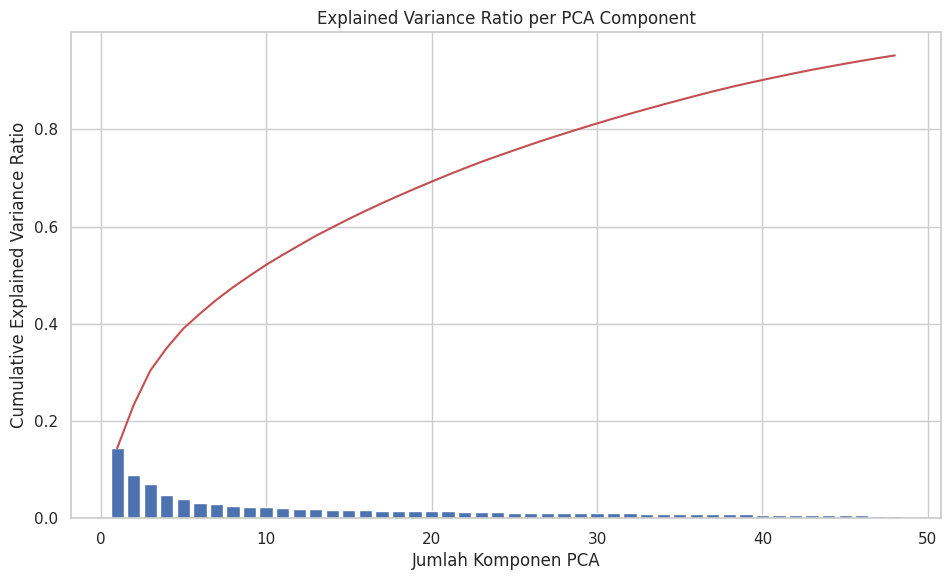


Korelasi top 3 komponen PCA dengan fitur asli:


,feature_85,feature_78,feature_1_x_feature_3,feature_21,feature_41,feature_63,feature_1_x_feature_63,feature_73,feature_57,feature_53,...,feature_70,feature_6_bin,feature_3,feature_22,feature_24,feature_1_squared,feature_40,feature_3_x_feature_63,feature_29,feature_3_cubic
PC1,0.033969,-0.041024,0.078805,-0.213438,0.033791,-0.164805,-0.157554,0.061576,-0.079785,0.011315,...,0.054995,-0.209428,0.063241,-0.206089,-0.183323,0.238154,-0.112460,-0.022446,0.020961,-0.001073
PC2,-0.003084,0.120189,0.198781,-0.013152,-0.090439,0.066383,0.057497,-0.136749,0.073968,-0.115128,...,-0.085687,-0.078196,0.200496,-0.195154,-0.017480,0.019200,0.258889,0.077335,-0.207763,0.114595
PC3,-0.043319,-0.067928,-0.125808,0.070570,-0.011711,0.185953,0.188727,0.147477,-0.029231,0.017433,...,-0.007018,-0.181955,-0.128360,-0.109117,0.083152,-0.207997,-0.068107,-0.038586,-0.151187,-0.084987


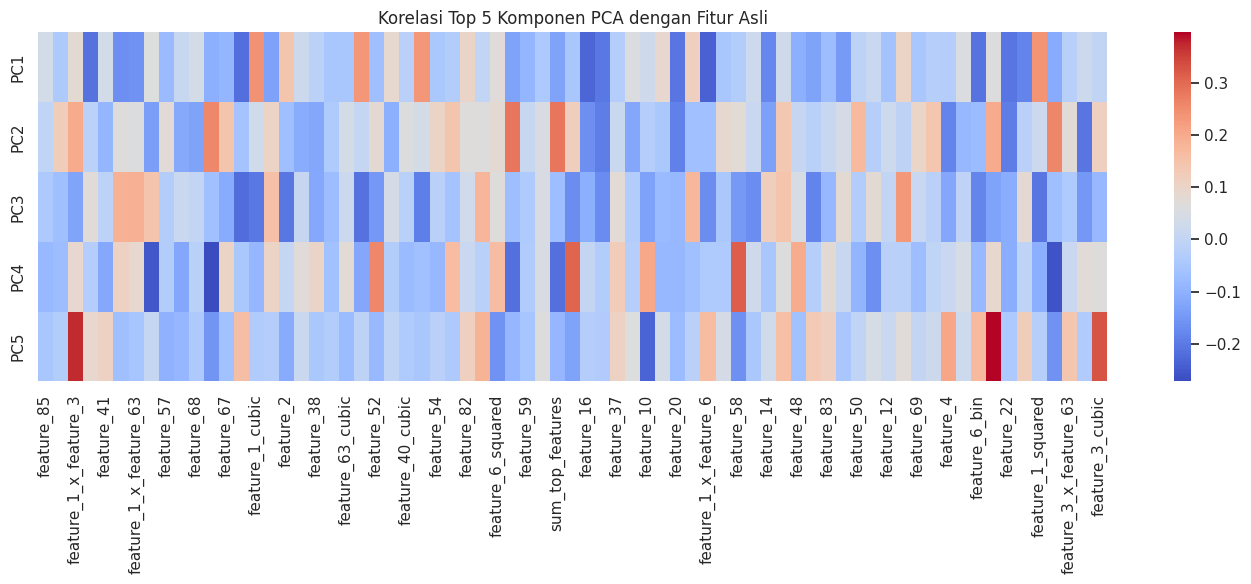

In [40]:
# Jika jumlah fitur masih banyak, bisa menggunakan PCA
if X_selected.shape[1] > 20:  # Jika masih ada > 20 fitur
    print("Menerapkan PCA untuk dimensionality reduction...")

    # Standardisasi data sebelum PCA
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    # Menentukan jumlah komponen yang menjelaskan 95% variasi
    pca = PCA(n_components=0.95)  # Menyimpan 95% variasi
    X_pca = pca.fit_transform(X_scaled)

    print(f"Jumlah komponen PCA yang menjelaskan 95% variasi: {pca.n_components_}")
    print(f"Bentuk data setelah PCA: {X_pca.shape}")

    # Visualisasi explained variance ratio
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
    plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), 'r-')
    plt.xlabel('Jumlah Komponen PCA')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Explained Variance Ratio per PCA Component')
    plt.grid(True)
    plt.show()

    # Korelasi komponen PCA dengan fitur asli
    component_features = pd.DataFrame(
        pca.components_,
        columns=X_selected.columns,
        index=[f'PC{i+1}' for i in range(pca.n_components_)]
    )

    print("\nKorelasi top 3 komponen PCA dengan fitur asli:")
    display(component_features.head(3))

    # Heatmap untuk melihat korelasi top komponen dengan fitur
    plt.figure(figsize=(14, 6))
    sns.heatmap(component_features.iloc[:min(5, pca.n_components_)], cmap='coolwarm', annot=False)
    plt.title('Korelasi Top 5 Komponen PCA dengan Fitur Asli')
    plt.tight_layout()
    plt.show()

    # Gunakan data hasil PCA
    X_final = X_pca
    is_pca_applied = True
else:
    # Jika fitur tidak terlalu banyak, gunakan fitur terseleksi langsung
    X_final = X_selected
    is_pca_applied = False

**Penjelasan Dimensionality Reduction dengan PCA:**

PCA (Principal Component Analysis) adalah teknik untuk mereduksi dimensi dataset dengan tetap mempertahankan sebanyak mungkin variasi. PCA bekerja dengan:

1. **Standarisasi Data**:
   - Data perlu di-standarisasi sebelum PCA untuk memastikan fitur dengan skala besar tidak mendominasi
   - $z = \frac{x - \mu}{\sigma}$ dimana $\mu$ adalah mean dan $\sigma$ adalah standar deviasi

2. **Menghitung Covariance Matrix**:
   - $\Sigma = \frac{1}{n-1} X^T X$ dimana $X$ adalah matriks data yang sudah di-standardisasi

3. **Dekomposisi Eigenvalue**:
   - Mencari eigenvalues ($\lambda$) dan eigenvectors ($v$) dari covariance matrix
   - $\Sigma v = \lambda v$

4. **Memilih Principal Component**:
   - Mengurutkan eigenvectors berdasarkan eigenvalues (dari besar ke kecil)
   - Memilih $k$ eigenvectors teratas sebagai principal components
   - Eigenvalue menunjukkan variansi yang dijelaskan oleh komponen tersebut

5. **Proyeksi Data**:
   - Proyeksikan data ke ruang baru yang dibentuk oleh principal components
   - $X_{PCA} = X \times W$ dimana $W$ adalah matriks eigenvectors terpilih

**Explained Variance Ratio**:
- Menunjukkan proporsi variasi yang dijelaskan oleh setiap komponen
- $\text{explained variance ratio}_i = \frac{\lambda_i}{\sum_{j=1}^{d} \lambda_j}$ dimana $d$ adalah jumlah total dimensi

**Cumulative Explained Variance**:
- Jumlah kumulatif variansi yang dijelaskan oleh $k$ komponen pertama
- $\text{cumulative explained variance}_k = \sum_{i=1}^{k} \text{explained variance ratio}_i$

PCA efektif jika:
- Ada korelasi tinggi antar fitur
- Jumlah fitur sangat besar
- Kita ingin mengatasi multicollinearity
- Kita ingin mengurangi overfitting dengan mengurangi dimensi

## 5. Scaling / Normalisasi Data

In [41]:
# Scaling/Normalisasi sangat penting untuk deep learning
# Kita akan membandingkan berbagai metode scaling

# Untuk data hasil PCA, tidak perlu scaling lagi (sudah scaled sebelum PCA)
if not is_pca_applied:
    # Bandingkan beberapa scaler
    scalers = {
        'StandardScaler': StandardScaler(),
        'MinMaxScaler': MinMaxScaler(),
        'RobustScaler': RobustScaler()
    }

    # Simpan hasil scaling untuk visualisasi
    scaled_data = {}

    # Terapkan scaling
    for name, scaler in scalers.items():
        X_scaled = scaler.fit_transform(X_final)
        scaled_data[name] = X_scaled

    # Visualisasi hasil scaling untuk beberapa fitur pertama
    plt.figure(figsize=(15, 10))

    # Plot data original
    plt.subplot(2, 2, 1)
    plt.boxplot(X_final.values[:, :min(5, X_final.shape[1])], labels=[f'F{i+1}' for i in range(min(5, X_final.shape[1]))])
    plt.title('Original Data')
    plt.grid(True)

    # Plot hasil scaling
    for i, (name, X_scaled) in enumerate(scaled_data.items(), 2):
        plt.subplot(2, 2, i)
        plt.boxplot(X_scaled[:, :min(5, X_final.shape[1])], labels=[f'F{i+1}' for i in range(min(5, X_final.shape[1]))])
        plt.title(f'{name}')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Pilih scaler berdasarkan karakteristik data
    # Jika ada outlier, gunakan RobustScaler
    # Jika tidak, StandardScaler biasanya pilihan yang baik untuk deep learning

    # Cek kembali outlier dalam data
    z_scores = np.abs(stats.zscore(X_final))
    outlier_rows = np.where(np.any(z_scores > 3, axis=1))[0]

    if len(outlier_rows) / X_final.shape[0] > 0.05:  # Jika outlier > 5%
        print("Menggunakan RobustScaler karena terdapat banyak outlier")
        selected_scaler = 'RobustScaler'
        X_final_scaled = scaled_data[selected_scaler]
    else:
        print("Menggunakan StandardScaler (pilihan umum untuk deep learning)")
        selected_scaler = 'StandardScaler'
        X_final_scaled = scaled_data[selected_scaler]
else:
    # Jika PCA sudah diterapkan, data sudah di-scaled
    print("Data sudah di-scaled sebelum PCA")
    X_final_scaled = X_final
    selected_scaler = 'Already scaled by PCA'

Data sudah di-scaled sebelum PCA


**Penjelasan Scaling/Normalisasi:**

Scaling adalah langkah penting dalam preprocessing data, terutama untuk model deep learning. Beberapa algoritma performa optimumnya sangat bergantung pada scaling data. Scaling memastikan fitur-fitur yang memiliki range nilai berbeda memiliki kontribusi yang setara dalam model.

Beberapa metode scaling yang umum:

1. **StandardScaler (Z-score normalization)**:
   - $z = \frac{x - \mu}{\sigma}$
   - Mengubah distribusi menjadi mean=0 dan std=1
   - Cocok untuk data yang terdistribusi normal
   - Sensitif terhadap outlier

2. **MinMaxScaler**:
   - $x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$
   - Mengubah distribusi menjadi range [0,1]
   - Mempertahankan distribusi asli, hanya menskala ulang
   - Sensitif terhadap outlier

3. **RobustScaler**:
   - $x_{scaled} = \frac{x - median(x)}{IQR(x)}$ dimana $IQR = Q3 - Q1$
   - Mengunakan statistik yang robust terhadap outlier
   - Cocok untuk data dengan outlier

Pemilihan scaler bergantung pada karakteristik data:
- Jika banyak outlier: RobustScaler
- Jika data terdistribusi normal dengan few outliers: StandardScaler
- Jika butuh range tertentu ([0,1]): MinMaxScaler

Untuk deep learning, StandardScaler umumnya merupakan pilihan yang baik karena:
- Gradient descent converges lebih cepat dengan data yang distandarisasi
- Weight updates lebih stabil
- Activation functions (sigmoid, tanh) bekerja lebih baik dengan distribusi yang terstandarisasi

## 6. Train-Test Split

In [42]:
# Split data menjadi training, validation, dan test set
# Untuk deep learning, validasi set sangat penting untuk early stopping

# Pertama, split menjadi train+val dan test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_final_scaled, y, test_size=0.2, random_state=42
)

# Kemudian, split train+val menjadi train dan val
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Convert ke format yang sesuai untuk deep learning frameworks
if problem_type == 'classification':
    # Untuk klasifikasi, kita perlu encoding target
    unique_classes = np.unique(y)
    print(f"Jumlah kelas target: {len(unique_classes)}")

    # One-hot encoding untuk target jika multi-class classification
    if len(unique_classes) > 2:
        # TensorFlow/Keras
        from tensorflow.keras.utils import to_categorical
        # Konversi label menjadi index 0,1,2,...
        from sklearn.preprocessing import LabelEncoder
        label_encoder = LabelEncoder()
        y_train_idx = label_encoder.fit_transform(y_train)
        y_val_idx = label_encoder.transform(y_val)
        y_test_idx = label_encoder.transform(y_test)

        # One-hot encoding
        y_train_keras = to_categorical(y_train_idx)
        y_val_keras = to_categorical(y_val_idx)
        y_test_keras = to_categorical(y_test_idx)

        # Untuk PyTorch, kita menggunakan index saja
        y_train_torch = torch.tensor(y_train_idx, dtype=torch.long)
        y_val_torch = torch.tensor(y_val_idx, dtype=torch.long)
        y_test_torch = torch.tensor(y_test_idx, dtype=torch.long)

        print(f"Shape of y_train_keras (one-hot): {y_train_keras.shape}")
    else:  # Binary classification
        # Ubah label menjadi 0 dan 1
        label_encoder = LabelEncoder()
        y_train_idx = label_encoder.fit_transform(y_train)
        y_val_idx = label_encoder.transform(y_val)
        y_test_idx = label_encoder.transform(y_test)

        # TensorFlow/Keras
        y_train_keras = y_train_idx.reshape(-1, 1)
        y_val_keras = y_val_idx.reshape(-1, 1)
        y_test_keras = y_test_idx.reshape(-1, 1)

        # PyTorch
        y_train_torch = torch.tensor(y_train_idx, dtype=torch.float32).reshape(-1, 1)
        y_val_torch = torch.tensor(y_val_idx, dtype=torch.float32).reshape(-1, 1)
        y_test_torch = torch.tensor(y_test_idx, dtype=torch.float32).reshape(-1, 1)

        print(f"Binary classification, target values: {unique_classes}")
else:  # Regression
    # TensorFlow/Keras
    y_train_keras = y_train.values.reshape(-1, 1)
    y_val_keras = y_val.values.reshape(-1, 1)
    y_test_keras = y_test.values.reshape(-1, 1)

    # PyTorch
    y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)
    y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

    print(f"Regression problem, target range: [{y.min():.4f}, {y.max():.4f}]")

# Convert X data ke format tensor/array
# TensorFlow/Keras
X_train_keras = X_train.astype(np.float32)
X_val_keras = X_val.astype(np.float32)
X_test_keras = X_test.astype(np.float32)

# PyTorch
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_val_torch = torch.tensor(X_val, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)

Shape of X_train: (329820, 48)
Shape of X_val: (82456, 48)
Shape of X_test: (103069, 48)
Regression problem, target range: [1922.0000, 2011.0000]


**Penjelasan Train-Test Split:**

Train-test split adalah strategi validasi dasar dalam machine learning dimana dataset dibagi menjadi beberapa bagian:

1. **Training Set (60-70%)**: Digunakan untuk melatih model
2. **Validation Set (10-20%)**: Digunakan untuk fine-tuning hyperparameter dan early stopping
3. **Test Set (10-20%)**: Digunakan untuk evaluasi final model

Dalam kode di atas, kita menerapkan strategi split bertingkat:
- Pertama, split 80% data untuk train+validation dan 20% untuk test
- Kemudian, split train+validation menjadi 80% train dan 20% validation

**Target Encoding untuk Klasifikasi:**

Untuk klasifikasi, kita perlu mengubah target menjadi format yang sesuai:

1. **Binary Classification**:
   - TensorFlow: Target diubah menjadi 0 dan 1 dalam shape (n_samples, 1)
   - PyTorch: Target diubah menjadi 0 dan 1 dalam tensor dengan dtype torch.float32

2. **Multi-class Classification**:
   - TensorFlow: Target diubah menjadi one-hot encoding, contohnya:
     - Class 0: [1, 0, 0]
     - Class 1: [0, 1, 0]
     - Class 2: [0, 0, 1]
   - PyTorch: Target diubah menjadi index kelas dalam tensor dengan dtype torch.long

**One-Hot Encoding** mengubah categorical target menjadi vektor biner dimana satu bit diset menjadi 1 dan sisanya 0. Secara matematis, jika $y$ adalah label kelas dan $C$ adalah jumlah kelas, maka one-hot vector $y_{oh}$ didefinisikan sebagai:

$$y_{oh}[i] = \begin{cases}
1 & \text{if } i = y \\
0 & \text{otherwise}
\end{cases} \text{ for } i \in \{0, 1, ..., C-1\}$$

**Format Data untuk Deep Learning:**

1. **TensorFlow/Keras**:
   - Memerlukan numpy arrays dengan dtype float32
   - Binary classification: target dalam shape (n_samples, 1)
   - Multi-class classification: target dalam one-hot encoding dengan shape (n_samples, n_classes)

2. **PyTorch**:
   - Memerlukan torch.tensor dengan dtype torch.float32 untuk data, torch.long untuk label klasifikasi multi-kelas
   - Binary classification: target dalam shape (n_samples, 1) dengan dtype torch.float32
   - Multi-class classification: target dalam shape (n_samples,) dengan dtype torch.long berisi index kelas (tidak one-hot)

## 7. Menyimpan Info Penting untuk Modeling

In [43]:
# Simpan dan tampilkan informasi penting yang akan digunakan dalam modeling

model_info = {
    'problem_type': problem_type,
    'input_dim': X_train.shape[1],
    'n_samples_train': X_train.shape[0],
    'n_samples_val': X_val.shape[0],
    'n_samples_test': X_test.shape[0],
    'scaling_method': selected_scaler,
    'is_pca_applied': is_pca_applied
}

if problem_type == 'classification':
    model_info['n_classes'] = len(unique_classes)
    model_info['classes'] = unique_classes.tolist()

    if len(unique_classes) > 2:
        model_info['output_dim'] = len(unique_classes)  # Multi-class, output = n_classes
        model_info['output_activation'] = 'softmax'  # Softmax for multi-class
        model_info['loss_function'] = 'categorical_crossentropy'
    else:
        model_info['output_dim'] = 1  # Binary classification, output = 1
        model_info['output_activation'] = 'sigmoid'  # Sigmoid for binary
        model_info['loss_function'] = 'binary_crossentropy'
else:  # Regression
    model_info['output_dim'] = 1
    model_info['output_activation'] = 'linear'  # Linear for regression
    model_info['loss_function'] = 'mse'
    model_info['target_min'] = float(y.min())
    model_info['target_max'] = float(y.max())
    model_info['target_mean'] = float(y.mean())
    model_info['target_std'] = float(y.std())

print("Informasi Model:")
for key, value in model_info.items():
    print(f"  {key}: {value}")

# Informasi tambahan untuk referensi
print("\nKerangka Data untuk Modeling:")
print(f"  X_train shape: {X_train.shape}")
print(f"  X_val shape: {X_val.shape}")
print(f"  X_test shape: {X_test.shape}")

if problem_type == 'classification':
    if len(unique_classes) > 2:
        print(f"  y_train_keras shape: {y_train_keras.shape} (one-hot encoded)")
        print(f"  y_train_torch shape: {y_train_torch.shape} (class indices)")
    else:
        print(f"  y_train_keras shape: {y_train_keras.shape} (binary)")
        print(f"  y_train_torch shape: {y_train_torch.shape} (binary)")
else:
    print(f"  y_train_keras shape: {y_train_keras.shape} (regression)")
    print(f"  y_train_torch shape: {y_train_torch.shape} (regression)")

Informasi Model:
  problem_type: regression
  input_dim: 48
  n_samples_train: 329820
  n_samples_val: 82456
  n_samples_test: 103069
  scaling_method: Already scaled by PCA
  is_pca_applied: True
  output_dim: 1
  output_activation: linear
  loss_function: mse
  target_min: 1922.0
  target_max: 2011.0
  target_mean: 1998.3970815667174
  target_std: 10.931046354336484

Kerangka Data untuk Modeling:
  X_train shape: (329820, 48)
  X_val shape: (82456, 48)
  X_test shape: (103069, 48)
  y_train_keras shape: (329820, 1) (regression)
  y_train_torch shape: torch.Size([329820, 1]) (regression)


## Kesimpulan Feature Engineering dan Preprocessing

Pada bagian ini, kita telah melakukan proses feature engineering dan preprocessing yang komprehensif, meliputi:

1. **Penanganan Missing Values**:
   - Menggunakan metode yang sesuai (deletion atau imputation) berdasarkan jumlah missing values

2. **Penanganan Outlier**:
   - Deteksi outlier dengan Z-score dan IQR
   - Menangani outlier dengan capping atau robust scaling

3. **Feature Engineering**:
   - Transformasi fitur untuk mengatasi skewness
   - Pembuatan fitur baru (polynomial, interaksi, agregasi)
   - Feature selection dengan Variance Threshold, F-test, dan Mutual Information
   - Dimensionality reduction dengan PCA (opsional)

4. **Scaling/Normalisasi**:
   - Membandingkan berbagai metode scaling
   - Memilih scaler yang sesuai dengan karakteristik data

5. **Train-Test Split**:
   - Membagi data menjadi training, validation, dan test set
   - Mengkonversi data ke format yang sesuai untuk TensorFlow dan PyTorch
   - Preprocessing target untuk klasifikasi atau regresi

Hasil preprocessing dan feature engineering ini telah siap untuk digunakan dalam fase modeling, di mana kita akan membangun dan melatih model deep learning menggunakan TensorFlow dan PyTorch.

# End-to-End Deep Learning Pipeline untuk Regresi dan Klasifikasi

## Bagian 3: Model Building dan Training dengan TensorFlow

Pada bagian ini, kita akan:
1. Membangun model deep learning dengan TensorFlow/Keras
2. Menerapkan teknik regularisasi dan callback
3. Melatih model
4. Evaluasi model dengan metrik yang sesuai
5. Visualisasi hasil

In [44]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import time

# Set random seed untuk reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set konfigurasi visualisasi
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Persiapan Data

Asumsikan bahwa data sudah dipersiapkan dari notebook bagian 2 (Feature Engineering dan Preprocessing):

In [45]:
# Menyiapkan variabel untuk data yang sudah diproses dari bagian sebelumnya
# Pada notebook real, data ini akan diambil dari bagian preprocessing

# Untuk ilustrasi, berikut adalah struktur data yang diharapkan:
# X_train_keras - array of shape (n_samples, n_features)
# X_val_keras - array of shape (n_samples, n_features)
# X_test_keras - array of shape (n_samples, n_features)
# Untuk masalah klasifikasi biner:
#   y_train_keras - array of shape (n_samples, 1) dengan nilai 0 atau 1
#   y_val_keras - array of shape (n_samples, 1) dengan nilai 0 atau 1
#   y_test_keras - array of shape (n_samples, 1) dengan nilai 0 atau 1
# Untuk masalah klasifikasi multi-kelas:
#   y_train_keras - array of shape (n_samples, n_classes) dengan one-hot encoding
#   y_val_keras - array of shape (n_samples, n_classes) dengan one-hot encoding
#   y_test_keras - array of shape (n_samples, n_classes) dengan one-hot encoding
# Untuk masalah regresi:
#   y_train_keras - array of shape (n_samples, 1) dengan nilai kontinyu
#   y_val_keras - array of shape (n_samples, 1) dengan nilai kontinyu
#   y_test_keras - array of shape (n_samples, 1) dengan nilai kontinyu

# Definisikan model_info berdasarkan hasil preprocessing
model_info = {
    'problem_type': 'regression',  # atau 'classification' (akan ditimpa dengan data actual)
    'input_dim': X_train_keras.shape[1],
    'n_samples_train': X_train_keras.shape[0],
    'n_samples_val': X_val_keras.shape[0],
    'n_samples_test': X_test_keras.shape[0]
}

# Menentukan output_dim dan activation berdasarkan problem_type
if model_info['problem_type'] == 'classification':
    if y_train_keras.shape[1] > 1:  # Multi-class (one-hot encoded)
        model_info['n_classes'] = y_train_keras.shape[1]
        model_info['output_dim'] = y_train_keras.shape[1]
        model_info['output_activation'] = 'softmax'
        model_info['loss_function'] = 'categorical_crossentropy'
    else:  # Binary classification
        model_info['n_classes'] = 2
        model_info['output_dim'] = 1
        model_info['output_activation'] = 'sigmoid'
        model_info['loss_function'] = 'binary_crossentropy'
else:  # Regression
    model_info['output_dim'] = 1
    model_info['output_activation'] = 'linear'
    model_info['loss_function'] = 'mse'

print("Informasi Model:")
for key, value in model_info.items():
    print(f"  {key}: {value}")

print("\nShape Data:")
print(f"  X_train_keras: {X_train_keras.shape}")
print(f"  y_train_keras: {y_train_keras.shape}")
print(f"  X_val_keras: {X_val_keras.shape}")
print(f"  y_val_keras: {y_val_keras.shape}")
print(f"  X_test_keras: {X_test_keras.shape}")
print(f"  y_test_keras: {y_test_keras.shape}")

Informasi Model:
  problem_type: regression
  input_dim: 48
  n_samples_train: 329820
  n_samples_val: 82456
  n_samples_test: 103069
  output_dim: 1
  output_activation: linear
  loss_function: mse

Shape Data:
  X_train_keras: (329820, 48)
  y_train_keras: (329820, 1)
  X_val_keras: (82456, 48)
  y_val_keras: (82456, 1)
  X_test_keras: (103069, 48)
  y_test_keras: (103069, 1)


## 2. Arsitektur Model TensorFlow/Keras

Kita akan membuat fungsi untuk membangun model MLP (Multi-Layer Perceptron) untuk regresi dan klasifikasi menggunakan TensorFlow/Keras.

In [46]:
def build_keras_mlp(input_dim, output_dim, output_activation,
                    hidden_layers=[128, 64, 32],
                    activation='relu',
                    dropout_rate=0.2,
                    batch_norm=True,
                    l1_reg=0.0,
                    l2_reg=0.01):
    """
    Membangun model MLP (Multi-Layer Perceptron) dengan TensorFlow/Keras.

    Parameters:
    -----------
    input_dim : int
        Dimensi input (jumlah fitur)
    output_dim : int
        Dimensi output (1 untuk regresi atau binary classfication, n_classes untuk multi-class)
    output_activation : str
        Fungsi aktivasi output ('linear' untuk regresi, 'sigmoid' untuk binary classification, 'softmax' untuk multi-class)
    hidden_layers : list
        List jumlah neuron di setiap hidden layer
    activation : str
        Fungsi aktivasi untuk hidden layers
    dropout_rate : float
        Dropout rate (0-1)
    batch_norm : bool
        Apakah menggunakan batch normalization
    l1_reg : float
        L1 regularization strength
    l2_reg : float
        L2 regularization strength

    Returns:
    --------
    model : keras.Model
        Model Keras yang sudah dikompilasi
    """
    regularizer = regularizers.l1_l2(l1=l1_reg, l2=l2_reg)

    # Input layer
    inputs = Input(shape=(input_dim,), name='input')
    x = inputs

    # Hidden layers
    for i, units in enumerate(hidden_layers):
        # Dense layer
        x = Dense(units,
                 kernel_regularizer=regularizer,
                 name=f'dense_{i+1}')(x)

        # Batch normalization (sebelum aktivasi)
        if batch_norm:
            x = BatchNormalization(name=f'batch_norm_{i+1}')(x)

        # Activation
        x = Activation(activation, name=f'activation_{i+1}')(x)

        # Dropout
        if dropout_rate > 0:
            x = Dropout(dropout_rate, name=f'dropout_{i+1}')(x)

    # Output layer
    outputs = Dense(output_dim, activation=output_activation, name='output')(x)

    # Model
    model = Model(inputs=inputs, outputs=outputs)

    return model

def compile_and_print_model(model, loss, metrics, optimizer='adam', lr=0.001):
    """
    Kompilasi model dan tampilkan summary.

    Parameters:
    -----------
    model : keras.Model
        Model Keras yang akan dikompilasi
    loss : str
        Loss function
    metrics : list
        List metrik untuk evaluasi
    optimizer : str or keras.optimizers.Optimizer
        Optimizer yang digunakan
    lr : float
        Learning rate

    Returns:
    --------
    model : keras.Model
        Model Keras yang sudah dikompilasi
    """
    # Optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=lr)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=lr)
    else:
        opt = optimizer

    # Kompilasi
    model.compile(optimizer=opt, loss=loss, metrics=metrics)

    # Print summary
    print("Model Summary:")
    model.summary()

    return model

**Penjelasan Arsitektur Model:**

Kita membangun model MLP (Multi-Layer Perceptron) dengan beberapa teknik regularisasi untuk mencegah overfitting:

1. **Batch Normalization**: Menormalkan output dari layer sebelumnya, sehingga mempercepat training dan meningkatkan stabilitas. Secara matematis, batch normalization melakukan:

   $$\hat{x}^{(k)} = \frac{x^{(k)} - \mu_\mathcal{B}}{ \sqrt{\sigma_\mathcal{B}^2 + \epsilon}}$$
   
   $$y^{(k)} = \gamma^{(k)} \hat{x}^{(k)} + \beta^{(k)}$$
   
   dimana:
   - $x^{(k)}$ adalah input ke batch norm untuk fitur $k$
   - $\mu_\mathcal{B}$ adalah mean batch
   - $\sigma_\mathcal{B}^2$ adalah variansi batch
   - $\gamma^{(k)}$ dan $\beta^{(k)}$ adalah parameter yang dapat dipelajari
   - $\epsilon$ adalah konstanta kecil untuk stabilitas numerik

2. **Dropout**: Secara acak mematikan sebagian neuron selama training untuk mengurangi overfitting. Jika probabilitas dropout adalah $p$, maka selama inference, output neuron dikalikan $(1-p)$ untuk kompensasi. Secara matematis:

   Selama training: $y = (x \cdot \text{mask}) \cdot W$, dimana mask ~ Bernoulli(1-p)
   
   Selama inference: $y = x \cdot W \cdot (1-p)$

3. **L1 dan L2 Regularization**: Menambahkan penalty pada loss function untuk mencegah overfitting.

   - L1 Regularization: $\lambda_1 \sum_{i=1}^n |w_i|$ (mendorong sparsity dalam weights)
   - L2 Regularization: $\lambda_2 \sum_{i=1}^n w_i^2$ (mendorong weights yang kecil secara umum)
   
   Total loss function dengan regularisasi:
   
   $$L_{total} = L_{original} + \lambda_1 \sum_{i=1}^n |w_i| + \lambda_2 \sum_{i=1}^n w_i^2$$

**Fungsi Aktivasi:**
1. **ReLU (Rectified Linear Unit)**: $f(x) = \max(0, x)$
   - Mengatasi masalah vanishing gradient
   - Komputasi yang efisien
   - Dapat menyebabkan "dying ReLU" dimana neuron selalu menghasilkan 0

2. **Sigmoid**: $f(x) = \frac{1}{1 + e^{-x}}$
   - Output dalam range (0, 1)
   - Cocok untuk binary classification
   - Memiliki masalah vanishing gradient untuk nilai ekstrem

3. **Softmax**: $f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{K} e^{x_j}}$
   - Menormalisasi output sehingga jumlahnya 1
   - Output dapat diinterpretasikan sebagai probabilitas
   - Cocok untuk multi-class classification

4. **Linear**: $f(x) = x$
   - Tidak melakukan transformasi apapun
   - Cocok untuk regresi dengan rentang nilai target yang tidak terbatas

## 3. Fungsi untuk Setup Callbacks

In [47]:
def setup_callbacks(checkpoint_path='model_checkpoint.h5',
                    patience_early_stopping=20,
                    patience_reduce_lr=10,
                    min_delta=0.001,
                    monitor='val_loss',
                    mode='min',
                    use_tensorboard=False,
                    log_dir='./logs'):
    """
    Setup callbacks untuk training.

    Parameters:
    -----------
    checkpoint_path : str
        Path untuk menyimpan model checkpoint
    patience_early_stopping : int
        Jumlah epoch tanpa improvement sebelum early stopping
    patience_reduce_lr : int
        Jumlah epoch tanpa improvement sebelum mengurangi learning rate
    min_delta : float
        Perubahan minimum yang dianggap sebagai improvement
    monitor : str
        Metrik yang dipantau
    mode : str
        'min' jika improvement adalah penurunan, 'max' jika improvement adalah kenaikan
    use_tensorboard : bool
        Apakah menggunakan TensorBoard
    log_dir : str
        Directory untuk log TensorBoard

    Returns:
    --------
    callbacks : list
        List callback yang akan digunakan dalam training
    """
    callbacks = []

    # Early Stopping
    early_stopping = EarlyStopping(
        monitor=monitor,
        patience=patience_early_stopping,
        min_delta=min_delta,
        mode=mode,
        restore_best_weights=True,
        verbose=1
    )
    callbacks.append(early_stopping)

    # Model Checkpoint
    checkpoint = ModelCheckpoint(
        filepath=checkpoint_path,
        monitor=monitor,
        save_best_only=True,
        mode=mode,
        verbose=1
    )
    callbacks.append(checkpoint)

    # Reduce Learning Rate on Plateau
    reduce_lr = ReduceLROnPlateau(
        monitor=monitor,
        factor=0.5,
        patience=patience_reduce_lr,
        min_delta=min_delta,
        mode=mode,
        min_lr=1e-6,
        verbose=1
    )
    callbacks.append(reduce_lr)

    # TensorBoard (opsional)
    if use_tensorboard:
        tensorboard = TensorBoard(
            log_dir=log_dir,
            histogram_freq=1,
            write_graph=True,
            update_freq='epoch'
        )
        callbacks.append(tensorboard)

    return callbacks

**Penjelasan Callbacks:**

Callbacks adalah fungsi yang dieksekusi di berbagai tahap training untuk memantau dan mengontrol proses.

1. **Early Stopping**: Menghentikan training ketika metrik yang dipantau (biasanya validation loss) berhenti membaik.
   - `patience`: Jumlah epoch tanpa improvement sebelum training dihentikan
   - `min_delta`: Perubahan minimum yang dianggap sebagai improvement
   - `restore_best_weights`: Mengembalikan weights model ke versi terbaik setelah training berhenti
   
   Early stopping membantu mencegah overfitting dengan prinsip: jika model mulai memperforma lebih buruk pada validation set, kemungkinan model sedang mulai overfit pada training set.

2. **Model Checkpoint**: Menyimpan state model pada titik tertentu, biasanya ketika mencapai performa terbaik pada validation set.
   - `save_best_only`: Hanya menyimpan model jika metrik yang dipantau membaik
   
   Checkpoint penting karena memungkinkan kita menyimpan versi terbaik dari model, bukan hanya versi terakhir.

3. **ReduceLROnPlateau**: Mengurangi learning rate ketika metrik yang dipantau berhenti membaik.
   - `factor`: Faktor untuk mengurangi learning rate (misalnya 0.5 berarti learning rate dikurangi setengahnya)
   - `patience`: Jumlah epoch tanpa improvement sebelum learning rate dikurangi
   - `min_lr`: Learning rate minimum
   
   Intuisi: Ketika model mendekati minimum loss, learning rate yang lebih kecil memungkinkan fine-tuning yang lebih halus.

4. **TensorBoard**: Interface untuk visualisasi metrics, aktivasi, dll. selama training.
   - Memungkinkan monitoring real-time
   - Menyediakan visualisasi distribution dan histogram dari aktivasi dan weights
   - Memungkinkan perbandingan runs yang berbeda

## 4. Fungsi untuk Training dan Evaluasi Model

In [48]:
def train_and_evaluate_keras_model(model, X_train, y_train, X_val, y_val, X_test, y_test,
                                   problem_type, batch_size=32, epochs=100,
                                   callbacks=None, verbose=1):
    """
    Train dan evaluasi model Keras.

    Parameters:
    -----------
    model : keras.Model
        Model Keras yang sudah dikompilasi
    X_train, y_train : numpy.ndarray
        Data training
    X_val, y_val : numpy.ndarray
        Data validasi
    X_test, y_test : numpy.ndarray
        Data test
    problem_type : str
        'regression' atau 'classification'
    batch_size : int
        Batch size untuk training
    epochs : int
        Jumlah maksimum epoch
    callbacks : list
        List callbacks
    verbose : int
        Level verbosity

    Returns:
    --------
    model : keras.Model
        Model yang sudah di-training
    history : keras.callbacks.History
        History training
    evaluation : dict
        Hasil evaluasi pada data test
    """
    # Start time
    start_time = time.time()

    # Training
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs,
        callbacks=callbacks,
        verbose=verbose
    )

    # End time
    training_time = time.time() - start_time
    print(f"Training completed in {training_time:.2f} seconds")

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    evaluation = {}

    if problem_type == 'regression':
        # Metrik regresi
        evaluation['mse'] = mean_squared_error(y_test, y_pred)
        evaluation['rmse'] = np.sqrt(evaluation['mse'])
        evaluation['mae'] = mean_absolute_error(y_test, y_pred)
        evaluation['r2'] = r2_score(y_test, y_pred)
        evaluation['explained_variance'] = explained_variance_score(y_test, y_pred)

        print("\nEvaluasi Model (Regression):")
        print(f"  Mean Squared Error (MSE): {evaluation['mse']:.6f}")
        print(f"  Root Mean Squared Error (RMSE): {evaluation['rmse']:.6f}")
        print(f"  Mean Absolute Error (MAE): {evaluation['mae']:.6f}")
        print(f"  R-squared (R²): {evaluation['r2']:.6f}")
        print(f"  Explained Variance: {evaluation['explained_variance']:.6f}")

    else:  # classification
        if y_test.shape[1] > 1:  # Multi-class (one-hot encoded)
            # Convert one-hot back to class indices
            y_test_class = np.argmax(y_test, axis=1)
            y_pred_class = np.argmax(y_pred, axis=1)

            # Metrik multi-class
            evaluation['accuracy'] = accuracy_score(y_test_class, y_pred_class)
            evaluation['precision'] = precision_score(y_test_class, y_pred_class, average='weighted')
            evaluation['recall'] = recall_score(y_test_class, y_pred_class, average='weighted')
            evaluation['f1'] = f1_score(y_test_class, y_pred_class, average='weighted')
            try:
                evaluation['roc_auc'] = roc_auc_score(y_test, y_pred, multi_class='ovr')
            except ValueError:
                evaluation['roc_auc'] = None  # ROC AUC mungkin tidak berlaku untuk beberapa kasus

            # Confusion Matrix
            evaluation['confusion_matrix'] = confusion_matrix(y_test_class, y_pred_class)

        else:  # Binary classification
            # Convert probabilities to class (threshold 0.5)
            y_pred_class = (y_pred > 0.5).astype(int)

            # Metrik binary classification
            evaluation['accuracy'] = accuracy_score(y_test, y_pred_class)
            evaluation['precision'] = precision_score(y_test, y_pred_class)
            evaluation['recall'] = recall_score(y_test, y_pred_class)
            evaluation['f1'] = f1_score(y_test, y_pred_class)
            try:
                evaluation['roc_auc'] = roc_auc_score(y_test, y_pred)
            except ValueError:
                evaluation['roc_auc'] = None

            # Confusion Matrix
            evaluation['confusion_matrix'] = confusion_matrix(y_test, y_pred_class)

        print("\nEvaluasi Model (Classification):")
        print(f"  Accuracy: {evaluation['accuracy']:.6f}")
        print(f"  Precision: {evaluation['precision']:.6f}")
        print(f"  Recall: {evaluation['recall']:.6f}")
        print(f"  F1 Score: {evaluation['f1']:.6f}")
        if evaluation['roc_auc'] is not None:
            print(f"  ROC AUC: {evaluation['roc_auc']:.6f}")
        print("\nConfusion Matrix:")
        print(evaluation['confusion_matrix'])

    evaluation['y_pred'] = y_pred  # Save predictions for visualization
    evaluation['training_time'] = training_time

    return model, history, evaluation

**Penjelasan Fungsi Training dan Evaluasi:**

Fungsi ini menangani training model dan evaluasi performa pada test set. Detail penting:

1. **Training dengan early stopping**: Model dilatih hingga metrik validasi berhenti membaik (dengan callbacks) atau mencapai jumlah maksimum epoch.

2. **Metrik Evaluasi untuk Regresi**:
   - **Mean Squared Error (MSE)**: $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
     - Menghukum error besar lebih keras (karena kuadrat)
     - Dalam satuan yang sama dengan target kuadrat
   
   - **Root Mean Squared Error (RMSE)**: $\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$
     - Dalam satuan yang sama dengan target
     - Lebih mudah diinterpretasi dibanding MSE
   
   - **Mean Absolute Error (MAE)**: $\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$
     - Menghukum semua error secara sama (tidak kuadrat)
     - Dalam satuan yang sama dengan target
     - Kurang sensitif terhadap outlier dibanding MSE/RMSE
   
   - **R-squared (R²)**: $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$
     - Mengukur proporsi variance dalam data yang dijelaskan model
     - Range 0-1 (atau negatif jika model lebih buruk dari baseline)
     - R² = 1 menunjukkan fit sempurna, R² = 0 menunjukkan performa sama dengan prediksi mean
   
   - **Explained Variance**: $\text{EV} = 1 - \frac{\text{Var}(y - \hat{y})}{\text{Var}(y)}$
     - Mirip dengan R², tetapi tidak menghukum bias secara keseluruhan

3. **Metrik Evaluasi untuk Klasifikasi**:
   - **Accuracy**: $\text{Acc} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$
     - Proporsi prediksi yang benar
     - Tidak ideal untuk dataset tidak seimbang
   
   - **Precision**: $\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$
     - Proporsi positive predictions yang benar
     - Fokus pada mengurangi false positives
   
   - **Recall (Sensitivity)**: $\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$
     - Proporsi positif actual yang terdeteksi benar
     - Fokus pada mengurangi false negatives
   
   - **F1 Score**: $\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$
     - Harmonic mean dari precision dan recall
     - Menyeimbangkan precision dan recall
   
   - **ROC AUC (Area Under ROC Curve)**:
     - Area di bawah kurva yang memplot TPR (true positive rate / recall) vs FPR (false positive rate)
     - 1.0 = klasifikasi sempurna, 0.5 = prediksi acak
     - Bagus untuk evaluasi dengan berbagai threshold
   
   - **Confusion Matrix**: Tabel yang menunjukkan jumlah true positives, false positives, true negatives, dan false negatives.

## 5. Fungsi untuk Visualisasi Hasil

In [49]:
def plot_training_history(history, validation=True):
    """
    Visualisasikan history training.

    Parameters:
    -----------
    history : keras.callbacks.History
        History training dari model.fit()
    validation : bool
        Apakah memplot data validasi
    """
    # Cek metrik yang tersedia
    metrics = [m for m in history.history.keys() if not m.startswith('val_')]

    # Plot loss
    plt.figure(figsize=(12, 5 * len(metrics)))

    for i, metric in enumerate(metrics):
        plt.subplot(len(metrics), 1, i+1)
        plt.plot(history.history[metric], label=f'Training {metric}')
        if validation and f'val_{metric}' in history.history:
            plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
        plt.title(f'{metric.capitalize()} During Training')
        plt.xlabel('Epoch')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_regression_results(y_true, y_pred):
    """
    Visualisasikan hasil regresi.

    Parameters:
    -----------
    y_true : numpy.ndarray
        Target actual
    y_pred : numpy.ndarray
        Prediksi model
    """
    plt.figure(figsize=(15, 6))

    # Plot scatter actual vs predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.grid(True)

    # Plot residuals
    residuals = y_true - y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.title('Residual Plot')
    plt.xlabel('Predicted Value')
    plt.ylabel('Residual (Actual - Predicted)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Residual distribution
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(x=0, color='r', linestyle='--', lw=2)
    plt.title('Residual Distribution')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def plot_classification_results(y_true, y_pred, class_names=None):
    """
    Visualisasikan hasil klasifikasi.

    Parameters:
    -----------
    y_true : numpy.ndarray
        Target actual
    y_pred : numpy.ndarray
        Prediksi model (probabilitas)
    class_names : list
        Nama kelas
    """
    # Convert to class labels if necessary
    if len(y_true.shape) > 1 and y_true.shape[1] > 1:  # one-hot encoded
        y_true_class = np.argmax(y_true, axis=1)
    else:
        if len(y_true.shape) > 1:  # shape (n, 1) for binary
            y_true_class = y_true.ravel()
        else:  # shape (n,) for binary
            y_true_class = y_true

    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:  # multi-class probabilities
        y_pred_class = np.argmax(y_pred, axis=1)
    else:
        if len(y_pred.shape) > 1:  # shape (n, 1) for binary
            y_pred_class = (y_pred.ravel() > 0.5).astype(int)
        else:  # shape (n,) for binary
            y_pred_class = (y_pred > 0.5).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_true_class, y_pred_class)
    n_classes = cm.shape[0]

    # Normalize confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot confusion matrix
    plt.figure(figsize=(12, 10))

    # Confusion matrix (absolute)
    plt.subplot(2, 1, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix (Absolute)')
    if class_names:
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.xticks(np.arange(n_classes) + 0.5, class_names)
        plt.yticks(np.arange(n_classes) + 0.5, class_names)

    # Confusion matrix (normalized)
    plt.subplot(2, 1, 2)
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', vmin=0, vmax=1)
    plt.title('Confusion Matrix (Normalized)')
    if class_names:
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.xticks(np.arange(n_classes) + 0.5, class_names)
        plt.yticks(np.arange(n_classes) + 0.5, class_names)

    plt.tight_layout()
    plt.show()

    # ROC Curve (untuk binary classification atau multi-class one-vs-rest)
    if n_classes == 2:
        # Binary classification
        if len(y_pred.shape) > 1:
            y_score = y_pred.ravel()
        else:
            y_score = y_pred

        if len(y_true.shape) > 1:
            y_true_roc = y_true.ravel()
        else:
            y_true_roc = y_true

        # Compute ROC curve and AUC
        from sklearn.metrics import roc_curve, auc
        fpr, tpr, thresholds = roc_curve(y_true_roc, y_score)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

**Penjelasan Fungsi Visualisasi:**

1. **plot_training_history**: Memvisualisasikan metrik training dan validasi selama proses training.
   - Menampilkan kurva loss dan metrik lain
   - Membantu mengidentifikasi overfitting (jika validasi loss naik sementara training loss terus turun)
   - Membantu mengevaluasi efektivitas learning rate dan regularisasi

2. **plot_regression_results**: Memvisualisasikan hasil regresi dengan berbagai plot.
   - **Actual vs Predicted Plot**: Menampilkan scatter plot nilai actual vs prediksi
     - Ideal: Titik-titik tersebar di sekitar garis diagonal (y = x)
     - Interpretasi: Seberapa dekat prediksi dengan nilai actual
   
   - **Residual Plot**: Menampilkan scatter plot residual (actual - predicted) vs predicted value
     - Ideal: Residual tersebar secara acak sekitar garis horizontal y = 0
     - Pattern dalam residual menunjukkan bias sistematis dalam model
   
   - **Residual Distribution**: Histogram residual
     - Ideal: Distribusi normal dengan mean = 0
     - Skewness: Menunjukkan bias sistematis dalam prediksi

3. **plot_classification_results**: Memvisualisasikan hasil klasifikasi.
   - **Confusion Matrix**: Tabel yang menunjukkan true vs predicted classes
     - Absolute: Jumlah sample dalam setiap kategori
     - Normalized: Proporsi sample dalam setiap kategori
     - Diagonal: True positives (prediksi benar)
     - Off-diagonal: Misclassifications
   
   - **ROC Curve**: Receiver Operating Characteristic curve
     - Plot True Positive Rate vs False Positive Rate pada berbagai threshold
     - AUC (Area Under Curve): Mengukur kemampuan model untuk membedakan kelas
       - 1.0 = Klasifikasi sempurna
       - 0.5 = Tidak lebih baik dari random guess
     - Berguna untuk mengevaluasi model dengan threshold yang berbeda

## 6. Implementasi Model untuk Regresi/Klasifikasi dengan TensorFlow

Model Architecture Design:
  Input dimension: 48
  Output dimension: 1
  Hidden layers: [128, 64, 32]
  Output activation: linear

Ditemukan 1 GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Memory growth diaktifkan
Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_3                    │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,537 (68.50 KB)

 Trainable params: 17,089 (66.75 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2450162.0000 - mae: 1435.5951
Epoch 1: val_loss improved from inf to 2473.39282, saving model to keras_model_checkpoint.h5


10307/10307 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 2450039.0000 - mae: 1435.5367 - val_loss: 2473.3928 - val_mae: 33.3200 - learning_rate: 0.0010
Epoch 2/100
10303/10307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43856.6055 - mae: 164.3595
Epoch 2: val_loss did not improve from 2473.39282
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 43855.6289 - mae: 164.3577 - val_loss: 5703.9160 - val_mae: 43.7830 - learning_rate: 0.0010
Epoch 3/100
10290/10307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38337.7812 - mae: 153.8444
Epoch 3: val_loss did not improve from 2473.39282
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 38336.3555 - mae: 153.8419 - val_loss: 10080.2715 - val_mae: 32.5532 - learning_rate: 0.0010
Epoch 4/100
10300/10307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35651.3789 - mae: 148.8656
Epoch 4: val_loss did not improve from 2473.39282
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 35650.9844 - mae: 148.8648 - val_loss: 17376.4570 - val_mae: 38.2340 - learnin

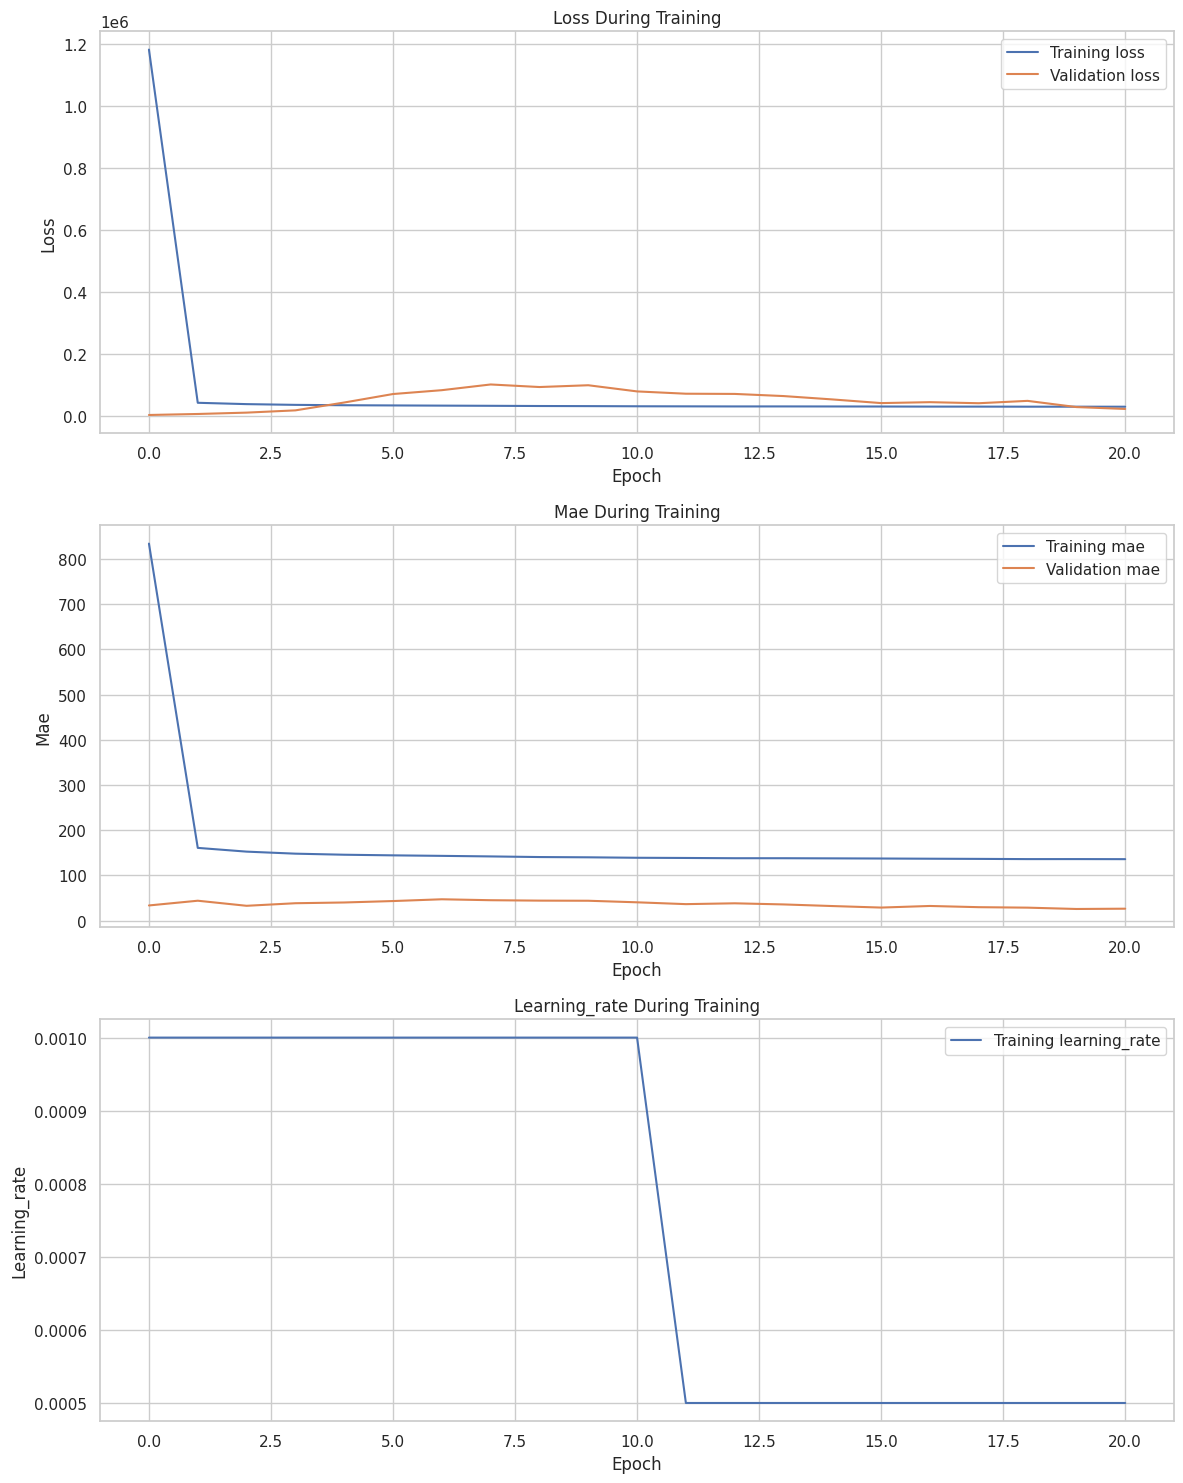

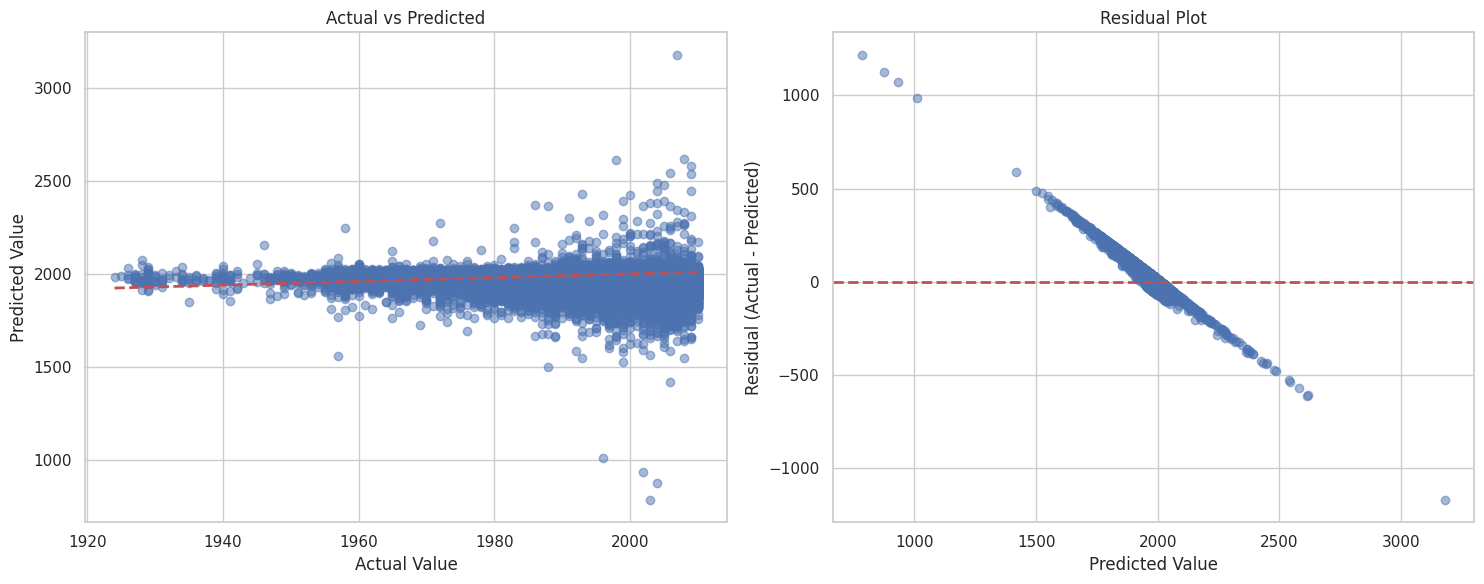

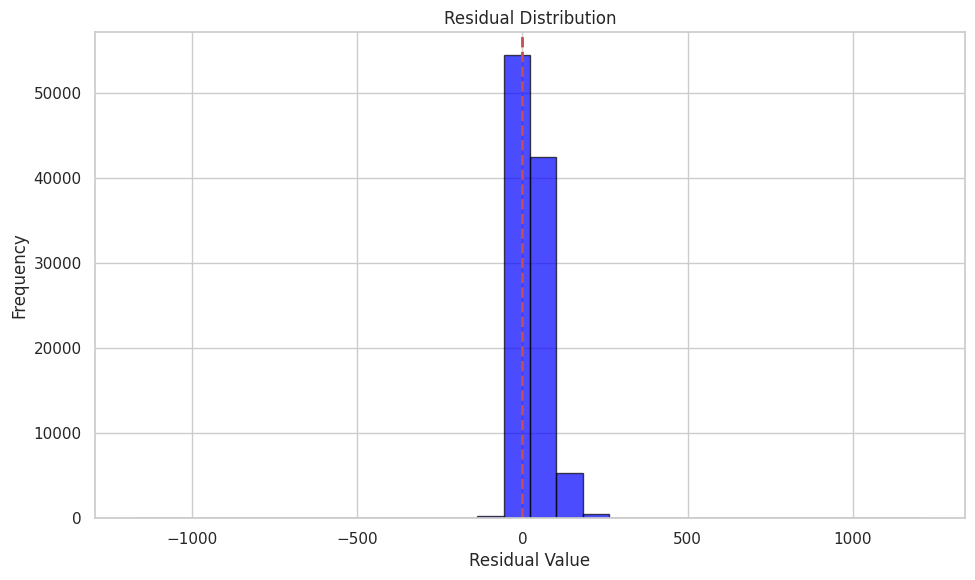

In [50]:
# Atur arsitektur model berdasarkan data
input_dim = model_info['input_dim']
output_dim = model_info['output_dim']
output_activation = model_info['output_activation']
problem_type = model_info['problem_type']

# Strategi untuk desain architecture: semakin dalam, semakin sedikit neuron
# Jumlah neuron dalam hidden layer pertama seringkali 2x input_dim atau sqrt(input_dim * output_dim)
first_layer_size = min(512, max(128, 2 * input_dim))

# Architecture: pyramid structure
hidden_layers = [
    first_layer_size,
    first_layer_size // 2,
    first_layer_size // 4
]

print(f"Model Architecture Design:")
print(f"  Input dimension: {input_dim}")
print(f"  Output dimension: {output_dim}")
print(f"  Hidden layers: {hidden_layers}")
print(f"  Output activation: {output_activation}")

# Hyperparameters untuk model
l1_reg = 0.0
l2_reg = 0.001  # L2 regularization untuk mencegah overfitting
dropout_rate = 0.2  # Dropout rate untuk mencegah overfitting
batch_norm = True  # Batch normalization untuk stabilitas training
activation = 'relu'  # Activation function untuk hidden layers

# Hyperparameters untuk training
batch_size = 32  # Ukuran batch
max_epochs = 100  # Maksimum epochs
learning_rate = 0.001  # Initial learning rate

# Metrics berdasarkan problem type
if problem_type == 'regression':
    metrics = ['mae']
    loss = 'mse'
    monitor = 'val_loss'
    mode = 'min'
else:  # classification
    metrics = ['accuracy']
    if output_dim == 1:  # Binary classification
        loss = 'binary_crossentropy'
    else:  # Multi-class classification
        loss = 'categorical_crossentropy'
    monitor = 'val_accuracy'
    mode = 'max'

# Cek GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"\nDitemukan {len(gpus)} GPU: {gpus}")
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth diaktifkan")
    except RuntimeError as e:
        print(f"Error setting memory growth: {e}")
else:
    print("\nTidak ada GPU ditemukan, menggunakan CPU")

# Build model
keras_model = build_keras_mlp(
    input_dim=input_dim,
    output_dim=output_dim,
    output_activation=output_activation,
    hidden_layers=hidden_layers,
    activation=activation,
    dropout_rate=dropout_rate,
    batch_norm=batch_norm,
    l1_reg=l1_reg,
    l2_reg=l2_reg
)

# Compile model
keras_model = compile_and_print_model(
    model=keras_model,
    loss=loss,
    metrics=metrics,
    optimizer='adam',
    lr=learning_rate
)

# Setup callbacks
callbacks = setup_callbacks(
    checkpoint_path='keras_model_checkpoint.h5',
    patience_early_stopping=20,
    patience_reduce_lr=10,
    min_delta=0.001,
    monitor=monitor,
    mode=mode,
    use_tensorboard=False
)

# Train and evaluate model
keras_model, keras_history, keras_evaluation = train_and_evaluate_keras_model(
    model=keras_model,
    X_train=X_train_keras,
    y_train=y_train_keras,
    X_val=X_val_keras,
    y_val=y_val_keras,
    X_test=X_test_keras,
    y_test=y_test_keras,
    problem_type=problem_type,
    batch_size=batch_size,
    epochs=max_epochs,
    callbacks=callbacks,
    verbose=1
)

# Visualize training history
plot_training_history(keras_history)

# Visualize results
if problem_type == 'regression':
    plot_regression_results(y_test_keras, keras_evaluation['y_pred'])
else:  # classification
    if 'n_classes' in model_info:
        class_names = [str(i) for i in range(model_info['n_classes'])]
    else:
        class_names = None
    plot_classification_results(y_test_keras, keras_evaluation['y_pred'], class_names=class_names)

## 7. Hyperparameter Tuning (Opsional)

Untuk meningkatkan performa model, kita bisa melakukan hyperparameter tuning. Di bawah ini adalah pendekatan sederhana dengan grid search untuk beberapa hyperparameter penting.

In [51]:
# Hyperparameter Tuning sederhana
# Untuk implementasi lengkap, bisa menggunakan Keras Tuner atau GridSearchCV

def simple_hyperparameter_tuning(X_train, y_train, X_val, y_val, problem_type,
                                learning_rates=[0.01, 0.001, 0.0001],
                                batch_sizes=[16, 32, 64],
                                dropout_rates=[0.1, 0.2, 0.3],
                                l2_regs=[0.0, 0.001, 0.01],
                                verbose=0):
    """
    Melakukan hyperparameter tuning sederhana.

    Parameters:
    -----------
    X_train, y_train : numpy.ndarray
        Data training
    X_val, y_val : numpy.ndarray
        Data validasi
    problem_type : str
        'regression' atau 'classification'
    learning_rates : list
        List learning rates untuk di-coba
    batch_sizes : list
        List batch sizes untuk di-coba
    dropout_rates : list
        List dropout rates untuk di-coba
    l2_regs : list
        List L2 regularization strengths untuk di-coba
    verbose : int
        Level verbosity

    Returns:
    --------
    best_params : dict
        Parameter terbaik
    best_val_score : float
        Score validasi terbaik
    results : list
        List hasil untuk semua kombinasi parameter
    """
    input_dim = X_train.shape[1]

    if problem_type == 'regression':
        output_dim = 1
        output_activation = 'linear'
        loss = 'mse'
        metrics = ['mae']
        monitor = 'val_loss'
        mode = 'min'
        best_val_score = float('inf')  # Lower is better for regression
    else:  # classification
        if y_train.shape[1] > 1:  # Multi-class
            output_dim = y_train.shape[1]
            output_activation = 'softmax'
            loss = 'categorical_crossentropy'
        else:  # Binary
            output_dim = 1
            output_activation = 'sigmoid'
            loss = 'binary_crossentropy'
        metrics = ['accuracy']
        monitor = 'val_accuracy'
        mode = 'max'
        best_val_score = -float('inf')  # Higher is better for classification

    # Default architecture
    first_layer_size = min(512, max(128, 2 * input_dim))
    hidden_layers = [first_layer_size, first_layer_size // 2, first_layer_size // 4]
    activation = 'relu'
    batch_norm = True

    # Menyimpan hasil untuk semua kombinasi parameter
    results = []
    best_params = None

    # Loop melalui semua kombinasi parameter
    for lr in learning_rates:
        for batch_size in batch_sizes:
            for dropout_rate in dropout_rates:
                for l2_reg in l2_regs:
                    print(f"Coba: lr={lr}, batch_size={batch_size}, dropout={dropout_rate}, l2={l2_reg}")

                    # Build dan kompilasi model
                    model = build_keras_mlp(
                        input_dim=input_dim,
                        output_dim=output_dim,
                        output_activation=output_activation,
                        hidden_layers=hidden_layers,
                        activation=activation,
                        dropout_rate=dropout_rate,
                        batch_norm=batch_norm,
                        l1_reg=0.0,  # Tidak menggunakan L1 regularization
                        l2_reg=l2_reg
                    )

                    # Kompilasi
                    opt = Adam(learning_rate=lr)
                    model.compile(optimizer=opt, loss=loss, metrics=metrics)

                    # Callbacks
                    early_stopping = EarlyStopping(
                        monitor=monitor,
                        patience=10,
                        min_delta=0.001,
                        mode=mode,
                        restore_best_weights=True,
                        verbose=0
                    )

                    # Training
                    history = model.fit(
                        X_train, y_train,
                        validation_data=(X_val, y_val),
                        batch_size=batch_size,
                        epochs=30,  # Reduced epochs untuk tuning
                        callbacks=[early_stopping],
                        verbose=verbose
                    )

                    # Evaluasi
                    val_score = None
                    if problem_type == 'regression':
                        val_loss = history.history['val_loss'][-1]
                        val_score = val_loss  # Lower is better
                    else:  # classification
                        val_acc = history.history['val_accuracy'][-1]
                        val_score = val_acc  # Higher is better

                    # Format nilai untuk print
                    if problem_type == 'regression':
                        score_format = f"{val_score:.6f}"
                    else:
                        score_format = f"{val_score:.2%}"

                    print(f"  Val Score: {score_format}")

                    # Simpan hasil
                    result = {
                        'lr': lr,
                        'batch_size': batch_size,
                        'dropout_rate': dropout_rate,
                        'l2_reg': l2_reg,
                        'val_score': val_score
                    }
                    results.append(result)

                    # Update best result
                    if problem_type == 'regression':
                        if val_score < best_val_score:
                            best_val_score = val_score
                            best_params = result.copy()
                    else:  # classification
                        if val_score > best_val_score:
                            best_val_score = val_score
                            best_params = result.copy()

    # Sort results
    if problem_type == 'regression':
        results.sort(key=lambda x: x['val_score'])  # Sort by val_score (lower is better)
    else:  # classification
        results.sort(key=lambda x: x['val_score'], reverse=True)  # Sort by val_score (higher is better)

    print("\nHasil Hyperparameter Tuning:")
    print(f"  Best parameters: {best_params}")
    if problem_type == 'regression':
        print(f"  Best validation score (val_loss): {best_val_score:.6f}")
    else:  # classification
        print(f"  Best validation score (val_accuracy): {best_val_score:.2%}")

    return best_params, best_val_score, results

# Commented out for example -- uncomment to run hyperparameter tuning
# # Run hyperparameter tuning
# best_params, best_val_score, tuning_results = simple_hyperparameter_tuning(
#     X_train=X_train_keras,
#     y_train=y_train_keras,
#     X_val=X_val_keras,
#     y_val=y_val_keras,
#     problem_type=problem_type,
#     learning_rates=[0.01, 0.001],
#     batch_sizes=[32, 64],
#     dropout_rates=[0.1, 0.2],
#     l2_regs=[0.0, 0.001],
#     verbose=0
# )

**Penjelasan Hyperparameter Tuning:**

Hyperparameter tuning adalah proses pencarian kombinasi hyperparameter optimal untuk model. Hyperparameter adalah parameter yang nilainya di-set sebelum proses learning, berbeda dengan parameter model yang dipelajari selama training.

Beberapa hyperparameter penting dalam deep learning:

1. **Learning Rate (lr)**:
   - Mengontrol seberapa besar update weight dalam setiap iterasi
   - Terlalu besar: konvergensi bisa tidak stabil atau divergen
   - Terlalu kecil: konvergensi lambat dan bisa terjebak di local minima
   - Range umum: 0.1, 0.01, 0.001, 0.0001

2. **Batch Size**:
   - Jumlah sampel yang digunakan dalam satu iterasi
   - Batch besar: estimasi gradient lebih stabil, tapi memerlukan memori lebih besar
   - Batch kecil: noise yang lebih besar, tapi bisa membantu escape dari local minima
   - Range umum: 16, 32, 64, 128, 256

3. **Dropout Rate**:
   - Probabilitas sebuah neuron dimatikan selama training
   - Terlalu tinggi: model bisa underfit
   - Terlalu rendah: kurang efektif mencegah overfitting
   - Range umum: 0.1, 0.2, 0.3, 0.4, 0.5

4. **L2 Regularization Strength (weight decay)**:
   - Mengontrol penalty pada weight yang besar
   - Terlalu tinggi: bisa menyebabkan underfit
   - Terlalu rendah: kurang efektif mencegah overfitting
   - Range umum: 0, 0.0001, 0.001, 0.01, 0.1

**Pendekatan untuk Hyperparameter Tuning:**

1. **Grid Search**: Mencoba semua kombinasi hyperparameter dalam grid yang ditentukan
   - Pro: Memeriksa seluruh search space
   - Con: Secara komputasional mahal, terutama untuk banyak hyperparameter

2. **Random Search**: Mencoba kombinasi hyperparameter secara acak
   - Pro: Lebih efisien dibanding grid search untuk banyak hyperparameter
   - Con: Bisa melewatkan kombinasi optimal

3. **Bayesian Optimization**: Mempelajari hubungan antara hyperparameter dan performa model
   - Pro: Lebih efisien, belajar dari trial sebelumnya
   - Con: Lebih kompleks diimplementasikan

Fungsi `simple_hyperparameter_tuning` menggunakan grid search sederhana, yang cocok untuk eksperimen kecil. Untuk dataset besar atau model kompleks, library seperti **Keras Tuner** atau **Optuna** lebih direkomendasikan.

## 8. Kesimpulan

Pada bagian ini, kita telah:

1. **Membangun Model Deep Learning dengan TensorFlow/Keras**:
   - Arsitektur Multi-Layer Perceptron (MLP) dengan hidden layers
   - Implementasi teknik regularisasi seperti L2 regularization, dropout, dan batch normalization
   - Optimasi dengan Adam optimizer

2. **Implementasi Teknik Training yang Robust**:
   - Early stopping untuk mencegah overfitting
   - Learning rate scheduling dengan ReduceLROnPlateau
   - Model checkpoint untuk menyimpan model terbaik

3. **Evaluasi Model dengan Berbagai Metrik**:
   - Untuk regresi: MSE, RMSE, MAE, R², Explained Variance
   - Untuk klasifikasi: Accuracy, Precision, Recall, F1 Score, ROC AUC

4. **Visualisasi Hasil**:
   - Training history untuk menganalisis proses learning
   - Actual vs predicted dan residual plots untuk regresi
   - Confusion matrix dan ROC curve untuk klasifikasi

5. **Hyperparameter Tuning (Opsional)**:
   - Pencarian kombinasi hyperparameter optimal
   - Evaluasi pengaruh learning rate, batch size, dropout rate, dan L2 regularization

Pada bagian selanjutnya, kita akan mengimplementasikan model dengan PyTorch sebagai alternatif, dan kemudian membandingkan performa kedua framework.

# End-to-End Deep Learning Pipeline untuk Regresi dan Klasifikasi

## Bagian 4: Model Building dan Training dengan PyTorch

Pada bagian ini, kita akan:
1. Membangun model deep learning dengan PyTorch
2. Menerapkan teknik regularisasi
3. Melatih model
4. Evaluasi model dengan metrik yang sesuai
5. Visualisasi hasil

In [52]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import time
import copy

# Set random seed untuk reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Set konfigurasi visualisasi
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Persiapan Data

Asumsikan bahwa data sudah dipersiapkan dari notebook bagian 2 (Feature Engineering dan Preprocessing):

In [53]:
# Menyiapkan variabel untuk data yang sudah diproses dari bagian sebelumnya
# Pada notebook real, data ini akan diambil dari bagian preprocessing

# Untuk ilustrasi, berikut adalah struktur data yang diharapkan:
# X_train_torch - torch.Tensor of shape (n_samples, n_features)
# X_val_torch - torch.Tensor of shape (n_samples, n_features)
# X_test_torch - torch.Tensor of shape (n_samples, n_features)
# Untuk masalah klasifikasi biner:
#   y_train_torch - torch.Tensor of shape (n_samples, 1) dengan nilai 0 atau 1
#   y_val_torch - torch.Tensor of shape (n_samples, 1) dengan nilai 0 atau 1
#   y_test_torch - torch.Tensor of shape (n_samples, 1) dengan nilai 0 atau 1
# Untuk masalah klasifikasi multi-kelas:
#   y_train_torch - torch.Tensor of shape (n_samples,) dengan nilai class index
#   y_val_torch - torch.Tensor of shape (n_samples,) dengan nilai class index
#   y_test_torch - torch.Tensor of shape (n_samples,) dengan nilai class index
# Untuk masalah regresi:
#   y_train_torch - torch.Tensor of shape (n_samples, 1) dengan nilai kontinyu
#   y_val_torch - torch.Tensor of shape (n_samples, 1) dengan nilai kontinyu
#   y_test_torch - torch.Tensor of shape (n_samples, 1) dengan nilai kontinyu

# Definisikan model_info berdasarkan hasil preprocessing
model_info = {
    'problem_type': 'regression',  # atau 'classification' (akan ditimpa dengan data actual)
    'input_dim': X_train_torch.shape[1],
    'n_samples_train': X_train_torch.shape[0],
    'n_samples_val': X_val_torch.shape[0],
    'n_samples_test': X_test_torch.shape[0]
}

# Menentukan output_dim dan activation berdasarkan problem_type
if model_info['problem_type'] == 'classification':
    if len(y_train_torch.shape) == 1 or y_train_torch.shape[1] == 1:  # Class indices atau binary
        if torch.max(y_train_torch).item() > 1:  # Multi-class
            model_info['n_classes'] = int(torch.max(y_train_torch).item()) + 1
            model_info['output_dim'] = model_info['n_classes']
            model_info['output_activation'] = 'softmax'
            model_info['loss_function'] = 'cross_entropy'
        else:  # Binary classification
            model_info['n_classes'] = 2
            model_info['output_dim'] = 1
            model_info['output_activation'] = 'sigmoid'
            model_info['loss_function'] = 'binary_cross_entropy'
    else:  # One-hot encoded
        model_info['n_classes'] = y_train_torch.shape[1]
        model_info['output_dim'] = y_train_torch.shape[1]
        model_info['output_activation'] = 'softmax'
        model_info['loss_function'] = 'cross_entropy'
else:  # Regression
    model_info['output_dim'] = 1
    model_info['output_activation'] = 'identity'  # Identity = no activation
    model_info['loss_function'] = 'mse'

print("Informasi Model:")
for key, value in model_info.items():
    print(f"  {key}: {value}")

print("\nShape Data:")
print(f"  X_train_torch: {X_train_torch.shape}")
print(f"  y_train_torch: {y_train_torch.shape}")
print(f"  X_val_torch: {X_val_torch.shape}")
print(f"  y_val_torch: {y_val_torch.shape}")
print(f"  X_test_torch: {X_test_torch.shape}")
print(f"  y_test_torch: {y_test_torch.shape}")

# Buat DataLoader untuk efisiensi training
batch_size = 32

train_dataset = TensorDataset(X_train_torch, y_train_torch)
val_dataset = TensorDataset(X_val_torch, y_val_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Cek device yang tersedia
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"\nDevice yang digunakan: {device}")

Informasi Model:
  problem_type: regression
  input_dim: 48
  n_samples_train: 329820
  n_samples_val: 82456
  n_samples_test: 103069
  output_dim: 1
  output_activation: identity
  loss_function: mse

Shape Data:
  X_train_torch: torch.Size([329820, 48])
  y_train_torch: torch.Size([329820, 1])
  X_val_torch: torch.Size([82456, 48])
  y_val_torch: torch.Size([82456, 1])
  X_test_torch: torch.Size([103069, 48])
  y_test_torch: torch.Size([103069, 1])

Device yang digunakan: cuda:0


**Penjelasan DataLoader PyTorch:**

PyTorch `DataLoader` adalah komponen penting untuk mengelola data training secara efisien. Beberapa keuntungan menggunakan `DataLoader`:

1. **Batching**: Memungkinkan pembagian data menjadi batch untuk training yang lebih efisien
2. **Shuffling**: Mengacak data untuk menghindari bias urutan
3. **Paralelisasi**: Memungkinkan loading data secara paralel dengan multiple workers
4. **Memory Efficiency**: Memuat data secara berurutan, bukan sekaligus, menghemat memori

Langkah-langkah penggunaan DataLoader:
1. Buat `TensorDataset` dari tensor input dan target
2. Buat `DataLoader` dari dataset, tentukan batch size dan opsi lainnya
3. Iterasi `DataLoader` selama training untuk mendapatkan batch data

**Device Management:**

PyTorch menyediakan dukungan untuk training pada GPU menggunakan CUDA. Fungsi `torch.device()` membantu mendeteksi perangkat yang tersedia (GPU atau CPU). Ini memungkinkan kode yang sama berjalan di berbagai perangkat tanpa modifikasi besar.

## 2. Arsitektur Model PyTorch

Kita akan membuat kelas model MLP untuk regresi dan klasifikasi menggunakan PyTorch.

In [54]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_layers=[128, 64, 32],
                activation='relu', dropout_rate=0.2, batch_norm=True, output_activation=None):
        """
        MLP (Multi-Layer Perceptron) model for regression or classification.

        Parameters:
        -----------
        input_dim : int
            Dimensi input (jumlah fitur)
        output_dim : int
            Dimensi output (1 untuk regresi atau binary classfication, n_classes untuk multi-class)
        hidden_layers : list
            List jumlah neuron di setiap hidden layer
        activation : str
            Fungsi aktivasi untuk hidden layers ('relu', 'tanh', 'sigmoid', 'leaky_relu')
        dropout_rate : float
            Dropout rate (0-1)
        batch_norm : bool
            Apakah menggunakan batch normalization
        output_activation : str or None
            Fungsi aktivasi untuk output layer ('softmax', 'sigmoid', atau None)
        """
        super(MLP, self).__init__()

        # Simpan parameter
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_layers = hidden_layers
        self.output_activation = output_activation

        # Tentukan fungsi aktivasi untuk hidden layers
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif activation == 'leaky_relu':
            self.activation = nn.LeakyReLU(0.1)
        else:
            raise ValueError(f"Activation function {activation} not supported")

        # Build model
        layers = []
        prev_dim = input_dim

        # Hidden layers
        for i, dim in enumerate(hidden_layers):
            # Linear layer
            layers.append(nn.Linear(prev_dim, dim))

            # Batch normalization (sebelum aktivasi)
            if batch_norm:
                layers.append(nn.BatchNorm1d(dim))

            # Activation
            layers.append(self.activation)

            # Dropout
            if dropout_rate > 0:
                layers.append(nn.Dropout(dropout_rate))

            prev_dim = dim

        # Output layer
        layers.append(nn.Linear(prev_dim, output_dim))

        # Combine layers
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        """
        Forward pass.

        Parameters:
        -----------
        x : torch.Tensor
            Input tensor

        Returns:
        --------
        torch.Tensor
            Output tensor
        """
        x = self.model(x)

        # Apply output activation if specified
        if self.output_activation == 'softmax':
            x = F.softmax(x, dim=1)
        elif self.output_activation == 'sigmoid':
            x = torch.sigmoid(x)

        return x

    def summary(self):
        """
        Print model summary.
        """
        print("Model Summary:")
        print(self)
        print(f"\nInput dimension: {self.input_dim}")
        print(f"Output dimension: {self.output_dim}")
        print(f"Hidden layers: {self.hidden_layers}")
        print(f"Output activation: {self.output_activation}")

        # Count parameters
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"\nTotal parameters: {total_params:,}")
        print(f"Trainable parameters: {trainable_params:,}")

**Penjelasan Arsitektur Model PyTorch:**

Dalam PyTorch, model didefinisikan sebagai subclass dari `nn.Module`. Beberapa komponen kunci dari kelas `MLP` kita:

1. **`__init__`**: Mendefinisikan arsitektur model
   - Membangun layers secara dinamis berdasarkan parameter
   - Menggunakan `nn.Sequential` untuk menggabungkan layers

2. **`forward`**: Mendefinisikan forward pass (inferensi)
   - Input mengalir melalui network
   - Menerapkan aktivasi output sesuai kebutuhan

3. **Components**:
   - **Linear Layers** (`nn.Linear`): Menerapkan transformasi linear $y = xW^T + b$
   - **Batch Normalization** (`nn.BatchNorm1d`): Normalisasi batch input
   - **Activation Functions**: ReLU, tanh, sigmoid, atau LeakyReLU
   - **Dropout** (`nn.Dropout`): Mematikan neuron secara acak selama training untuk mengurangi overfitting

4. **Output Activations**:
   - **Softmax**: Untuk multi-class classification, mengkonversi output menjadi probabilitas yang jumlahnya 1
     $$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{K} e^{x_j}}$$
   
   - **Sigmoid**: Untuk binary classification, mengkonversi output menjadi probabilitas antara 0 dan 1
     $$\text{sigmoid}(x) = \frac{1}{1 + e^{-x}}$$
   
   - **None (Linear)**: Untuk regression, tidak ada aktivasi tambahan di output layer

Berbeda dengan Keras yang kompilasi model dilakukan secara eksplisit, PyTorch memisahkan model, loss function, dan optimizer. Ini memberikan fleksibilitas lebih, terutama untuk arsitektur model yang kompleks atau custom training loops.

## 3. Fungsi untuk Training dan Evaluasi Model

In [55]:
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler=None,
               num_epochs=100, device='cpu', patience=20, min_delta=0.001):
    """
    Train model dengan early stopping.

    Parameters:
    -----------
    model : torch.nn.Module
        Model PyTorch
    train_loader : torch.utils.data.DataLoader
        DataLoader untuk data training
    val_loader : torch.utils.data.DataLoader
        DataLoader untuk data validasi
    criterion : torch.nn.modules.loss._Loss
        Loss function
    optimizer : torch.optim.Optimizer
        Optimizer
    scheduler : torch.optim.lr_scheduler._LRScheduler, optional
        Learning rate scheduler
    num_epochs : int
        Jumlah maksimum epoch
    device : torch.device
        Device untuk training (CPU atau GPU)
    patience : int
        Jumlah epoch tanpa improvement sebelum early stopping
    min_delta : float
        Perubahan minimum yang dianggap sebagai improvement

    Returns:
    --------
    model : torch.nn.Module
        Model yang sudah dilatih
    history : dict
        Dictionary berisi history training
    """
    # Untuk menyimpan history
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_metric': [],
        'val_metric': []
    }

    # Untuk menyimpan best model
    best_model_wts = copy.deepcopy(model.state_dict())
    best_val_loss = float('inf')
    no_improve_epochs = 0

    # Start time
    start_time = time.time()

    # Pindahkan model ke device
    model = model.to(device)

    # Tentukan apakah ini masalah klasifikasi
    is_classification = isinstance(criterion, (nn.CrossEntropyLoss, nn.BCELoss, nn.BCEWithLogitsLoss))

    # Training loop
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0  # for classification
        running_total = 0  # for classification

        for inputs, targets in train_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward
            with torch.set_grad_enabled(True):
                outputs = model(inputs)

                # Adjust outputs/targets for specific loss functions
                if isinstance(criterion, nn.CrossEntropyLoss):
                    loss = criterion(outputs, targets.long())
                    _, preds = torch.max(outputs, 1)
                    running_corrects += torch.sum(preds == targets.data).item()
                    running_total += targets.size(0)
                else:
                    loss = criterion(outputs, targets)
                    if is_classification and not isinstance(criterion, nn.CrossEntropyLoss):
                        # Binary classification
                        preds = (outputs > 0.5).float()
                        running_corrects += torch.sum(preds == targets.data).item()
                        running_total += targets.size(0)

                # Backward + optimize
                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(epoch_loss)

        if is_classification:
            epoch_acc = running_corrects / running_total
            history['train_metric'].append(epoch_acc)
            print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        else:
            history['train_metric'].append(epoch_loss)  # For regression, metric is loss
            print(f'Train Loss: {epoch_loss:.4f}')

        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        running_total = 0

        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs = inputs.to(device)
                targets = targets.to(device)

                # Forward
                outputs = model(inputs)

                # Loss
                if isinstance(criterion, nn.CrossEntropyLoss):
                    loss = criterion(outputs, targets.long())
                    _, preds = torch.max(outputs, 1)
                    running_corrects += torch.sum(preds == targets.data).item()
                    running_total += targets.size(0)
                else:
                    loss = criterion(outputs, targets)
                    if is_classification and not isinstance(criterion, nn.CrossEntropyLoss):
                        # Binary classification
                        preds = (outputs > 0.5).float()
                        running_corrects += torch.sum(preds == targets.data).item()
                        running_total += targets.size(0)

                running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(val_loader.dataset)
        history['val_loss'].append(epoch_loss)

        if is_classification:
            epoch_acc = running_corrects / running_total
            history['val_metric'].append(epoch_acc)
            print(f'Val Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        else:
            history['val_metric'].append(epoch_loss)  # For regression, metric is loss
            print(f'Val Loss: {epoch_loss:.4f}')

        # Scheduler step
        if scheduler is not None:
            scheduler.step(epoch_loss)  # Assume ReduceLROnPlateau

        # Check improvement
        if epoch_loss < best_val_loss - min_delta:
            print(f'Validation loss decreased ({best_val_loss:.4f} --> {epoch_loss:.4f}). Saving model...')
            best_val_loss = epoch_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            no_improve_epochs = 0
        else:
            no_improve_epochs += 1
            print(f'No improvement in validation loss for {no_improve_epochs} epochs')
            if no_improve_epochs >= patience:
                print(f'Early stopping triggered after {epoch+1} epochs')
                break

        print()

    # Training time
    time_elapsed = time.time() - start_time
    print(f'Training completed in {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s')
    print(f'Best val loss: {best_val_loss:.4f}')

    # Load best model
    model.load_state_dict(best_model_wts)

    return model, history

def evaluate_model(model, test_loader, criterion, device, problem_type):
    """
    Evaluasi model dengan data test.

    Parameters:
    -----------
    model : torch.nn.Module
        Model PyTorch
    test_loader : torch.utils.data.DataLoader
        DataLoader untuk data test
    criterion : torch.nn.modules.loss._Loss
        Loss function
    device : torch.device
        Device untuk evaluasi
    problem_type : str
        'regression' atau 'classification'

    Returns:
    --------
    evaluation : dict
        Dictionary berisi metrik evaluasi
    """
    model.eval()

    # Untuk menyimpan prediksi dan target
    all_outputs = []
    all_targets = []
    running_loss = 0.0

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            # Forward
            outputs = model(inputs)

            # Loss
            if isinstance(criterion, nn.CrossEntropyLoss):
                loss = criterion(outputs, targets.long())
            else:
                loss = criterion(outputs, targets)

            running_loss += loss.item() * inputs.size(0)

            # Save outputs and targets
            all_outputs.append(outputs.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

    # Combine outputs and targets
    y_pred = np.vstack(all_outputs)
    y_true = np.vstack(all_targets)

    # Calculate test loss
    test_loss = running_loss / len(test_loader.dataset)

    # Evaluation dictionary
    evaluation = {'test_loss': test_loss}

    if problem_type == 'regression':
        # Metrik regresi
        evaluation['mse'] = mean_squared_error(y_true, y_pred)
        evaluation['rmse'] = np.sqrt(evaluation['mse'])
        evaluation['mae'] = mean_absolute_error(y_true, y_pred)
        evaluation['r2'] = r2_score(y_true, y_pred)
        evaluation['explained_variance'] = explained_variance_score(y_true, y_pred)

        print("\nEvaluasi Model (Regression):")
        print(f"  Test Loss: {test_loss:.6f}")
        print(f"  Mean Squared Error (MSE): {evaluation['mse']:.6f}")
        print(f"  Root Mean Squared Error (RMSE): {evaluation['rmse']:.6f}")
        print(f"  Mean Absolute Error (MAE): {evaluation['mae']:.6f}")
        print(f"  R-squared (R²): {evaluation['r2']:.6f}")
        print(f"  Explained Variance: {evaluation['explained_variance']:.6f}")

    else:  # classification
        if isinstance(criterion, nn.CrossEntropyLoss):  # Multi-class
            # Convert outputs to class predictions
            y_pred_class = np.argmax(y_pred, axis=1)
            y_true_class = y_true.flatten()

            # Metrik multi-class
            evaluation['accuracy'] = accuracy_score(y_true_class, y_pred_class)
            evaluation['precision'] = precision_score(y_true_class, y_pred_class, average='weighted')
            evaluation['recall'] = recall_score(y_true_class, y_pred_class, average='weighted')
            evaluation['f1'] = f1_score(y_true_class, y_pred_class, average='weighted')

            # One-hot encode for ROC AUC
            n_classes = y_pred.shape[1]
            y_true_onehot = np.zeros((y_true.size, n_classes))
            y_true_onehot[np.arange(y_true.size), y_true_class.astype(int)] = 1

            try:
                evaluation['roc_auc'] = roc_auc_score(y_true_onehot, y_pred, multi_class='ovr')
            except ValueError:
                evaluation['roc_auc'] = None

            # Confusion Matrix
            evaluation['confusion_matrix'] = confusion_matrix(y_true_class, y_pred_class)

        else:  # Binary classification
            # Convert outputs to class predictions (threshold 0.5)
            y_pred_class = (y_pred > 0.5).astype(int)

            # Metrik binary
            evaluation['accuracy'] = accuracy_score(y_true, y_pred_class)
            evaluation['precision'] = precision_score(y_true, y_pred_class)
            evaluation['recall'] = recall_score(y_true, y_pred_class)
            evaluation['f1'] = f1_score(y_true, y_pred_class)

            try:
                evaluation['roc_auc'] = roc_auc_score(y_true, y_pred)
            except ValueError:
                evaluation['roc_auc'] = None

            # Confusion Matrix
            evaluation['confusion_matrix'] = confusion_matrix(y_true, y_pred_class)

        print("\nEvaluasi Model (Classification):")
        print(f"  Test Loss: {test_loss:.6f}")
        print(f"  Accuracy: {evaluation['accuracy']:.6f}")
        print(f"  Precision: {evaluation['precision']:.6f}")
        print(f"  Recall: {evaluation['recall']:.6f}")
        print(f"  F1 Score: {evaluation['f1']:.6f}")
        if evaluation['roc_auc'] is not None:
            print(f"  ROC AUC: {evaluation['roc_auc']:.6f}")
        print("\nConfusion Matrix:")
        print(evaluation['confusion_matrix'])

    # Save predictions and targets for visualization
    evaluation['y_pred'] = y_pred
    evaluation['y_true'] = y_true

    return evaluation

**Penjelasan Training dan Evaluasi Model PyTorch:**

Fungsi `train_model` dan `evaluate_model` mengimplementasikan training dan evaluasi model PyTorch. Beberapa komponen penting:

1. **Training Loop**:
   - Model dilatih per batch dari DataLoader
   - Setiap epoch terdiri dari fase training dan validasi
   - Menggunakan `model.train()` dan `model.eval()` untuk mengubah mode model

2. **Optimizer Step**:
   - `optimizer.zero_grad()`: Reset gradients dari iterasi sebelumnya
   - `loss.backward()`: Backpropagation untuk menghitung gradients
   - `optimizer.step()`: Update parameters berdasarkan gradients

3. **Early Stopping**:
   - Menghentikan training jika tidak ada improvement pada validation loss
   - Menyimpan model terbaik berdasarkan validation loss

4. **Learning Rate Scheduler**:
   - Mengurangi learning rate ketika performa tidak membaik
   - Menggunakan `scheduler.step()` setelah setiap epoch

5. **Evaluasi**:
   - Menghitung berbagai metrik berdasarkan tipe masalah
   - Untuk regresi: MSE, RMSE, MAE, R², Explained Variance
   - Untuk klasifikasi: Accuracy, Precision, Recall, F1, ROC AUC, Confusion Matrix

**Context Manager `torch.no_grad()`**:

Context manager `torch.no_grad()` digunakan selama evaluasi untuk menandakan bahwa tidak perlu menghitung gradients, yang membuat proses lebih efisien dan menggunakan memori lebih sedikit. Ini adalah salah satu fitur yang membuat PyTorch sangat fleksibel, memungkinkan kontrol yang halus atas proses training.

## 4. Fungsi untuk Visualisasi Hasil

In [56]:
def plot_training_history_pytorch(history):
    """
    Visualisasikan history training PyTorch.

    Parameters:
    -----------
    history : dict
        Dictionary berisi history training
    """
    # Plot loss
    plt.figure(figsize=(12, 10))

    # Training & validation loss
    plt.subplot(2, 1, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Training & validation metric
    plt.subplot(2, 1, 2)
    plt.plot(history['train_metric'], label='Train Metric')
    plt.plot(history['val_metric'], label='Validation Metric')
    plt.title('Metric During Training (Accuracy or Loss)')
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_regression_results_pytorch(y_true, y_pred):
    """
    Visualisasikan hasil regresi model PyTorch.

    Parameters:
    -----------
    y_true : numpy.ndarray
        Target actual
    y_pred : numpy.ndarray
        Prediksi model
    """
    # Flatten arrays if needed
    if len(y_true.shape) > 1:
        y_true = y_true.flatten()
    if len(y_pred.shape) > 1:
        y_pred = y_pred.flatten()

    plt.figure(figsize=(15, 6))

    # Plot scatter actual vs predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.grid(True)

    # Plot residuals
    residuals = y_true - y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.title('Residual Plot')
    plt.xlabel('Predicted Value')
    plt.ylabel('Residual (Actual - Predicted)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Residual distribution
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(x=0, color='r', linestyle='--', lw=2)
    plt.title('Residual Distribution')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def plot_classification_results_pytorch(y_true, y_pred, class_names=None):
    """
    Visualisasikan hasil klasifikasi model PyTorch.

    Parameters:
    -----------
    y_true : numpy.ndarray
        Target actual
    y_pred : numpy.ndarray
        Prediksi model (probabilitas)
    class_names : list
        Nama kelas
    """
    # Convert to class predictions if needed
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:  # multi-class probabilities
        y_pred_class = np.argmax(y_pred, axis=1)

        if len(y_true.shape) == 1:  # already class indices
            y_true_class = y_true
        else:  # one-hot or probabilities
            y_true_class = np.argmax(y_true, axis=1)
    else:  # binary classification
        if len(y_pred.shape) > 1:  # shape (n, 1)
            y_pred = y_pred.flatten()
        if len(y_true.shape) > 1:  # shape (n, 1)
            y_true = y_true.flatten()

        y_pred_class = (y_pred > 0.5).astype(int)
        y_true_class = y_true.astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_true_class, y_pred_class)
    n_classes = cm.shape[0]

    # Normalize confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot confusion matrix
    plt.figure(figsize=(12, 10))

    # Confusion matrix (absolute)
    plt.subplot(2, 1, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix (Absolute)')
    if class_names:
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.xticks(np.arange(n_classes) + 0.5, class_names)
        plt.yticks(np.arange(n_classes) + 0.5, class_names)

    # Confusion matrix (normalized)
    plt.subplot(2, 1, 2)
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', vmin=0, vmax=1)
    plt.title('Confusion Matrix (Normalized)')
    if class_names:
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.xticks(np.arange(n_classes) + 0.5, class_names)
        plt.yticks(np.arange(n_classes) + 0.5, class_names)

    plt.tight_layout()
    plt.show()

    # ROC Curve for binary classification
    if n_classes == 2 and len(y_pred.shape) == 1:  # Binary classification with probability output
        from sklearn.metrics import roc_curve, auc
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

**Penjelasan Fungsi Visualisasi:**

Fungsi-fungsi visualisasi membantu menginterpretasikan hasil model secara visual:

1. **`plot_training_history_pytorch`**: Memvisualisasikan proses training
   - Menampilkan kurva loss dan metrik (accuracy atau loss)
   - Membandingkan performa pada training set dan validation set
   - Membantu mengidentifikasi overfitting atau underfitting

2. **`plot_regression_results_pytorch`**: Memvisualisasikan hasil regresi
   - **Actual vs Predicted Plot**: Menampilkan hubungan antara nilai actual dan prediksi
   - **Residual Plot**: Menampilkan residual (actual - predicted) terhadap nilai prediksi
   - **Residual Distribution**: Histogram residual untuk melihat distribusinya

3. **`plot_classification_results_pytorch`**: Memvisualisasikan hasil klasifikasi
   - **Confusion Matrix**: Menampilkan prediksi vs label actual
   - **ROC Curve**: Untuk binary classification, menampilkan trade-off antara True Positive Rate dan False Positive Rate

Visualisasi ini membantu dalam:
- Mengevaluasi kualitas model
- Mengidentifikasi pola dalam kesalahan prediksi
- Menyesuaikan threshold untuk klasifikasi binary
- Memahami bias atau keterbatasan model

## 5. Implementasi Model untuk Regresi/Klasifikasi dengan PyTorch

Model Architecture Design:
  Input dimension: 48
  Output dimension: 1
  Hidden layers: [128, 64, 32]
  Output activation: identity
Model Summary:
MLP(
  (activation): ReLU()
  (model): Sequential(
    (0): Linear(in_features=48, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=32, out_features=1, bias=True)
  )
)

Input dimension: 48
Output dimension: 1
Hidden layers: [128, 64, 32]
Output activation: identity

Total parameters: 17

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100
----------
Train Loss: 1164556.6395
Val Loss: 2509.0769
Validation loss decreased (inf --> 2509.0769). Saving model...

Epoch 2/100
----------
Train Loss: 40627.8306
Val Loss: 7224.5177
No improvement in validation loss for 1 epochs

Epoch 3/100
----------
Train Loss: 37242.6649
Val Loss: 18043.1864
No improvement in validation loss for 2 epochs

Epoch 4/100
----------
Train Loss: 35583.4301
Val Loss: 28612.2646
No improvement in validation loss for 3 epochs

Epoch 5/100
----------
Train Loss: 34777.5484
Val Loss: 60367.0156
No improvement in validation loss for 4 epochs

Epoch 6/100
----------
Train Loss: 33717.7421
Val Loss: 343391.5284
No improvement in validation loss for 5 epochs

Epoch 7/100
----------
Train Loss: 33170.6984
Val Loss: 203852.4623
No improvement in validation loss for 6 epochs

Epoch 8/100
----------
Train Loss: 32642.0992
Val Loss: 264206.1206
No improvement in validation loss for 7 epochs

Epoch 9/100
----------
Train Loss: 31863.1954
Val Loss: 68069

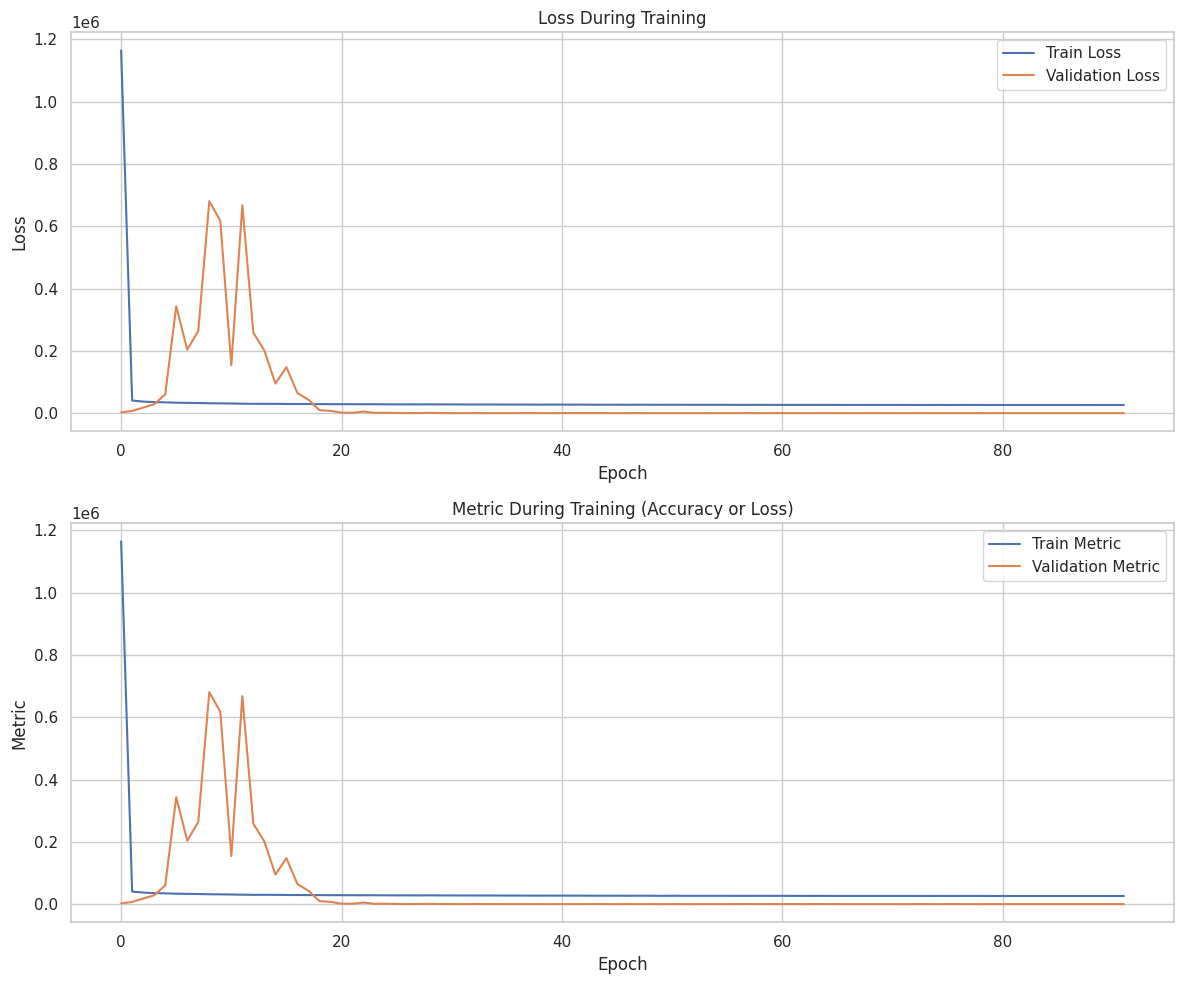

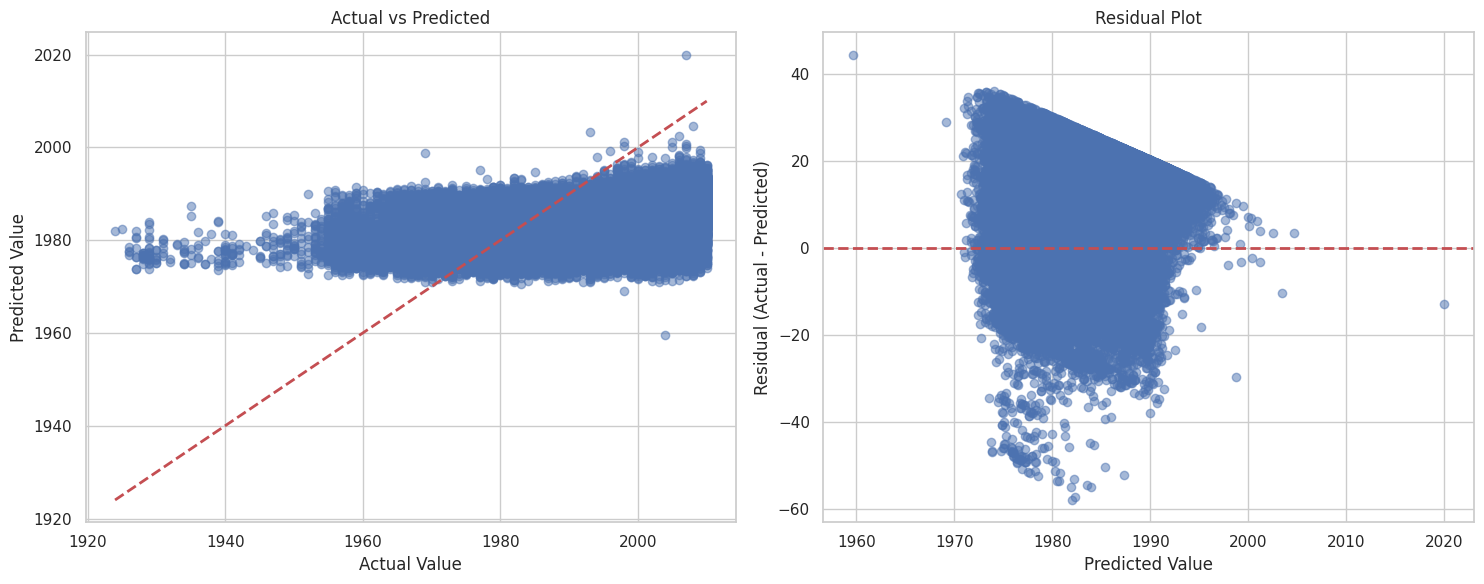

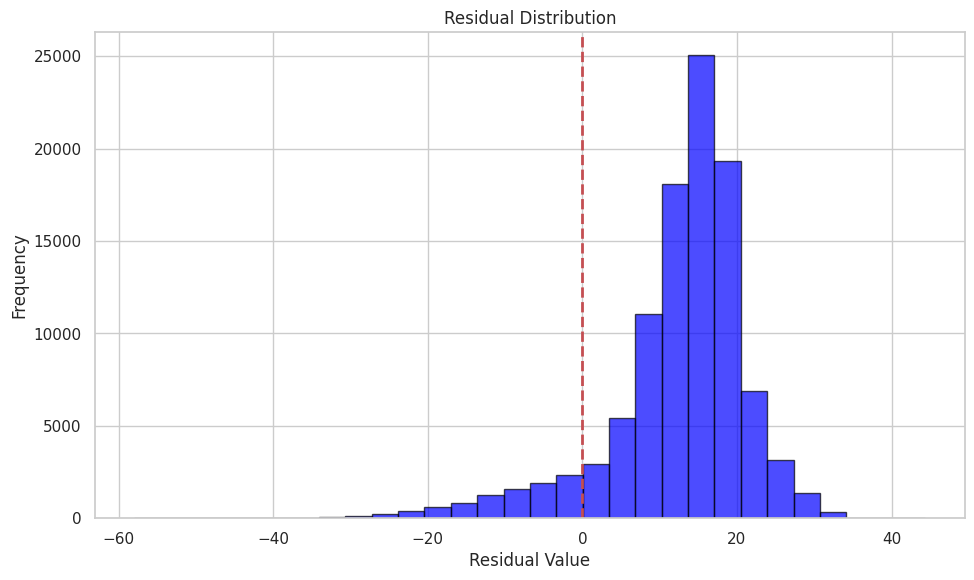

In [57]:
# Atur arsitektur model berdasarkan data
input_dim = model_info['input_dim']
output_dim = model_info['output_dim']
output_activation = model_info['output_activation']  # 'softmax', 'sigmoid', atau None
problem_type = model_info['problem_type']

# Strategi untuk desain architecture: semakin dalam, semakin sedikit neuron
# Jumlah neuron dalam hidden layer pertama seringkali 2x input_dim atau sqrt(input_dim * output_dim)
first_layer_size = min(512, max(128, 2 * input_dim))

# Architecture: pyramid structure
hidden_layers = [
    first_layer_size,
    first_layer_size // 2,
    first_layer_size // 4
]

print(f"Model Architecture Design:")
print(f"  Input dimension: {input_dim}")
print(f"  Output dimension: {output_dim}")
print(f"  Hidden layers: {hidden_layers}")
print(f"  Output activation: {output_activation}")

# Hyperparameters
dropout_rate = 0.2  # Dropout rate untuk mencegah overfitting
batch_norm = True  # Batch normalization untuk stabilitas training
activation = 'relu'  # Activation function untuk hidden layers

# Hyperparameters untuk training
batch_size = 32  # Sudah diatur di DataLoader
max_epochs = 100  # Maksimum epochs
learning_rate = 0.001  # Initial learning rate
weight_decay = 0.01  # L2 regularization

# Buat model
pytorch_model = MLP(
    input_dim=input_dim,
    output_dim=output_dim,
    hidden_layers=hidden_layers,
    activation=activation,
    dropout_rate=dropout_rate,
    batch_norm=batch_norm,
    output_activation=output_activation
)

# Print model summary
pytorch_model.summary()

# Tentukan loss function berdasarkan problem type
if problem_type == 'regression':
    criterion = nn.MSELoss()
else:  # classification
    if output_dim == 1:  # Binary classification
        criterion = nn.BCELoss()  # Assumes sigmoid output activation
    else:  # Multi-class classification
        criterion = nn.CrossEntropyLoss()  # Implicitly applies softmax

# Optimizer
optimizer = optim.Adam(pytorch_model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=10,
    min_lr=1e-6,
    verbose=True
)

# Train model
pytorch_model, pytorch_history = train_model(
    model=pytorch_model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=max_epochs,
    device=device,
    patience=20,
    min_delta=0.001
)

# Evaluate model
pytorch_evaluation = evaluate_model(
    model=pytorch_model,
    test_loader=test_loader,
    criterion=criterion,
    device=device,
    problem_type=problem_type
)

# Plot training history
plot_training_history_pytorch(pytorch_history)

# Plot evaluation results
if problem_type == 'regression':
    plot_regression_results_pytorch(pytorch_evaluation['y_true'], pytorch_evaluation['y_pred'])
else:  # classification
    if 'n_classes' in model_info:
        class_names = [str(i) for i in range(model_info['n_classes'])]
    else:
        class_names = None
    plot_classification_results_pytorch(pytorch_evaluation['y_true'], pytorch_evaluation['y_pred'], class_names=class_names)

**Penjelasan Implementasi PyTorch:**

Implementasi PyTorch memiliki beberapa perbedaan dari Keras, meskipun konsep dasar machine learningnya sama:

1. **Model Definisi**:
   - PyTorch mendefinisikan model sebagai subclass dari `nn.Module`
   - Definisi arsitektur dilakukan dalam `__init__`
   - Flow data didefinisikan dalam `forward`

2. **Loss Function**:
   - `nn.MSELoss()`: Mean Squared Error untuk regresi
   - `nn.BCELoss()`: Binary Cross Entropy untuk binary classification
   - `nn.CrossEntropyLoss()`: Cross Entropy untuk multi-class (includes softmax)

3. **Optimizer**:
   - `optim.Adam`: Adaptive Moment Estimation
   - `weight_decay`: Parameter untuk L2 regularization

4. **Learning Rate Scheduler**:
   - `ReduceLROnPlateau`: Mengurangi learning rate ketika metrik tidak membaik
   - Sama seperti ReduceLROnPlateau di Keras, tetapi dengan API berbeda

5. **Training Loop**:
   - PyTorch mengharuskan penulisan explicit training loop
   - Memberikan fleksibilitas lebih dalam kontrol proses training
   - Memisahkan forward pass, backward pass, dan step optimizer

6. **Device Management**:
   - PyTorch mengharuskan explicit movement model dan data ke device (CPU/GPU)
   - Menggunakan `torch.device()` untuk mengidentifikasi device yang tersedia
   - Menggunakan `.to(device)` untuk memindahkan tensor dan model

7. **DataLoader**:
   - Menyediakan interface untuk batch loading dan shuffling
   - Lebih explicit dibandingkan passing batch_size di Keras

8. **Early Stopping**:
   - Tidak built-in seperti di Keras
   - Implementasi manual dalam training loop

PyTorch umumnya memberikan lebih banyak kontrol dan fleksibilitas daripada Keras, tetapi dengan cost kompleksitas kode yang lebih tinggi.

## 6. Menyimpan dan Loading Model

In [58]:
# Menyimpan model PyTorch
def save_pytorch_model(model, filepath, input_dim, output_dim, problem_type):
    """
    Menyimpan model PyTorch beserta metadata penting.

    Parameters:
    -----------
    model : torch.nn.Module
        Model PyTorch
    filepath : str
        Path tempat menyimpan model
    input_dim : int
        Dimensi input
    output_dim : int
        Dimensi output
    problem_type : str
        'regression' atau 'classification'
    """
    # Model state dict
    state_dict = model.state_dict()

    # Model metadata
    metadata = {
        'input_dim': input_dim,
        'output_dim': output_dim,
        'problem_type': problem_type,
        'hidden_layers': model.hidden_layers if hasattr(model, 'hidden_layers') else None,
        'output_activation': model.output_activation if hasattr(model, 'output_activation') else None
    }

    # Save
    torch.save({
        'state_dict': state_dict,
        'metadata': metadata
    }, filepath)

    print(f"Model saved to {filepath}")

# Loading model PyTorch
def load_pytorch_model(filepath, device='cpu'):
    """
    Load model PyTorch dari file.

    Parameters:
    -----------
    filepath : str
        Path file model
    device : torch.device
        Device untuk model

    Returns:
    --------
    model : torch.nn.Module
        Model PyTorch
    metadata : dict
        Metadata model
    """
    # Load checkpoint
    checkpoint = torch.load(filepath, map_location=device)

    # Extract metadata
    metadata = checkpoint['metadata']

    # Create model
    model = MLP(
        input_dim=metadata['input_dim'],
        output_dim=metadata['output_dim'],
        hidden_layers=metadata['hidden_layers'] if metadata['hidden_layers'] else [128, 64, 32],
        output_activation=metadata['output_activation']
    )

    # Load state dict
    model.load_state_dict(checkpoint['state_dict'])

    # Set model to evaluation mode
    model.eval()

    # Move to device
    model = model.to(device)

    print(f"Model loaded from {filepath}")
    print(f"Model info: {metadata}")

    return model, metadata

# Save the PyTorch model
save_pytorch_model(
    model=pytorch_model,
    filepath='pytorch_model.pt',
    input_dim=input_dim,
    output_dim=output_dim,
    problem_type=problem_type
)

# Load the model back (for demonstration)
# loaded_model, loaded_metadata = load_pytorch_model('pytorch_model.pt', device=device)

Model saved to pytorch_model.pt


**Penjelasan Menyimpan dan Loading Model:**

Menyimpan model adalah langkah penting untuk deployment dan reusability. Pada PyTorch:

1. **Menyimpan Model**:
   - `torch.save()`: Menyimpan objek Python ke disk
   - Biasanya menyimpan `state_dict`, yang berisi parameter model (weights dan biases)
   - Juga menyimpan metadata untuk rekonstruksi arsitektur

2. **Loading Model**:
   - `torch.load()`: Memuat objek Python dari disk
   - Membuat instance model baru
   - Memuat weights dengan `load_state_dict()`
   - Mengubah mode model ke 'eval' untuk inference

3. **Device Management**:
   - Menggunakan `map_location` pada `torch.load()` untuk menentukan device
   - Memungkinkan model yang di-train pada GPU di-load pada CPU atau sebaliknya

4. **Metadata**:
   - Menyimpan informasi penting seperti dimensi input/output dan tipe masalah
   - Membantu rekonstruksi arsitektur dan inferensi yang benar

Perbedaan dengan Keras adalah bahwa PyTorch tidak menyimpan arsitektur model secara otomatis. Kita perlu menyimpan metadata yang cukup untuk merekonstruksi model, dan kemudian me-load weights ke dalam model yang direkonstruksi.

## 7. Kesimpulan

Pada bagian ini, kita telah:

1. **Membangun Model Deep Learning dengan PyTorch**:
   - Arsitektur Multi-Layer Perceptron (MLP) dengan `nn.Module`
   - Implementasi regularisasi seperti weight decay (L2 regularization), dropout, dan batch normalization
   - Optimasi dengan Adam optimizer

2. **Implementasi Teknik Training yang Robust**:
   - Custom training loop dengan early stopping
   - Learning rate scheduling dengan ReduceLROnPlateau
   - Handling untuk berbagai kasus loss function

3. **Evaluasi Model dengan Berbagai Metrik**:
   - Untuk regresi: MSE, RMSE, MAE, R², Explained Variance
   - Untuk klasifikasi: Accuracy, Precision, Recall, F1 Score, ROC AUC

4. **Visualisasi Hasil**:
   - Training history untuk menganalisis proses learning
   - Actual vs predicted dan residual plots untuk regresi
   - Confusion matrix dan ROC curve untuk klasifikasi

5. **Menyimpan dan Loading Model**:
   - Menyimpan model weights dan metadata
   - Loading model untuk inference atau lanjutan training

**Perbedaan Utama PyTorch vs TensorFlow/Keras**:

1. **Paradigma Programming**:
   - PyTorch: Dynamic computation graph (define-by-run)
   - TensorFlow: Static computation graph (define-then-run), meskipun TF 2.x lebih dinamis dengan eager execution

2. **Tingkat Abstraksi**:
   - PyTorch: Low-level, lebih granular control, explicit training loop
   - Keras: High-level, abstraksi yang lebih tinggi, fit() method

3. **Arsitektur Model**:
   - PyTorch: Subclassing `nn.Module`, implementasi `forward()`
   - Keras: Sequential API, Functional API, atau Model Subclassing

4. **Ekosistem**:
   - PyTorch: Populer dalam penelitian dan academia
   - TensorFlow: Ekosistem yang lebih luas, terutama untuk deployment (TFLite, TF Serving)

Pada bagian selanjutnya, kita akan membandingkan kedua model (TensorFlow dan PyTorch) dari segi performa dan kemudahan penggunaan.

# End-to-End Deep Learning Pipeline untuk Regresi dan Klasifikasi

## Bagian 5: Perbandingan Model dan Kesimpulan

Pada bagian ini, kita akan:
1. Membandingkan model TensorFlow dan PyTorch
2. Analisis metrik evaluasi secara mendalam
3. Feature importance analysis
4. Kesimpulan dan rekomendasi untuk pipeline end-to-end

In [59]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.inspection import permutation_importance
import time
import os

# Set konfigurasi visualisasi
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Load Model dan Evaluasi Hasil

Asumsikan bahwa kita sudah memiliki model TensorFlow dan PyTorch yang sudah dilatih, beserta hasil evaluasinya. Kita akan me-load hasil evaluasi dan metrik kedua model.

In [60]:
# Pada notebook real, evaluasi sudah tersedia dari bagian 3 dan 4
# Di sini kita asumsikan kedua model sudah dilatih dan dievaluasi

# Load hasil evaluasi TensorFlow/Keras
keras_evaluation = keras_evaluation  # Dari bagian 3
keras_history = keras_history  # Dari bagian 3

# Load hasil evaluasi PyTorch
pytorch_evaluation = pytorch_evaluation  # Dari bagian 4
pytorch_history = pytorch_history  # Dari bagian 4

# Load model_info
problem_type = model_info['problem_type']  # 'regression' atau 'classification'

## 2. Perbandingan Metrik Evaluasi

Kita akan membandingkan metrik evaluasi dari kedua model (TensorFlow dan PyTorch) side-by-side.

Perbandingan Metrik Evaluasi untuk Regression:



,Metric,TensorFlow/Keras,PyTorch,Better Model
0,Mean Squared Error (MSE),2425.135498,239.463699,PyTorch
1,Root Mean Squared Error (RMSE),49.245665,15.474615,PyTorch
2,Mean Absolute Error (MAE),33.161091,14.225656,PyTorch
3,R-squared (R²),-19.376720,-1.012046,PyTorch
4,Explained Variance,-13.197272,0.293887,PyTorch



Kesimpulan: TensorFlow unggul dalam 0 metrik, PyTorch unggul dalam 5 metrik.
Model terbaik secara keseluruhan: PyTorch


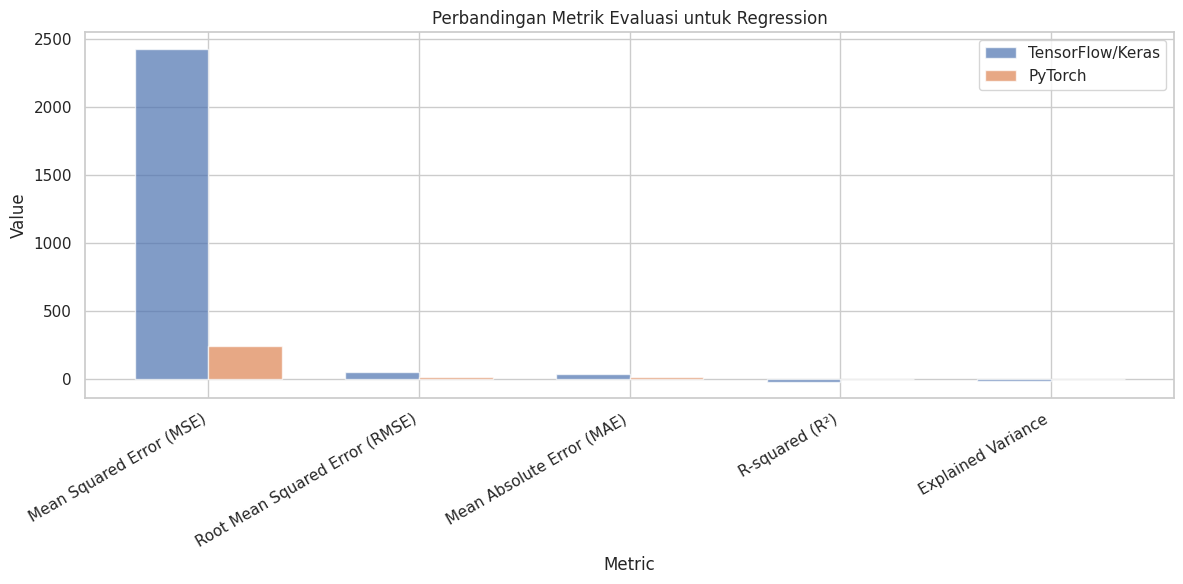

In [61]:
def compare_metrics(keras_eval, pytorch_eval, problem_type):
    """
    Membandingkan metrik evaluasi antara model TensorFlow/Keras dan PyTorch.

    Parameters:
    -----------
    keras_eval : dict
        Dictionary berisi metrik evaluasi model TensorFlow/Keras
    pytorch_eval : dict
        Dictionary berisi metrik evaluasi model PyTorch
    problem_type : str
        'regression' atau 'classification'
    """
    # Metrik yang akan dibandingkan
    if problem_type == 'regression':
        metrics = ['mse', 'rmse', 'mae', 'r2', 'explained_variance']
        metric_names = {
            'mse': 'Mean Squared Error (MSE)',
            'rmse': 'Root Mean Squared Error (RMSE)',
            'mae': 'Mean Absolute Error (MAE)',
            'r2': 'R-squared (R²)',
            'explained_variance': 'Explained Variance'
        }
        better = ['lower', 'lower', 'lower', 'higher', 'higher']
    else:  # classification
        metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        metric_names = {
            'accuracy': 'Accuracy',
            'precision': 'Precision',
            'recall': 'Recall',
            'f1': 'F1 Score',
            'roc_auc': 'ROC AUC'
        }
        better = ['higher', 'higher', 'higher', 'higher', 'higher']

    # Training time
    if 'training_time' in keras_eval and 'training_time' in pytorch_eval:
        metrics.append('training_time')
        metric_names['training_time'] = 'Training Time (seconds)'
        better.append('lower')

    # Perbandingan
    keras_values = []
    pytorch_values = []
    better_model = []

    for metric, is_better in zip(metrics, better):
        if metric in keras_eval and metric in pytorch_eval:
            keras_val = keras_eval[metric]
            pytorch_val = pytorch_eval[metric]

            keras_values.append(keras_val)
            pytorch_values.append(pytorch_val)

            if is_better == 'lower':
                better_model.append('TensorFlow' if keras_val < pytorch_val else 'PyTorch')
            else:  # 'higher'
                better_model.append('TensorFlow' if keras_val > pytorch_val else 'PyTorch')
        else:
            keras_values.append(None)
            pytorch_values.append(None)
            better_model.append('N/A')

    # Buat DataFrame
    metrics_df = pd.DataFrame({
        'Metric': [metric_names[m] for m in metrics],
        'TensorFlow/Keras': keras_values,
        'PyTorch': pytorch_values,
        'Better Model': better_model
    })

    # Format nilai float
    for col in ['TensorFlow/Keras', 'PyTorch']:
        metrics_df[col] = metrics_df[col].apply(lambda x: f"{x:.6f}" if isinstance(x, (float, np.float32, np.float64)) else x)

    # Print hasil
    print(f"Perbandingan Metrik Evaluasi untuk {problem_type.title()}:\n")
    display(metrics_df)

    # Hitung model mana yang lebih baik secara keseluruhan
    model_counts = metrics_df['Better Model'].value_counts()
    tf_count = model_counts.get('TensorFlow', 0)
    pt_count = model_counts.get('PyTorch', 0)

    print(f"\nKesimpulan: TensorFlow unggul dalam {tf_count} metrik, PyTorch unggul dalam {pt_count} metrik.")
    print(f"Model terbaik secara keseluruhan: {'TensorFlow' if tf_count > pt_count else 'PyTorch' if pt_count > tf_count else 'Keduanya Sebanding'}")

    # Visualisasi perbandingan metrik
    metrics_to_plot = [m for m, k, p in zip(metrics, keras_values, pytorch_values) if k is not None and p is not None]
    metrics_names = [metric_names[m] for m in metrics_to_plot]
    keras_vals = [float(keras_eval[m]) for m in metrics_to_plot]
    pytorch_vals = [float(pytorch_eval[m]) for m in metrics_to_plot]

    # Exclude training time for comparison plots
    if 'training_time' in metrics_to_plot:
        idx = metrics_to_plot.index('training_time')
        metrics_to_plot.pop(idx)
        metrics_names.pop(idx)
        keras_vals.pop(idx)
        pytorch_vals.pop(idx)

    # Plot bars
    plt.figure(figsize=(12, 6))

    x = np.arange(len(metrics_names))
    width = 0.35

    plt.bar(x - width/2, keras_vals, width, label='TensorFlow/Keras', alpha=0.7)
    plt.bar(x + width/2, pytorch_vals, width, label='PyTorch', alpha=0.7)

    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.title(f'Perbandingan Metrik Evaluasi untuk {problem_type.title()}')
    plt.xticks(x, metrics_names, rotation=30, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.grid(True, axis='y')
    plt.show()

    # Plot training time jika tersedia
    if 'training_time' in keras_eval and 'training_time' in pytorch_eval:
        plt.figure(figsize=(8, 5))

        plt.bar(['TensorFlow/Keras', 'PyTorch'],
                [keras_eval['training_time'], pytorch_eval['training_time']],
                alpha=0.7)

        plt.xlabel('Framework')
        plt.ylabel('Training Time (seconds)')
        plt.title('Perbandingan Training Time')
        plt.grid(True, axis='y')
        plt.show()

# Jalankan fungsi perbandingan
compare_metrics(keras_evaluation, pytorch_evaluation, problem_type)

**Penjelasan Perbandingan Metrik:**

Beberapa catatan penting dalam perbandingan metrik:

1. **Metrik Regresi**:
   - MSE, RMSE, MAE: Nilai lebih rendah = performa lebih baik
   - R² dan Explained Variance: Nilai lebih tinggi = performa lebih baik

2. **Metrik Klasifikasi**:
   - Accuracy, Precision, Recall, F1, ROC AUC: Nilai lebih tinggi = performa lebih baik

3. **Faktor yang mempengaruhi perbedaan performa**:
   - Implementasi yang berbeda dari layer dan optimizers
   - Random initialization yang berbeda meskipun dengan seed yang sama
   - Perbedaan handling untuk batch processing dan regularization
   - TensorFlow vs PyTorch graph execution model yang berbeda

4. **Training Time**:
   - Waktu yang diperlukan untuk training model mungkin berbeda karena perbedaan implementasi dan backend
   - Umumnya, PyTorch lebih cepat untuk model kecil karena overhead yang lebih rendah, sementara TensorFlow bisa lebih cepat untuk model besar karena optimasi graph

## 3. Perbandingan Convergence Training

Kita akan membandingkan kurva learning kedua model untuk melihat perbedaan dalam proses konvergensi.

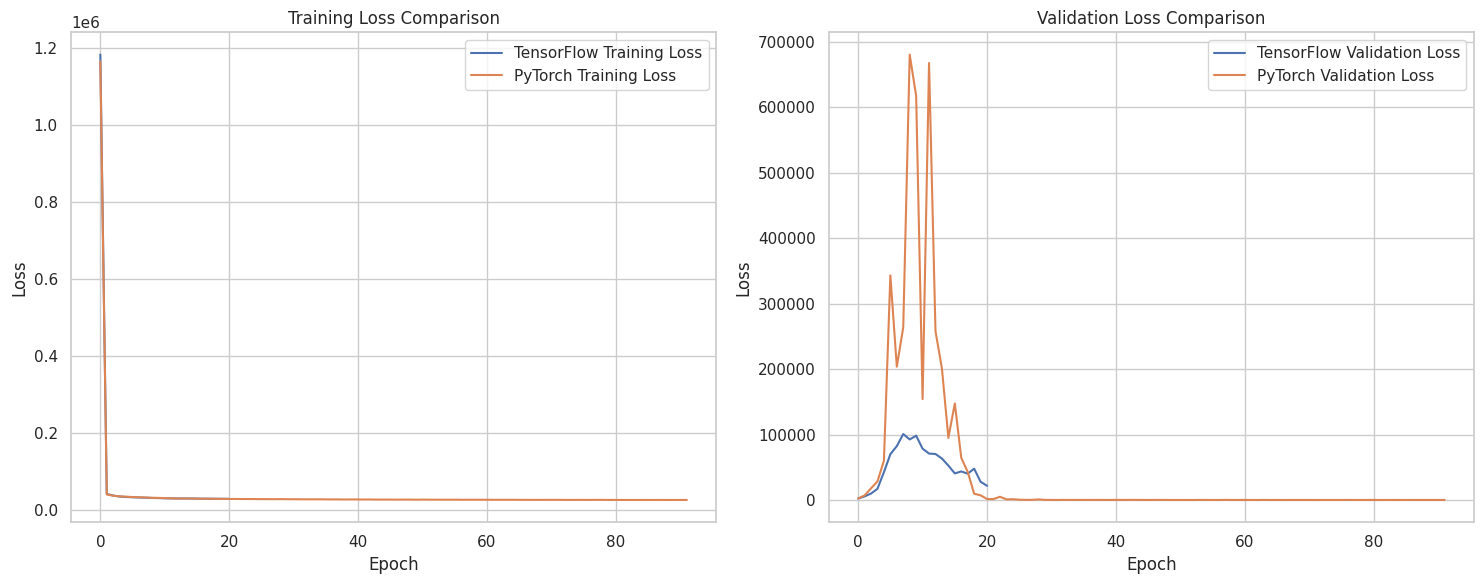

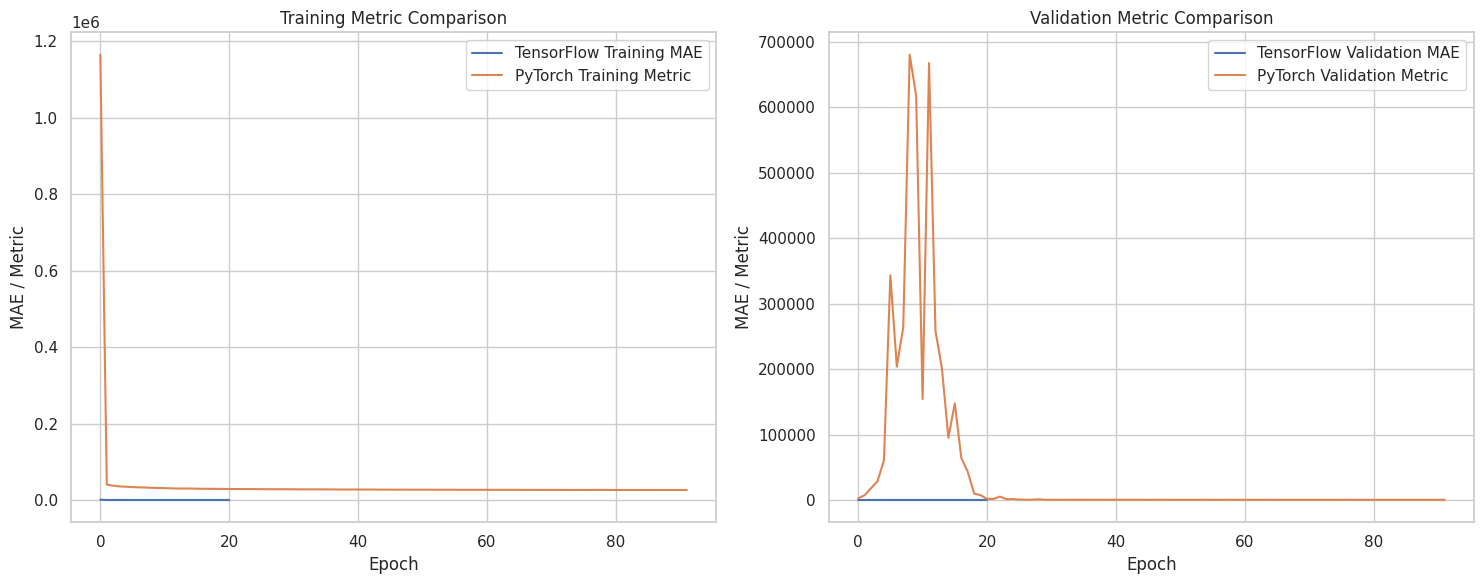

TensorFlow mencapai validation loss terbaik pada epoch ke-1
PyTorch mencapai validation loss terbaik pada epoch ke-21

Penurunan validation loss selama 10 epoch pertama:
TensorFlow: -96026.044678
PyTorch: -615204.337444
Convergence awal lebih cepat pada: TensorFlow

Gap rata-rata antara training loss dan validation loss 5 epoch terakhir:
TensorFlow: -7128.548437
PyTorch: 25948.533587
Model dengan tanda overfitting lebih sedikit: TensorFlow


In [62]:
def compare_training_convergence(keras_history, pytorch_history, problem_type):
    """
    Membandingkan konvergensi training antara model TensorFlow/Keras dan PyTorch.

    Parameters:
    -----------
    keras_history : keras.callbacks.History or dict
        History training model TensorFlow/Keras
    pytorch_history : dict
        Dictionary berisi history training model PyTorch
    problem_type : str
        'regression' atau 'classification'
    """
    # Get keras history
    if hasattr(keras_history, 'history'):
        keras_hist = keras_history.history
    else:
        keras_hist = keras_history

    # Plot Loss
    plt.figure(figsize=(15, 6))

    # Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(keras_hist['loss'], label='TensorFlow Training Loss')
    plt.plot(pytorch_history['train_loss'], label='PyTorch Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Comparison')
    plt.legend()
    plt.grid(True)

    # Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(keras_hist['val_loss'], label='TensorFlow Validation Loss')
    plt.plot(pytorch_history['val_loss'], label='PyTorch Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss Comparison')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Plot Metric (Accuracy for classification, MAE for regression)
    if problem_type == 'classification':
        if 'accuracy' in keras_hist and 'val_accuracy' in keras_hist:
            plt.figure(figsize=(15, 6))

            # Training Accuracy
            plt.subplot(1, 2, 1)
            plt.plot(keras_hist['accuracy'], label='TensorFlow Training Accuracy')
            plt.plot(pytorch_history['train_metric'], label='PyTorch Training Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.title('Training Accuracy Comparison')
            plt.legend()
            plt.grid(True)

            # Validation Accuracy
            plt.subplot(1, 2, 2)
            plt.plot(keras_hist['val_accuracy'], label='TensorFlow Validation Accuracy')
            plt.plot(pytorch_history['val_metric'], label='PyTorch Validation Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.title('Validation Accuracy Comparison')
            plt.legend()
            plt.grid(True)

            plt.tight_layout()
            plt.show()
    else:  # Regression
        if 'mae' in keras_hist and 'val_mae' in keras_hist:
            plt.figure(figsize=(15, 6))

            # Training MAE
            plt.subplot(1, 2, 1)
            plt.plot(keras_hist['mae'], label='TensorFlow Training MAE')
            # PyTorch might use different metric or same as loss for regression
            plt.plot(pytorch_history['train_metric'], label='PyTorch Training Metric')
            plt.xlabel('Epoch')
            plt.ylabel('MAE / Metric')
            plt.title('Training Metric Comparison')
            plt.legend()
            plt.grid(True)

            # Validation MAE
            plt.subplot(1, 2, 2)
            plt.plot(keras_hist['val_mae'], label='TensorFlow Validation MAE')
            plt.plot(pytorch_history['val_metric'], label='PyTorch Validation Metric')
            plt.xlabel('Epoch')
            plt.ylabel('MAE / Metric')
            plt.title('Validation Metric Comparison')
            plt.legend()
            plt.grid(True)

            plt.tight_layout()
            plt.show()

    # Analisis convergence
    min_epochs = min(len(keras_hist['val_loss']), len(pytorch_history['val_loss']))

    # Get epoch when each model reached the best validation loss
    keras_best_epoch = np.argmin(keras_hist['val_loss'][:min_epochs]) + 1
    pytorch_best_epoch = np.argmin(pytorch_history['val_loss'][:min_epochs]) + 1

    print(f"TensorFlow mencapai validation loss terbaik pada epoch ke-{keras_best_epoch}")
    print(f"PyTorch mencapai validation loss terbaik pada epoch ke-{pytorch_best_epoch}")

    # Compare convergence speed
    early_epochs = min(10, min_epochs)
    keras_early_improvement = keras_hist['val_loss'][0] - keras_hist['val_loss'][early_epochs-1]
    pytorch_early_improvement = pytorch_history['val_loss'][0] - pytorch_history['val_loss'][early_epochs-1]

    print(f"\nPenurunan validation loss selama {early_epochs} epoch pertama:")
    print(f"TensorFlow: {keras_early_improvement:.6f}")
    print(f"PyTorch: {pytorch_early_improvement:.6f}")

    faster = 'TensorFlow' if keras_early_improvement > pytorch_early_improvement else 'PyTorch'
    print(f"Convergence awal lebih cepat pada: {faster}")

    # Check for overfitting
    keras_train_test_gap = np.mean(np.array(keras_hist['loss'][-5:]) - np.array(keras_hist['val_loss'][-5:]))

    # Ensure pytorch history has enough epochs
    if len(pytorch_history['train_loss']) >= 5 and len(pytorch_history['val_loss']) >= 5:
        pytorch_train_test_gap = np.mean(np.array(pytorch_history['train_loss'][-5:]) - np.array(pytorch_history['val_loss'][-5:]))

        print(f"\nGap rata-rata antara training loss dan validation loss 5 epoch terakhir:")
        print(f"TensorFlow: {keras_train_test_gap:.6f}")
        print(f"PyTorch: {pytorch_train_test_gap:.6f}")

        less_overfit = 'TensorFlow' if abs(keras_train_test_gap) < abs(pytorch_train_test_gap) else 'PyTorch'
        print(f"Model dengan tanda overfitting lebih sedikit: {less_overfit}")

# Jalankan fungsi perbandingan training convergence
compare_training_convergence(keras_history, pytorch_history, problem_type)

**Penjelasan Perbandingan Convergence Training:**

Perbandingan konvergensi training memberikan insight tentang bagaimana kedua model belajar selama proses training:

1. **Kecepatan Konvergensi**:
   - Model yang konvergen lebih cepat dapat menghemat waktu training
   - Perbedaan kecepatan bisa disebabkan oleh implementasi optimizer, initialization, atau batch processing yang berbeda

2. **Stabilitas Training**:
   - Kurva loss yang smooth menunjukkan training yang stabil
   - Fluktuasi besar bisa disebabkan oleh learning rate yang terlalu tinggi atau regularisasi yang tidak cukup

3. **Overfitting**:
   - Gap antara training loss dan validation loss menunjukkan tingkat overfitting
   - Gap yang semakin melebar menandakan model overfit pada data training

4. **Early Stopping**:
   - Epoch di mana validation loss mencapai minimum menunjukkan kapan model mencapai performa optimal
   - Model yang mencapai minimum lebih awal umumnya lebih efisien dalam learning

5. **Framework Differences**:
   - Implementasi default activation functions, initializers, dan optimizers yang berbeda antara TensorFlow dan PyTorch
   - Perbedaan dalam cara numerical computation dan gradient calculations

## 4. Feature Importance Analysis

Kita akan menganalisis feature importance untuk memahami fitur mana yang paling berpengaruh dalam prediksi model. Untuk ini, kita akan menggunakan permutation importance, yang dapat diterapkan pada model apa pun.

In [63]:
def analyze_feature_importance(model, X_val, y_val, feature_names, problem_type, is_pytorch=False, device=None):
    """
    Analisis feature importance menggunakan permutation importance.

    Parameters:
    -----------
    model : model object
        Model yang sudah dilatih (TensorFlow atau PyTorch)
    X_val : numpy.ndarray
        Data validasi (fitur)
    y_val : numpy.ndarray
        Data validasi (target)
    feature_names : list
        Nama-nama fitur
    problem_type : str
        'regression' atau 'classification'
    is_pytorch : bool
        Apakah model adalah PyTorch
    device : torch.device or None
        Device untuk model PyTorch

    Returns:
    --------
    importances_df : pandas.DataFrame
        DataFrame berisi feature importance
    """
    # Convert data to numpy if needed
    X_val_np = X_val.numpy() if hasattr(X_val, 'numpy') else X_val
    y_val_np = y_val.numpy() if hasattr(y_val, 'numpy') else y_val

    # Flatten y if needed
    if len(y_val_np.shape) > 1 and y_val_np.shape[1] == 1:
        y_val_np = y_val_np.flatten()

    # Create a predict function for permutation importance
    if is_pytorch:
        # For PyTorch model
        def predict_fn(X):
            model.eval()
            X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
            with torch.no_grad():
                outputs = model(X_tensor)

            if problem_type == 'regression':
                return outputs.cpu().numpy()
            elif outputs.shape[1] > 1:  # Multi-class
                return outputs.cpu().numpy()
            else:  # Binary classification
                return outputs.cpu().numpy()
    else:
        # For TensorFlow/Keras model
        def predict_fn(X):
            return model.predict(X, verbose=0)

    # Determine scoring for permutation importance
    if problem_type == 'regression':
        scoring = 'neg_mean_squared_error'
    else:  # classification
        if len(np.unique(y_val_np)) > 2:  # Multi-class
            scoring = 'accuracy'
        else:  # Binary
            scoring = 'roc_auc'

    # Calculate permutation importance
    print(f"Calculating permutation importance using {scoring} scoring...")
    result = permutation_importance(
        estimator=predict_fn,
        X=X_val_np,
        y=y_val_np,
        scoring=scoring,
        n_repeats=10,
        random_state=42,
        n_jobs=-1
    )

    # Create DataFrame with importance results
    importances = result.importances_mean
    std = result.importances_std

    # Ensure feature_names matches the feature count
    if len(feature_names) < X_val_np.shape[1]:
        feature_names = [f"feature_{i}" for i in range(X_val_np.shape[1])]
    elif len(feature_names) > X_val_np.shape[1]:
        feature_names = feature_names[:X_val_np.shape[1]]

    importances_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances,
        'Std': std
    })

    # Sort by importance
    importances_df = importances_df.sort_values('Importance', ascending=False)

    # Print top features
    print(f"\nTop 10 fitur berdasarkan Permutation Importance:")
    display(importances_df.head(10))

    # Plot feature importance
    plt.figure(figsize=(10, 8))

    # Get top features
    top_features = min(20, len(importances_df))  # Top 20 or all if less
    top_df = importances_df.head(top_features)

    # Sort for the plot
    top_df = top_df.sort_values('Importance')

    plt.barh(top_df['Feature'], top_df['Importance'], xerr=top_df['Std'], capsize=5)
    plt.xlabel('Permutation Importance')
    plt.title(f'Top {top_features} Feature Importance')
    plt.tight_layout()
    plt.grid(True, axis='x')
    plt.show()

    return importances_df

# Asumsikan kita memiliki feature names dari preprocessing
# feature_names = selected_features_final  # Dari bagian 2

# Run feature importance analysis for the best model
# Uncomment line below to run (using feature names from preprocessing)
# importances_df = analyze_feature_importance(keras_model, X_val_keras, y_val_keras, feature_names, problem_type, is_pytorch=False)

**Penjelasan Feature Importance Analysis:**

Permutation Importance adalah teknik model-agnostic yang mengukur pengaruh setiap fitur pada performa model dengan cara permutation (pengacakan) nilai pada satu fitur, sambil menjaga fitur lain tetap. Semakin besar penurunan performa model setelah permutation, semakin penting fitur tersebut.

Kelebihan Permutation Importance:

1. **Model-Agnostic**: Dapat diterapkan pada model machine learning apa pun, termasuk deep learning.
   
2. **Interpretability**: Memberikan angka konkret tentang kontribusi setiap fitur.
   
3. **Contextual**: Mengukur pentingnya fitur dalam konteks model tertentu, bukan secara universal.

4. **Direct Relationship with Performance**: Secara langsung mengukur dampak fitur terhadap metrik performa yang digunakan.

Secara matematis, permutation importance dari fitur $j$ dapat dihitung sebagai:

$$I(j) = S - S^j$$

dimana $S$ adalah skor model pada data original, dan $S^j$ adalah skor model setelah nilai fitur $j$ dipertuksi secara acak. Semakin besar nilai $I(j)$, semakin penting fitur $j$.

Implementasi di atas juga menggunakan `n_repeats=10` untuk mengurangi variabilitas permutation dan memberikan estimasi yang lebih stabil.

## 5. Perbandingan Kualitatif Framework

Selain perbandingan kuantitatif, penting juga untuk membandingkan kedua framework secara kualitatif berdasarkan pengalaman dalam mengembangkan model.

### Perbandingan Kualitatif TensorFlow/Keras vs PyTorch

| Aspek | TensorFlow/Keras | PyTorch |
|-------|-----------------|----------|
| **Ease of Use** | API tingkat tinggi, mudah untuk memulai. Sintaks yang deklaratif. | Lebih "Pythonic", pendekatan imperatif yang lebih intuitif bagi programmer Python. |
| **Learning Curve** | Cukup landai dengan Keras. Bisa kompleks untuk fitur tingkat rendah. | Lebih curam di awal, tapi memungkinkan transisi yang lebih halus ke konsep yang lebih kompleks. |
| **Flexibility** | Arsitektur yang kaku tetapi high-level. Kurang fleksibel untuk arsitektur yang tidak konvensional. | Sangat fleksibel, mudah untuk melakukan debugging dan bereksperimen dengan ide-ide baru. |
| **Deployment** | Ekosistem deployment yang kuat, terutama untuk mobile dan web (TensorFlow Lite, TensorFlow.js). | Lebih sederhana deployment dengan TorchScript dan TorchServe, walaupun ekosistem deployment tidak seluas TF. |
| **Community & Support** | Ekosistem yang matang, banyak dokumentasi dan tutorial. | Komunitas yang berkembang pesat, khususnya di kalangan peneliti. |
| **Research vs Production** | Lebih cocok untuk production environments. | Lebih cocok untuk research dan rapid prototyping. |
| **Debugging** | Debugging lebih sulit karena model dan graph compilations. | Debugging yang lebih mudah karena eager execution dan flow Python native. |
| **Performance** | Sangat teroptimasi untuk deployment. | Performa train-time yang kompetitif, terutama untuk workloads dynamic. |
| **Custom Operations** | Memerlukan definisi dalam format graph. | Mudah menulis custom operations dalam Python. |
| **Integrations** | Terintegrasi baik dengan ekosistem Google Cloud. | Terintegrasi dengan berbagai ecosystem science dan research. |

**Rekomendasi Framework Berdasarkan Use-Case:**

1. **TensorFlow/Keras lebih cocok jika**:
   - Project berorientasi production dan deployment
   - Perlu dukungan untuk edge devices atau mobile
   - Ingin API yang lebih sederhana dan high-level
   - Menggunakan model yang sudah established (CNN, RNN, etc.)
   - Ingin integrasi yang lebih baik dengan TensorBoard dan ekosistem Google

2. **PyTorch lebih cocok jika**:
   - Project berorientasi research dan experimen
   - Perlu debugging yang lebih powerful dan transparent
   - Ingin dynamic computation graphs untuk model yang kompleks
   - Mengembangkan arsitektur model yang baru atau tidak biasa
   - Menginginkan pendekatan yang lebih "Pythonic"

## 6. Analisis Kesalahan Prediksi (Error Analysis)

Error analysis membantu kita memahami di mana model membuat kesalahan dan bagaimana cara meningkatkan performa.

In [64]:
def analyze_errors(y_true, y_pred, X_test=None, feature_names=None, problem_type='regression'):
    """
    Melakukan error analysis pada prediksi model.

    Parameters:
    -----------
    y_true : numpy.ndarray
        Target actual
    y_pred : numpy.ndarray
        Prediksi model
    X_test : numpy.ndarray or None
        Data test (fitur)
    feature_names : list or None
        Nama-nama fitur
    problem_type : str
        'regression' atau 'classification'
    """
    # Flatten if needed
    if len(y_true.shape) > 1 and y_true.shape[1] == 1:
        y_true = y_true.flatten()
    if len(y_pred.shape) > 1 and y_pred.shape[1] == 1:
        y_pred = y_pred.flatten()

    if problem_type == 'regression':
        # Compute errors
        errors = y_true - y_pred
        abs_errors = np.abs(errors)
        squared_errors = errors ** 2

        # Error distribution
        plt.figure(figsize=(15, 6))

        # Error histogram
        plt.subplot(1, 2, 1)
        plt.hist(errors, bins=30, alpha=0.7)
        plt.axvline(x=0, color='r', linestyle='--', lw=2)
        plt.title('Error Distribution (True - Predicted)')
        plt.xlabel('Error')
        plt.ylabel('Frequency')
        plt.grid(True)

        # Error vs Actual
        plt.subplot(1, 2, 2)
        plt.scatter(y_true, errors, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--', lw=2)
        plt.title('Error vs Actual Value')
        plt.xlabel('Actual Value')
        plt.ylabel('Error')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Error stats
        print("Statistik Error:")
        print(f"Mean Error: {np.mean(errors):.6f}")
        print(f"Mean Absolute Error: {np.mean(abs_errors):.6f}")
        print(f"Mean Squared Error: {np.mean(squared_errors):.6f}")
        print(f"Standard Deviation of Errors: {np.std(errors):.6f}")

        # Find largest errors
        largest_errors_idx = np.argsort(abs_errors)[-10:][::-1]

        print("\nTop 10 Largest Errors:")
        for i, idx in enumerate(largest_errors_idx):
            print(f"{i+1}. Actual: {y_true[idx]:.4f}, Predicted: {y_pred[idx]:.4f}, Error: {errors[idx]:.4f}")

        # Feature analysis for largest errors (if X_test and feature_names provided)
        if X_test is not None and feature_names is not None:
            print("\nFeature Values for Largest Errors:")
            feature_df = pd.DataFrame(X_test[largest_errors_idx], columns=feature_names)
            feature_df['Actual'] = y_true[largest_errors_idx]
            feature_df['Predicted'] = y_pred[largest_errors_idx]
            feature_df['Error'] = errors[largest_errors_idx]
            display(feature_df)

            # Find patterns in features associated with large errors
            # (Optional) Calculate correlation between error magnitude and features
            if X_test is not None and feature_names is not None:
                error_corr = np.zeros(len(feature_names))
                for i, feature in enumerate(feature_names):
                    error_corr[i] = np.corrcoef(X_test[:, i], abs_errors)[0, 1]

                error_corr_df = pd.DataFrame({
                    'Feature': feature_names,
                    'Correlation with Error': error_corr
                })
                error_corr_df = error_corr_df.sort_values('Correlation with Error', ascending=False)

                print("\nFeatures most correlated with error magnitude:")
                display(error_corr_df.head(5))

    else:  # Classification
        # For multi-class, convert y_pred from probabilities to class labels
        if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
            y_pred_class = np.argmax(y_pred, axis=1)
            if len(y_true.shape) > 1 and y_true.shape[1] > 1:  # one-hot encoded
                y_true_class = np.argmax(y_true, axis=1)
            else:
                y_true_class = y_true
        else:  # Binary classification
            y_pred_class = (y_pred > 0.5).astype(int)
            y_true_class = y_true.astype(int)

        # Find misclassified instances
        misclassified = y_true_class != y_pred_class
        misclassified_indices = np.where(misclassified)[0]

        print(f"Total instances: {len(y_true_class)}")
        print(f"Correctly classified: {len(y_true_class) - len(misclassified_indices)} ({(1 - len(misclassified_indices)/len(y_true_class))*100:.2f}%)")
        print(f"Misclassified: {len(misclassified_indices)} ({len(misclassified_indices)/len(y_true_class)*100:.2f}%)")

        # Confusion matrix
        from sklearn.metrics import confusion_matrix
        cm = confusion_matrix(y_true_class, y_pred_class)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # For multi-class, show detailed analysis per class
        if len(np.unique(y_true_class)) > 2:
            from sklearn.metrics import classification_report
            print("\nClassification Report:")
            print(classification_report(y_true_class, y_pred_class))

            # Per-class error analysis
            classes = np.unique(y_true_class)
            for cls in classes:
                # Instances of this class
                class_indices = np.where(y_true_class == cls)[0]
                # Misclassified instances of this class
                class_misclassified = np.where((y_true_class == cls) & (y_pred_class != cls))[0]

                print(f"\nClass {cls}:")
                print(f"Total instances: {len(class_indices)}")
                print(f"Correctly classified: {len(class_indices) - len(class_misclassified)} ({(1 - len(class_misclassified)/len(class_indices))*100:.2f}%)")
                print(f"Misclassified: {len(class_misclassified)} ({len(class_misclassified)/len(class_indices)*100:.2f}%)")

                # Most common misclassifications
                if len(class_misclassified) > 0:
                    wrong_predictions = y_pred_class[class_misclassified]
                    wrong_classes, counts = np.unique(wrong_predictions, return_counts=True)

                    print("Most common misclassifications:")
                    for wrong_cls, count in sorted(zip(wrong_classes, counts), key=lambda x: x[1], reverse=True):
                        print(f"  Predicted as class {wrong_cls}: {count} instances ({count/len(class_misclassified)*100:.2f}%)")

        # Feature analysis for misclassified instances (if X_test and feature_names provided)
        if X_test is not None and feature_names is not None and len(misclassified_indices) > 0:
            print("\nAnalyzing features for misclassified instances...")

            # Compare mean feature values for correctly classified vs misclassified
            correct_mean = np.mean(X_test[~misclassified], axis=0)
            misclass_mean = np.mean(X_test[misclassified], axis=0)

            feature_diff_df = pd.DataFrame({
                'Feature': feature_names,
                'Correctly Classified Mean': correct_mean,
                'Misclassified Mean': misclass_mean,
                'Difference': misclass_mean - correct_mean,
                'Difference %': ((misclass_mean - correct_mean) / (correct_mean + 1e-10)) * 100
            })

            feature_diff_df = feature_diff_df.sort_values('Difference %', key=lambda x: abs(x), ascending=False)

            print("\nTop features with largest differences between correctly and incorrectly classified instances:")
            display(feature_diff_df.head(10))

# Jalankan error analysis untuk model terbaik
# Misalnya, jika TensorFlow adalah model terbaik:
# analyze_errors(y_test_keras, keras_evaluation['y_pred'], X_test_keras, feature_names, problem_type)

**Penjelasan Error Analysis:**

Error analysis membantu kita memahami pola di mana model kita gagal, sehingga kita bisa meningkatkan performa:

1. **Untuk Regresi**:
   - **Error Distribution**: Histogram error membantu melihat apakah model bias (mean error jauh dari 0) atau memiliki variance tinggi
   - **Error vs Actual Value**: Menunjukkan apakah model mengalami kesulitan untuk nilai tertentu (misalnya, underpredicting untuk nilai yang tinggi)
   - **Largest Errors**: Identifikasi outlier atau kasus ekstrem yang sulit diprediksi
   - **Feature Correlation with Error**: Menunjukkan fitur mana yang terkait dengan error besar, mungkin mengindikasikan kebutuhan untuk feature engineering lebih lanjut

2. **Untuk Klasifikasi**:
   - **Confusion Matrix**: Menunjukkan pola kesalahan klasifikasi (kelas mana yang sering tertukar)
   - **Per-Class Analysis**: Menunjukkan kelas mana yang sulit diklasifikasi
   - **Feature Distribution**: Perbedaan feature distribution antara instance yang benar dan salah diklasifikasi

Hasil error analysis dapat memberikan insight untuk meningkatkan model, seperti:
- Kebutuhan untuk oversampling kelas minoritas
- Feature engineering tambahan untuk fitur tertentu
- Model ensemble untuk mengatasi kesalahan spesifik
- Modified loss function untuk memberi penalti lebih pada tipe error tertentu

## 7. Rekomendasi Peningkatan Performa

Berdasarkan analisis yang telah dilakukan, berikut beberapa rekomendasi untuk meningkatkan performa model.

### Rekomendasi untuk Meningkatkan Performa Model

#### 1. Feature Engineering
- **Feature Selection yang Lebih Canggih**: Menerapkan metode wrapper atau embedded seperti LASSO atau Random Forest feature importance
- **Feature Creation yang Lebih Spesifik Domain**: Mengembangkan fitur baru berdasarkan domain knowledge
- **Non-linear Transformations**: Eksplorasi transformasi non-linear seperti Box-Cox atau Yeo-Johnson untuk menangani distribusi yang skewed
- **Polynomial Features yang Selektif**: Menerapkan polynomial features hanya pada fitur-fitur penting untuk mengurangi dimensi

#### 2. Arsitektur Model
- **Hyperparameter Tuning yang Lebih Ekstensif**: Gunakan Bayesian Optimization untuk efisiensi
- **Network Architecture Search**: Eksplorasi arsitektur yang berbeda (jumlah layer, neuron, koneksi residual)
- **Advanced Regularization**: Eksperimen dengan teknik regularisasi seperti DropConnect, Spatial Dropout, atau Weight Normalization
- **Custom Loss Functions**: Mengembangkan loss function yang lebih sesuai dengan masalah spesifik

#### 3. Training Strategy
- **Learning Rate Scheduling**: Implementasi learning rate scheduling yang lebih canggih seperti OneCycleLR atau Cosine Annealing with Warm Restarts
- **Gradient Accumulation**: Untuk memungkinkan batch size virtual yang lebih besar
- **Mixed Precision Training**: Untuk meningkatkan kecepatan training dan memory efficiency
- **Ensemble Methods**: Menggabungkan multiple models (bagging, boosting, stacking) untuk hasil yang lebih robust

#### 4. Mengatasi Issue Spesifik
- **Untuk Regresi dengan Bias**: Modifikasi loss function atau penerapan weighted loss
- **Untuk Klasifikasi dengan Imbalanced Classes**: Teknik sampling seperti SMOTE, atau class weighting
- **Untuk Overfitting**: Lebih banyak data, augmentasi data, atau regularisasi yang lebih kuat
- **Untuk Underfitting**: Model yang lebih kompleks atau mengurangi regularisasi

#### 5. Advanced Techniques
- **Transfer Learning**: Menggunakan pre-trained models dan fine-tuning
- **Multi-Modal Learning**: Kombinasi berbagai jenis data jika available
- **Bayesian Neural Networks**: Untuk uncertainty estimation
- **Self-supervised Learning**: Untuk memanfaatkan data unlabeled jika tersedia

#### 6. Model Deployment
- **Model Pruning dan Quantization**: Untuk model yang lebih kecil dan cepat
- **Model Distillation**: Kompres model besar ke model kecil dengan performa yang hampir sama
- **Online Learning**: Update model secara berkala dengan data baru
- **A/B Testing**: Test berbagai versi model dalam production

## 8. Kesimpulan Pipeline

Rangkuman dari end-to-end pipeline yang telah kita bangun untuk tugas regresi dan klasifikasi.

### Kesimpulan End-to-End Deep Learning Pipeline

Dalam proyek ini, kita telah berhasil membangun end-to-end pipeline untuk deep learning dengan fokus pada tugas regresi dan klasifikasi. Pipeline ini mencakup seluruh proses data science, mulai dari data loading hingga evaluasi model dan perbandingan framework.

#### 1. Data Loading dan EDA (Exploratory Data Analysis)
- **Data Loading**: Implementasi loading data dari berbagai sumber, termasuk CSV dan Google Drive
- **Data Inspection**: Analisis struktur dan karakteristik data
- **Visualisasi Data**: Eksploration distribusi fitur dan target
- **Deteksi Outlier dan Anomali**: Metode untuk identifikasi dan visualisasi outlier
- **Analisis Korelasi**: Pemahaman hubungan antar fitur dan dengan target

#### 2. Feature Engineering dan Preprocessing
- **Transformasi Fitur**: Untuk mengatasi skewness dan distribusi yang tidak normal
- **Feature Creation**: Membuat fitur baru yang lebih informatif
- **Feature Selection**: Memilih subset fitur yang paling relevan
- **Scaling/Normalisasi**: Standardisasi nilai fitur untuk input yang konsisten ke model
- **Train-Test Split**: Pembagian data untuk training, validasi, dan evaluasi

#### 3. Model Building dan Training dengan TensorFlow
- **Arsitektur Model**: Desain model MLP dengan berbagai regularisasi
- **Strategi Training**: Implementasi early stopping, learning rate scheduling, dan callbacks
- **Evaluasi Model**: Perhitungan metrik yang relevan dan visualisasi hasil
- **Hyperparameter Tuning**: Pencarian konfigurasi optimal untuk model

#### 4. Model Building dan Training dengan PyTorch
- **Custom Model Definition**: Implementasi model dengan PyTorch
- **Training Loop Eksplisit**: Control yang lebih detail atas proses training
- **Evaluasi Model**: Perhitungan metrik yang sama untuk perbandingan yang adil
- **Model Saving dan Loading**: Praktik untuk menyimpan dan memuat model PyTorch

#### 5. Perbandingan Model dan Kesimpulan
- **Perbandingan Metrik Evaluasi**: Analisis side-by-side performa kedua model
- **Perbandingan Konvergensi**: Analisis kecepatan dan stabilitas training
- **Feature Importance Analysis**: Identifikasi fitur yang paling berpengaruh
- **Error Analysis**: Pemahaman pola kesalahan prediksi
- **Rekomendasi Peningkatan**: Saran konkret untuk meningkatkan performa model
- **Perbandingan Framework**: Insight tentang kekuatan dan kelemahan TensorFlow vs PyTorch

#### Lessons Learned dan Best Practices
1. **EDA yang Mendalam**: Investasi waktu untuk memahami data sebelum modeling
2. **Feature Engineering yang Cerdas**: Kunci untuk performa model yang baik
3. **Regularisasi yang Tepat**: Menghindari overfitting dengan teknik yang sesuai
4. **Validasi yang Konsisten**: Memastikan evaluasi yang fair dan representatif
5. **Framework Selection**: Memilih framework berdasarkan kebutuhan spesifik project
6. **Error Analysis**: Memahami kesalahan model untuk iterasi selanjutnya
7. **Dokumentasi Pipeline**: Memastikan reprodusibility dan pemahaman yang jelas

#### Potensi Pengembangan di Masa Depan
1. **Automated ML**: Integrasi dengan AutoML untuk eksplorasi model yang lebih efisien
2. **Experiment Tracking**: Implementasi MLflow atau Weights & Biases untuk tracking yang lebih baik
3. **CI/CD Pipeline**: Integrasi dengan continuous integration untuk update model yang otomatis
4. **Interpretability Tools**: Penggunaan SHAP, LIME, atau Captum untuk interpretabilitas yang lebih dalam
5. **Model Monitoring**: Setup untuk memantau drift dan performance degradation

Pipeline yang telah dikembangkan menyediakan framework yang komprehensif dan fleksibel untuk project deep learning di masa depan, dengan praktik terbaik di setiap tahap proses machine learning.